#  Capstone Project - Customer Churn Prediction

#  Charles Kilpatrick

### Context

A DTH (Direct to Home) service provider is experiencing significant competition for accounts (account churn) and it has become a challenge to retain existing accounts.  One account may have multiple customers, so the company may lose multiple customers when one account churns.

This project is initiated to predict the accounts likely to churn based on the usage and other demographic factors and provide recommendations to the company to minimize the churn.

The data for this study was collected from three tiers of cities and data on both active accounts and accounts which were abandoned (churned) was included.


### Objective

This study is being performed to develop a classification model for predicting which customers are going to churn service based on the usage of the service provider and other account demographic factors, and also provide recommendations to the DTH service provider to implement to minimize account churn.

### Business/Social Opportunity

Customers are a fundamental part of a DTH's sustaining business and growth, given that customer satisfaction plays as an important role in ensuring account service subscriptions continue. An effective churn prediction model will enable the company to identify the accounts most likely to churn.

Utilization of this model will enable to DTH to target accounts most likely to churn with incentive offers specifically tailored for them.  The model is also intended to improve overall customer satisfaction by addressing points of friction for the customer base.

After this model is proven and tested effectively, the Direct-To-Home service provider company may license this proprietary model to other companies facing the same challenge. This will further boost the company's revenue.

### Data Report

#### Data Collection

- This study uses the basis that customer consent for data useage was obtained and data security will be maintained.

- Data was collected using account IDs to know if they were still operating or if they had been closed or abandoned (churn).

- The campaign survey was taken at different categories of cities in different locations ranked by city tiers.

- Over the course of 12 months, the number of times customers tied to an account contacted customer care was recorded.

- Details linked to each account ID were collected such as number of users associated with each account, gender and marital status of the primary customer, account segment on the basis of spend, average monthly revenue over last 12 months, prefered login device of customer etc.

#### Visual Inspection of Data

- The data has 11260 rows and 19 columns.

- Each Account ID is unique without repetition.

- There are many null values and there are also many special character such as @, +, #,  &&&&, regular + instead of regular plus, F instead of Female and M instead of Male.  The data concerns will need to be corrected. These data concerns will be addressed as appropriate.  Many special characters will be replaced with NaN and missing value imputation will be performed.

### **Data Dictionary**

- AccountID - Account unique identifier.

- Churn - Account churn flag. (Target), 1 - Churn, 0 - No Churn.

- Tenure - Tenure of account in months.

- City_Tier - Tier of primary customer's city.

- CC_Contacted_LY - How many times all the customers of the account has contacted customer care in last 12 months.

- Payment - Preferred Payment mode of the customers in the account.

- Gender - Gender of the primary customer of the account.

- Service_Score - Satisfaction score given by customers of the account on service provided by company.

- Account_user_count - Number of customers tagged with this account.

- account_segment - Account segmentation on the basis of spend.

- CC_Agent_Score - Satisfaction score given by customers of the account on customer care service provided by company.

- Marital_Status - Marital status of the primary customer of the account.

- rev_per_month - Monthly average revenue generated by account in last 12 months (encoded ordinal value).

- Complain_ly - Wheher complaints have been raised by account in last 12 months.

- rev_growth_yoy - Revenue growth percentage of the account (last 12 months vs last 24 to 13 month).

- coupon_used_for_payment - How many times customers have used coupons to do the payment in last 12 months.

- Day_Since_CC_connect - Number of days since no customers in the account has contacted the customer care.

- cashback - Monthly average cashback generated by account in last 12 months (value in points monetary value not disclosed).

- Login_device - Preferred login device of the customers in the account.

### Importing Required Libraries

In [1]:
# Library to supress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import zscore
from sklearn.cluster import KMeans
import tensorflow as tf

# Library to split data
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold, cross_validate
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.ensemble import StackingClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import ( confusion_matrix,
                             classification_report,
                              accuracy_score, precision_score,
                              recall_score,
                              f1_score, roc_curve,
                              auc,
                              precision_recall_curve,
                              average_precision_score,
                              log_loss,
                              roc_auc_score
)


from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
import scipy.stats as stats

#Install xgboost for later classification work
#!pip install xgboost==1.0.1

#Import classifier
from xgboost import XGBClassifier

### Use GPU if available

In [2]:
import tensorflow as tf

# Get the list of available physical devices
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    # If a GPU is available, use it
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    device = "/GPU:0"
    print("Using GPU")
else:
    # If no GPU is available, use CPU
    device = "/CPU:0"
    print("Using CPU")

# Create a TensorFlow device context manager
# with tf.device(device):

Using GPU


In [3]:
#Select randomness
SEED = 12345

In [4]:
#Implement randomness
np.random.seed(SEED)

### Read  Data and View Observations

In [5]:
# Read data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read data
data = pd.read_excel('drive/My Drive/Customer Churn Data.xlsx')

In [7]:
#Read the customer churn data file
# churn = pd.read_excel('Customer Churn Data.xlsx')   #  , sheet_name = 'Data')

In [8]:
#Save a data copy
churn = data.copy()

In [9]:
#Display full dataframe information (Non-turncated Text column.)
pd.set_option('display.max_colwidth', None)

In [10]:
#Print first 5 rows
churn.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

#### First  5 rows are a mixture of numeric and categorical with missing cashback values.

In [11]:
#Print a random sample
churn.sample(5)

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY     Payment  \
5543       25543      0     10        1.0             16.0  Debit Card   
2          20002      1      0        1.0             30.0  Debit Card   
10832      30832      0     18        1.0             19.0  Debit Card   
4171       24171      0      3        1.0             22.0  Debit Card   
6040       26040      0     14        2.0             18.0         UPI   

       Gender  Service_Score Account_user_count account_segment  \
5543     Male            4.0                  2    Regular Plus   
2        Male            2.0                  4    Regular Plus   
10832    Male            3.0                  5    Regular Plus   
4171   Female            3.0                  5           Super   
6040     Male            3.0                  4         Regular   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
5543              4.0        Married             3          0.0   
2                 3.0         Single             6          1.0   
10832             3.0         Single             9          0.0   
4171              3.0         Single             2          1.0   
6040              2.0        Married             8          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
5543              23                       2                    3    153.1   
2                 14                       0                    3      NaN   
10832             15                       1                    4   158.62   
4171              13                       2                    9   166.93   
6040              16                      12                    6   293.41   

      Login_device  
5543      Computer  
2           Mobile  
10832     Computer  
4171        Mobile  
6040        Mobile

####  Randomly sampled rows are a mixture of numeric and categorical with missing cashback values.

In [12]:
#Print last 5 rows
churn.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

#### Last 5 rows are a mixture of numeric and categorical with missing cashback values.

In [13]:
#Investigate dataframe shape
print(f"There are {churn.shape[0]} rows and {churn.shape[1]} columns.")

There are 11260 rows and 19 columns.


In [14]:
#Check for datatype
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

#### Observations

There are 11,260 observations for 19 columns.

- Missing values are expected for 15 columns, which are all columns except AccountID, Churn, rev_growth_yoy, and
  coupon_used_for payment

- Numeric variables set as objects are:
- Tenure, Account_user_count, rev_per_month, rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect and cashback.
- These  will be set to numerics at a later stage.
  
- There are two integer variables. These are the target, Churn, and AccountID.  AccountID will be deleted.
- There are five floating point variables.
- There are twelve variables of object type.
- A significant fraction of the variables must be recast to different types for data analysis purposes.

In [15]:
# Create list of variables for value counts
val_cnt = ["Tenure", "City_Tier", "Payment", "Gender", "Account_user_count", "account_segment", "Marital_Status", "rev_per_month", "rev_growth_yoy", "coupon_used_for_payment", "Day_Since_CC_connect", "cashback", "Login_device"]


In [16]:
#Print value counts
for i in val_cnt:
    print("Unique values in", i, "are :")
    print(churn[i].value_counts())
    print("*" * 50)


Unique values in Tenure are :
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64
**************************************************
Unique values in City_Tier are :
1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64
**************************************************
Unique values in Payment are :
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64
**************************************************
Unique values in Gender are :
Male      6328
Female    4178
M          376
F          270

#### Observations On Object Class Variables

- Tenure has 38 unique values. The "#" value will need to be converted to a NaN so this value can be imputed.
- City_Tier has three unique values with the majority class being 1.0.  This data is imbalanced.
- Payment has 5 unique values with Debit Card and Credit Card the most frequent classes.
- Gender has 4 unique values with Male being the majority class.  M and F will be replaced with Male and Female respectively.
- Account_user_count has 7 unique values and it will be necessary to replace @ with NaN for imputation.
- Account_segment has seven unique values and Regular + and Super + will need to be recast to Regular Plus and Super Plus.
- Marital Status has 3 unique values with Married being the majority class.
- There are 59 unique values for rev-per_month and the + value will be replaced with NaN for imputation.
- There are 20 unique values for rev_growth_yoy and the $ value will be replaced with NaN for imputation.
- There are 20 unique values for coupon_used_for_payment and the #, $, and * values will be replaced wih NaN for imputation.
- Day_Since_CC_connect has 24 unique values and the $ value will be replaced with NaN for imputation.
- There are 5693 unique numerical values for cashback and approximately 471 null values which will be imputed.
- Login_device has 3 unique values with Mobile the majority class. The &&&& value is undefined and will be imputed.

In [17]:
# Create list of integer and float variables for value counts
val_cnt = ['AccountID', 'Churn', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly']

In [18]:
#Print value counts for added integer and float variables
for i in val_cnt:
    print("Unique values in", i, "are :")
    print(churn[i].value_counts())
    print("*" * 50)


Unique values in AccountID are :
20000    1
27510    1
27502    1
27503    1
27504    1
        ..
23754    1
23755    1
23756    1
23757    1
31259    1
Name: AccountID, Length: 11260, dtype: int64
**************************************************
Unique values in Churn are :
0    9364
1    1896
Name: Churn, dtype: int64
**************************************************
Unique values in CC_Contacted_LY are :
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0     178
34.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
127.0      1
126.0      1
132.0      1
4.0        1
129.0      1
Name: CC_Cont

#### Observations On Integer and Float Variables

- The AccountID values are simply a series of 11260 numbers beginning at 20000.
- The churn variable has 9364 or 83.16% of 11260 observation did not churn (value 0) and 1896 or 16.84% that churned (value 1).
- The CC_Contacted_LY has a total of 44 unique values ranging from 4.0 up to 132.0 with 14.0 being the modal value.
- The Service_Score has a total of 6 unique values ranging from 0.0 to 5.0 with 3.0 being the modal value.
- The CC_Agent_Score has 5 unique values ranging from 1.0 to 5.0.  The modal value is 3.0.
- The Complain_ly variable has 7792 or 71.47% of non-nulls with a value of 0 and 3111 or 28.53% with value 1.


####  Special Character Treatment For Numerical Variables
* Replace special characters in numerical variables with NaN.
* Replacement is performed now so all numeric variables can be cast as numerics for univariate and bivariate analysis plots.
* Special characters present in categorical values will be treated after EDA is complete.

#### Observations

The following variables were originally classified as objects due to special character presence.  Later in the analysis they will be cast as float.

- Tenure

- Account_user_count

- Rev_per_month

- Rev_growth_yoy

- Coupon_used_for_payment

- Day_Since_CC_connect

- Cashback

Convert special characters to NaN and impute values later.  These variables will then be cast to float.

In [19]:
#Replace special characters in the variables to be cast as numeric with NaN

for feature in churn.columns:
    churn[feature] = churn[feature].replace('+',np.NaN).replace('#',np.NaN).replace('@',np.NaN).replace('$',np.NaN).replace('*',np.NaN)

In [20]:
#Cast numerical variables to be float type for EDA purposes

cols_to_float = ["Tenure", "Account_user_count", "rev_growth_yoy", "rev_per_month", "coupon_used_for_payment", "Day_Since_CC_connect", "cashback"]

for colname in cols_to_float:

    churn[colname] = churn[colname].astype(float)


### Check for Duplicates

In [21]:
#Print sum of dataframe duplicated values
churn.duplicated().sum()

0

- There are no duplicate values in the dataset

In [22]:
#Check for null values
churn.isnull().sum().sort_values(ascending=False)

rev_per_month              791
cashback                   473
Account_user_count         444
Day_Since_CC_connect       358
Complain_ly                357
Login_device               221
Tenure                     218
Marital_Status             212
CC_Agent_Score             116
City_Tier                  112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Service_Score               98
account_segment             97
coupon_used_for_payment      3
rev_growth_yoy               3
Churn                        0
AccountID                    0
dtype: int64

##### Observations

- The only variables which do not have any null values are Churn and AccountID
- Null values will be imputed at a later stage of the program.

In [23]:
# Print data summary for float and integer variables
churn.describe().T

count          mean          std      min  \
AccountID                11260.0  25629.500000  3250.626350  20000.0   
Churn                    11260.0      0.168384     0.374223      0.0   
Tenure                   11042.0     11.025086    12.879782      0.0   
City_Tier                11148.0      1.653929     0.915015      1.0   
CC_Contacted_LY          11158.0     17.867091     8.853269      4.0   
Service_Score            11162.0      2.902526     0.725584      0.0   
Account_user_count       10816.0      3.692862     1.022976      1.0   
CC_Agent_Score           11144.0      3.066493     1.379772      1.0   
rev_per_month            10469.0      6.362594    11.909686      1.0   
Complain_ly              10903.0      0.285334     0.451594      0.0   
rev_growth_yoy           11257.0     16.193391     3.757721      4.0   
coupon_used_for_payment  11257.0      1.790619     1.969551      0.0   
Day_Since_CC_connect     10902.0      4.633187     3.697637      0.0   
cashback                 10787.0    196.236370   178.660514      0.0   

                              25%       50%       75%      max  
AccountID                22814.75  25629.50  28444.25  31259.0  
Churn                        0.00      0.00      0.00      1.0  
Tenure                       2.00      9.00     16.00     99.0  
City_Tier                    1.00      1.00      3.00      3.0  
CC_Contacted_LY             11.00     16.00     23.00    132.0  
Service_Score                2.00      3.00      3.00      5.0  
Account_user_count           3.00      4.00      4.00      6.0  
CC_Agent_Score               2.00      3.00      4.00      5.0  
rev_per_month                3.00      5.00      7.00    140.0  
Complain_ly                  0.00      0.00      1.00      1.0  
rev_growth_yoy              13.00     15.00     19.00     28.0  
coupon_used_for_payment      1.00      1.00      2.00     16.0  
Day_Since_CC_connect         2.00      3.00      8.00     47.0  
cashback                   147.21    165.25    200.01   1997.0

#### Observations

- The AccountID is simply a sequence of numbers beginning with 20000. This variable will be deleted.
- The study target, Churn, is imbalanced with only 16.84% of the data with a value of 1.0 (churned).
- The Tenure data appears to be right skewed as the mean of 11.02 is greater than the median of 9.00.
- The City_Tier data is imbalanced with 65.15% with value 1.0, 4.31% with value 2.0, and 30.54% with value 3.0.
- The CC_Contacted_LY data appears is right skewed as the 17.87 mean is greater than the median of 16.00, with high outliers.
- The Service_Score data may be left skewed as the mean of 2.90 is very close to both the median and 75% quantile of 3.00.
- Account_user_count data may be left skewed as the mean of 3.69 is less than both the median and 75% quantile values of 4.00.
- CC_Agent_Score appears to have a gaussian distribution as the mean of 3.06 is very close to the median value of 3.00.
- The rev_per_month is right skewed as the mean of 6.36 is greater than the median of 5.00. There are high outliers.
- Complain_ly appears to be right skewed with the mean of 0.29 being greater than the median value of 0.00.
- The rev_growth_yoy appears to be right skewed as the mean of 16.19 is greater than the median of 15.00.
- The coupon_used_for_payment data is right skewed with the mean of 1.79 being greater than the median of 1.00.
- The Day_Since_CC_connect data is right skewed (the mean of 4.63 greater than the median of 3.00).  There are high outliers.
- The cashback data is right skewed with the mean of 196.23 being greater than the median of 165.25. There are high outliers.

## Exploratory Data Analysis

### Univariate Analysis

#### Float and Integer Variables

In [24]:
def multipleBoxplotNumLoop(all_col,DS):
    plt.figure(figsize=(15, 50))
    for i in range(len(all_col)):
            plt.subplot(18, 3, i + 1)
            q1 = DS[all_col[i]].quantile(.25) # calculate the Q1 wich represents the 25%
            q3 = DS[all_col[i]].quantile(.75) # calculate the Q1 wich represents the 75%
            mean = DS[all_col[i]].mean()
            median = DS[all_col[i]].median()
            mode = DS[all_col[i]].mode()[0]

            sns.boxplot(DS[all_col[i]],orient='h',color='#4DA3D5',showmeans=True,
                        meanprops={"marker": "D", "markerfacecolor":"firebrick",
                                   "markeredgecolor": "black","markersize": "5"})
            plt.text(x=q1,y=0,s=f'{q1:,}',ha='center',va='center',color='black',
                     weight='semibold',bbox=dict(facecolor='#B6B6B6'))
            plt.text(x=q3,y=0,s=f'{q3:,}',ha='center',va='center',color='black',
                     weight='semibold',bbox=dict(facecolor='#B6B6B6'))
            plt.tight_layout()
            plt.title(all_col[i], fontsize=10)
    plt.show()

def multipleDspltNumLoop(all_col,DS):
    plt.figure(figsize=(15, 50))
    for i in range(len(all_col)):
        plt.subplot(18, 3, i + 1)
        q1 = DS[all_col[i]].quantile(.25) # calculate the Q1 wich represents the 25%
        q3 = DS[all_col[i]].quantile(.75) # calculate the Q1 wich represents the 75%
        mean = DS[all_col[i]].mean()
        median = DS[all_col[i]].median()
        mode = DS[all_col[i]].mode()[0]

        z = sns.distplot(DS[all_col[i]], hist=False,color='#282A89') #Create the frequency plot (hist=false)
        kde_x, kde_y = z.lines[0].get_data() #get the first line cointained from the Axes object

        plt.axvline(mean, color='green', linewidth=2,label='Mean'); #Add the mean to the frequency plot
        plt.axvline(median, color='#FFCD00', linestyle=':', linewidth=2,label='Median'); #Add the median to the frequency plot
        plt.axvline(mode, color='red', linestyle='-.', linewidth=2,label='Mode'); #Add the mode to the frequency plot
        plt.legend()
        plt.axvline(x=q1,color='#8009A9') #Add the Q1 to the frequency plot
        plt.axvline(x=q3,color='#8009A9') #Add the Q3 to the frequency plot
        #We add the labels for the mean to the frequency plot
        plt.text(x=mean,y=0,s=f'{mean:.2f}',ha='center',va='center',color='black',
                 weight='semibold',bbox=dict(facecolor='#C6E0B4'))

        #We color/fill the zone under Q1 value and over Q3 value in the frequency plot
        #We use interpolate because we have two curves crossing each other and
        #where to defined some horizontal regions from being filled
        plt.fill_between(kde_x, kde_y, where=(kde_x<q1) | (kde_x>q3) , interpolate=True, color='#E2C0F7')

        plt.tight_layout()
        plt.title(all_col[i], fontsize=15)
    plt.show()

In [25]:
#Define a list of numerical variables for EDA
all_col = churn.select_dtypes(include=np.number).columns.tolist()
#AccountID is simply a continuous series of account numbers and will be deleted in the pre-processing section
all_col.remove('AccountID')

In [26]:
#Print list of numerical variables
all_col

['Churn',
 'Tenure',
 'City_Tier',
 'CC_Contacted_LY',
 'Service_Score',
 'Account_user_count',
 'CC_Agent_Score',
 'rev_per_month',
 'Complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

In [27]:
# Print dataframe information
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

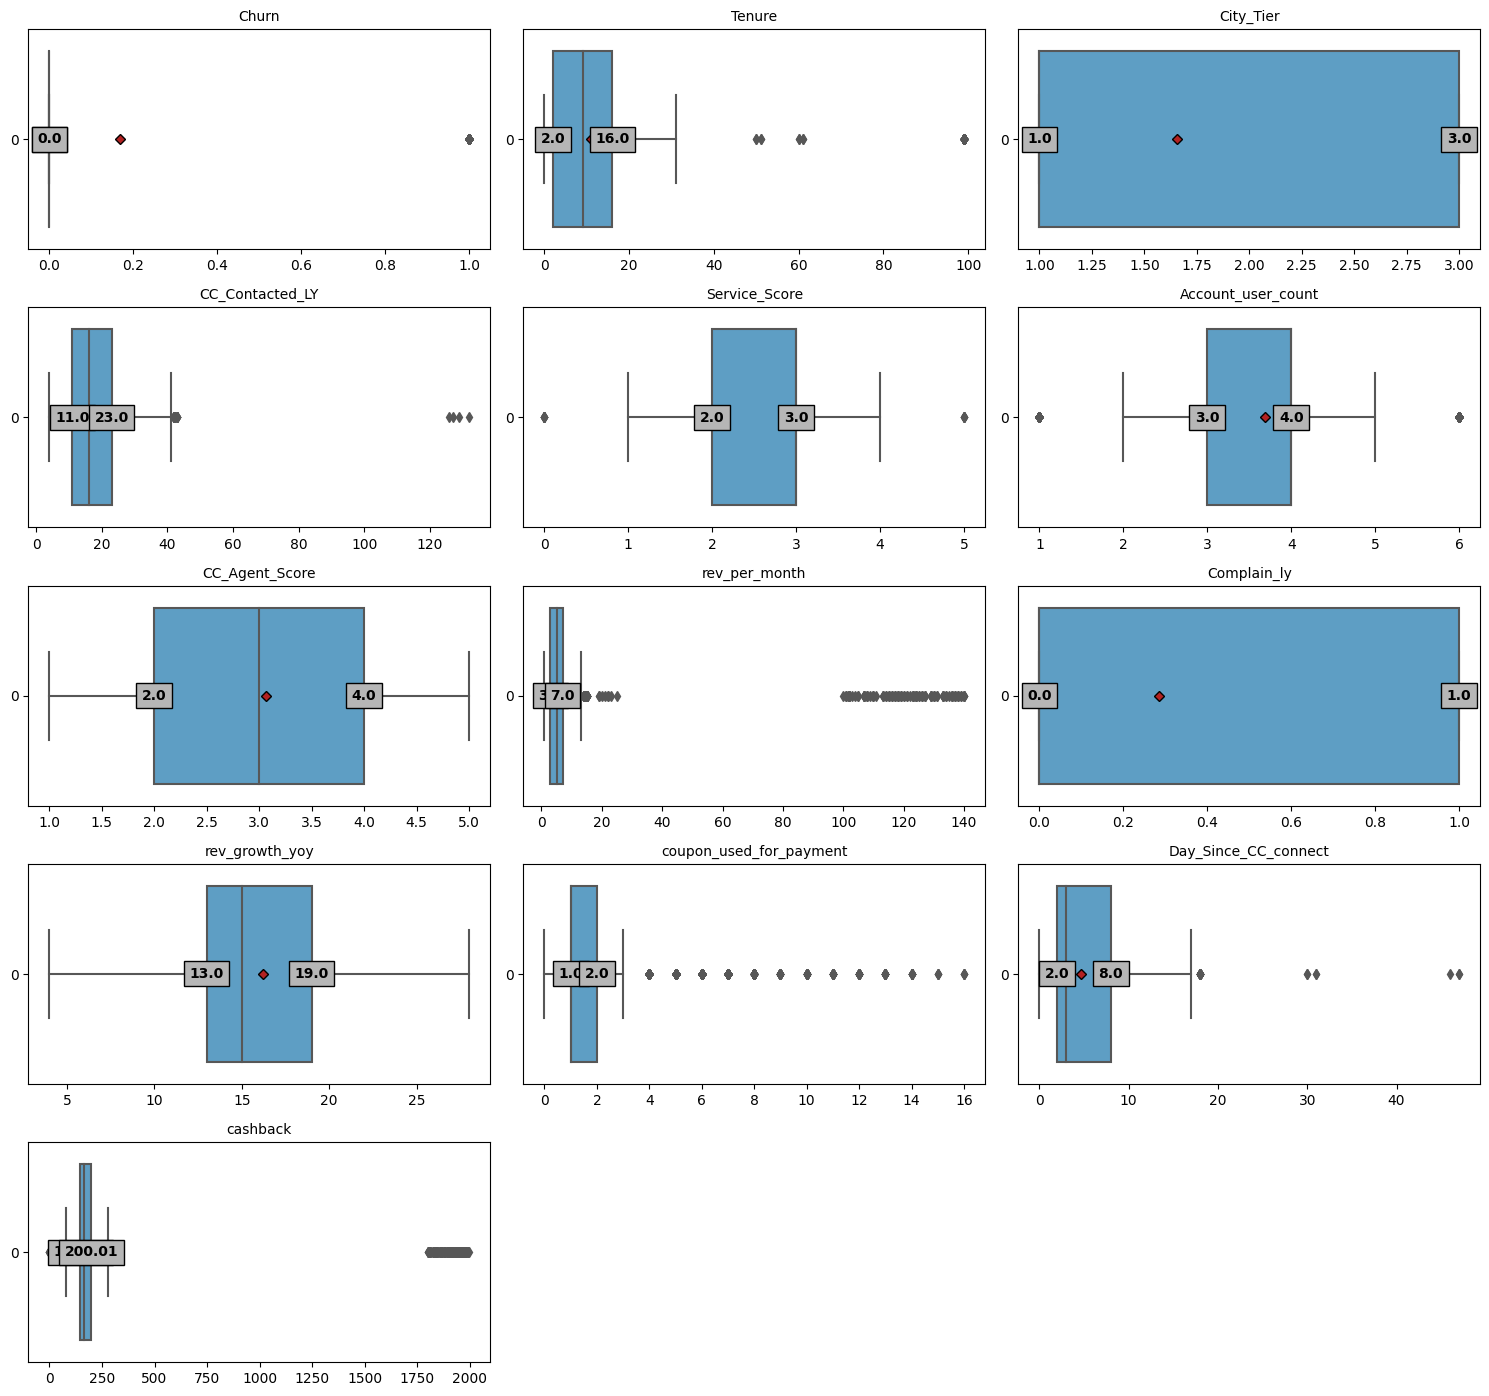

In [28]:
#Print floating variable boxplots
multipleBoxplotNumLoop(all_col,churn)

#### Observations On Boxplots

- The Churn data is imbalanced and heavily weighted toward accounts which have not churned (value of 0.00).
- The Tenure data has high outliers greater than the right whisker of 37. The outliers will be retained as they are reasonable.
- The City_Tier variable is imbalanced with 65.15% at value 1.0, 4.31% with value 2.0, and 30.54% with value 3.0.
- The CC_Contacted_LY has high outliers significantly greater than the right whisker value of 41. These will not be deleted.
  The median number of customers per account is 4.00 this and increased work from home which could account for outliers.

- Service_Score has both high and low outliers that will not be deleted as account holders provide these ratings.
- The Account_user_count plot has high and low outliers which appear to be valid data. Accounts service from 1 to 6 customers.
- CC_Agent_Score data appears to have a gaussian distribution and there are no outliers.

- The rev_per_month data is right skewed with outliers significantly greater han the right whisker of 13.
  The outliers will be retained as it is important to include data for high revenue accounts in the modeling.
  
-  Complain_ly is slightly right skewed with a mean of 0.29 greater than the median value of 0.00. There are no outliers.
- The rev_growth_yoy is right skewed as the mean of 16.19 is greater than the median of 15.00. There are no outliers.

- The coupon_used_for_payment data is right skewed as the mean of 1.79 is greater than the median of 1.00.
  There are outliers which are greater than the right whisker value of 3.5. The outliers appear valid and will be retained.
  
- The Day_Since_CC_connect data is right skewed with the 4.63 mean greater than the 3.00 median.  
  There are high outliers greater than the right whisker value of 17. The high outliers Appear valid and will be retained.
  
- The cashback data is right skewed with the mean of 196.23 being greater than the median of 165.25.
  High outliers much greater than the right whisker value of 279.20 will be retained as this data is important for modeling.
  

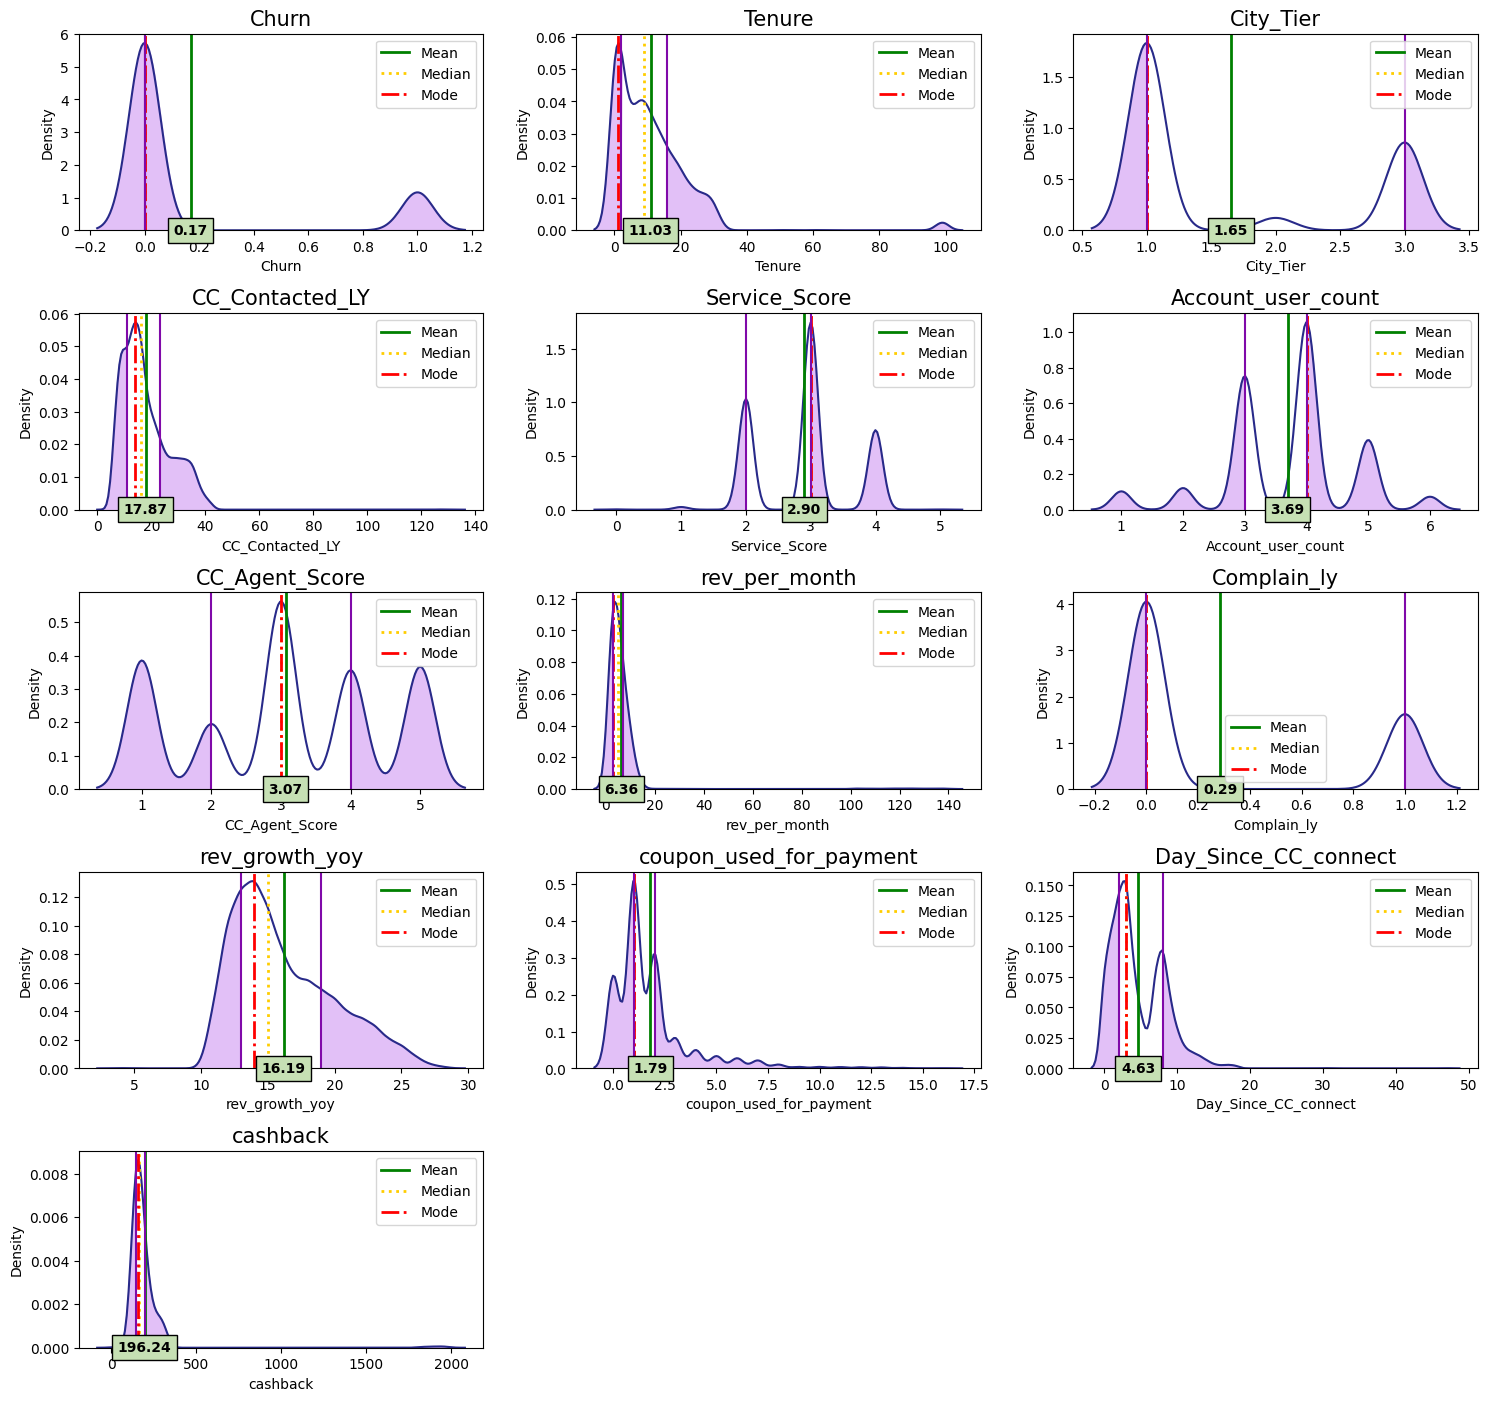

In [29]:
#Print floating variable distribution plots
multipleDspltNumLoop(all_col,churn)

#### Observations On Variable Distribution Plots

- The Churn data reflects that the target data is imbalanced with the majority class is a value of 0.00.

- The Tenure data is right skewed with high outliers greater than the right whisker of 37. The outliers will be retained.
  The  modal value for Tenure is 1.00, meaning that 12.24% of the accounts in the data have only been active for 1 month.
  
- The City_Tier data is imbalance with the model value value being 1.0

- The CC_Contacted_LY is right skewed with high outliers significantly greater than the right whisker value of 41. Outliers       will be retained. The median number of customers per account is 4.00. This and work from home could account for outliers.

- The Service_Score modal value is 3.0 with lesser peaks at 2.0 and 4.0. Data has both high and low outliers that will be
  retained as account holders provide these ratings.

- The Account_user_count plot has high and low outliers which appear to be valid data. Accounts service from 1 to 6 customers.
  The data has a relatively normal distribution with peaks at integer counts ranging up to a value of 6.
  
- CC_Agent_Score data has a balanced distribution with peaks at integer values ranging from 1 to 5. There are no outliers.

- The rev_per_month data is right skewed with outliers much greater than the right whisker of 13. Outliers will be retained.

-  The Complain_ly data is right skewed with a modal value of 0.00 and only 28.53% with a value of 1.00. There are no outliers.

- The rev_growth_yoy is right skewed as the mean of 16.19 is greater than the median of 15.00. There are no outliers.

- The coupon_used_for_payment data is right skewed as the mean of 1.79 is greater than the median and modal values of 1.00.
  The outliers which are greater than the right whisker value of 3.50 appear to be valid and will be retained.

- The Day_Since_CC_connect data is right skewed with the 4.63 mean greater than the 3.00 median. The modal value is 3.00 with a   lesser peak in values at 8.00.  There are high outliers greater than the right whisker value of 17.
  The high outliers appear valid and will be retained.
  
- The cashback data is right skewed with the mean of 196.23 being greater than the median of 165.25. High outliers much greater   than the right whisker value of 279.20 will be retained as this data as these may be high spending accounts.
  

#### Categorical  Variables

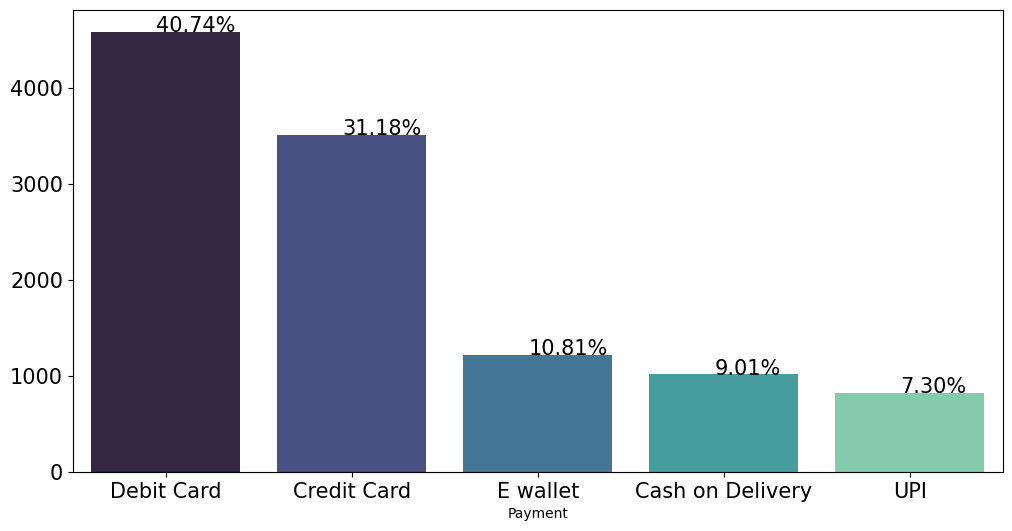

In [30]:
#Plot for Payment variable
ctmCrhSd = churn["Payment"]

plt.figure(figsize=(12,6))
ax = sns.countplot(data = churn, x = "Payment", palette="mako", order=ctmCrhSd.value_counts().index);
total = len(ctmCrhSd)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations on Payment variable

- Debit Card is used for 40.74% of payments.

- Credit Card is used by 31.18% of payments.

- E wallet is used for 10.81% of payments.

- Cash on Delivery is used for 9.01% of payments. This implies a physical product or onsite service is provided at homes.

- UPI (a smartphone App) is used for 7.30% of payments.

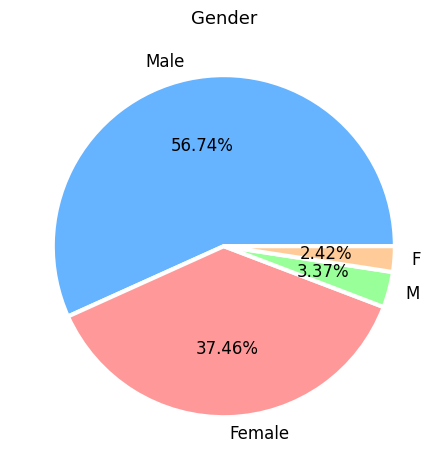

In [31]:
#Plot for Gender variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='Gender'
churn[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


#### Observations on Gender

- The Gender data is imbalanced as males (sum of Male and M categories) are 60.01% and females (sum of Female and F categories)
  are 39.89%.
  
- Category F will be cast to Female and category M will be cast to Male.


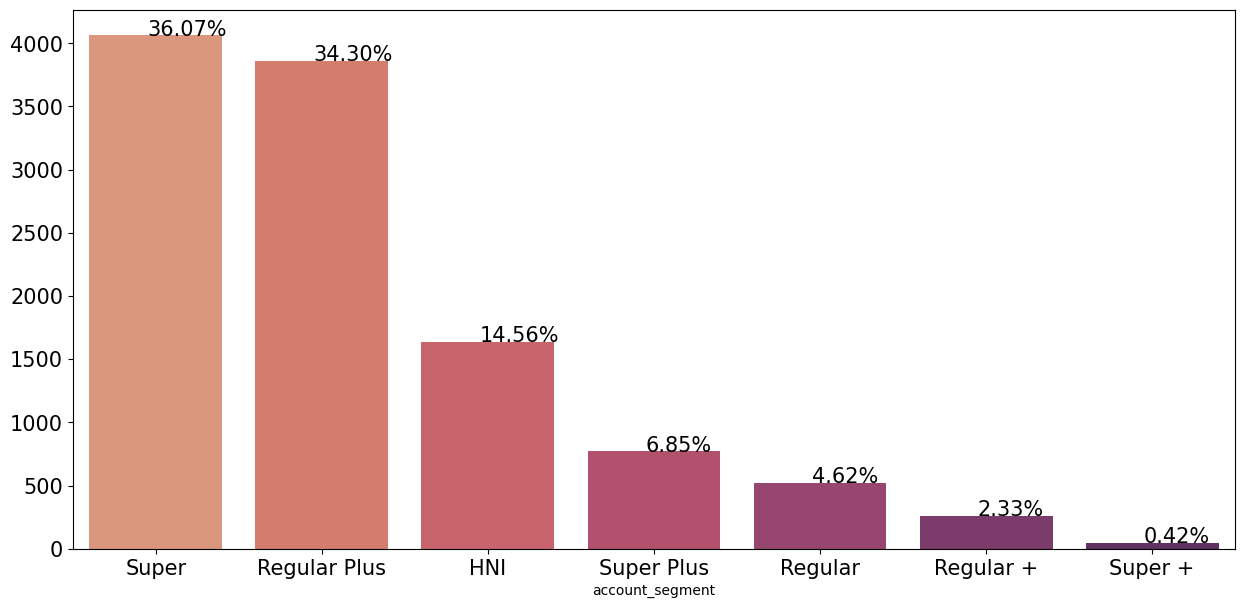

In [32]:
#Plot for account_segment variable
ctmCrhSd = churn["account_segment"]

plt.figure(figsize=(15,7))
ax = sns.countplot(data = churn, x = "account_segment", palette="flare", order=ctmCrhSd.value_counts().index);
total = len(ctmCrhSd)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations on account_segment variable

- These categories infer that the product is an on-site service with various grades, for example mobile auto cleaning.

- Super category is 36.07% of the total.

- The Regular Plus category total will be 36.63% after Regular + is cast to Regular Plus.

- The HNI category is 14.56% of the total.

- The total Super Plus category will be 7.27% after Super + is cast to Super Plus.

- The Regular category is 4.62%,

- The Regular + category will be transformed to Regular Plus and will increment the latter category.

- The Super + category will be transformed to Super Plus and will increment the latter category.


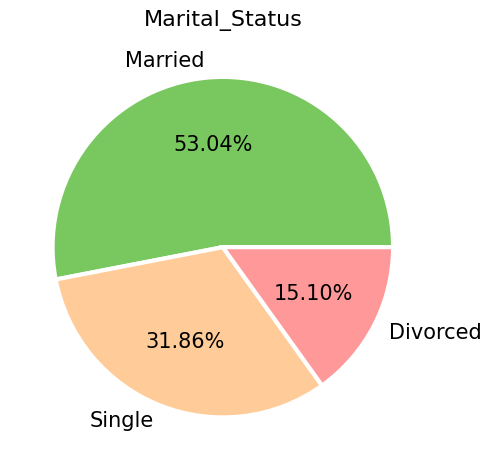

In [33]:
# Plot for Marital_Status variable
cls = ['#79c75f','#ffcc99','#ff9999','#ffcc99']
clmPlt ='Marital_Status'
churn[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 15}, colors=cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=16);
plt.ylabel("")
plt.tight_layout()
plt.show()

#### Observations on Marital_Status variable

- This data is imbalanced with Married being the majority class of 53.04%.

- Single is the second most numerous class with 31.86% of the population.

- Divorced is the third most numerous class with it being 15.10% of the total.

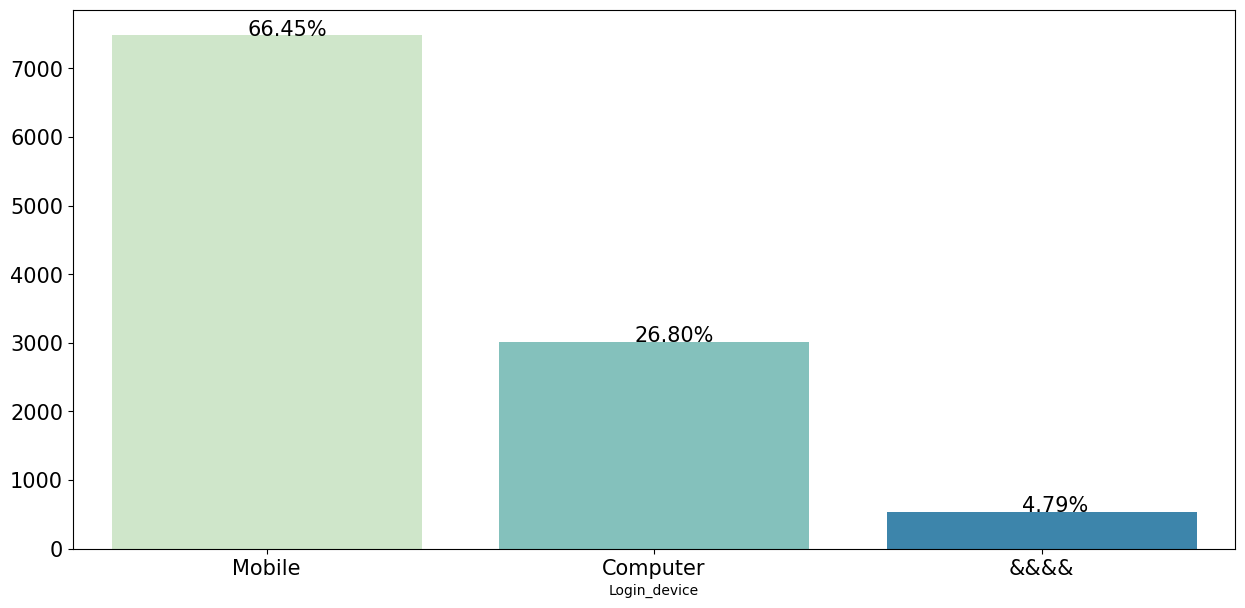

In [34]:
#Plot for Login_device variable
ctmCrhSd = churn["Login_device"]

plt.figure(figsize=(15,7))
ax = sns.countplot(data = churn, x = "Login_device", palette="GnBu", order=ctmCrhSd.value_counts().index);
total = len(ctmCrhSd)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations for Login_device variable

- The data is imbalanced and Mobile is the majority class with 66.45% of the population.

- Computer is the second most numerous login device with 26.80% of the population.

- The data population is 4.79% labelled as &&&& which is undefined and category will be imputed into Mobile and Computer.

### Multivariate Analysis

In [35]:
# Function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

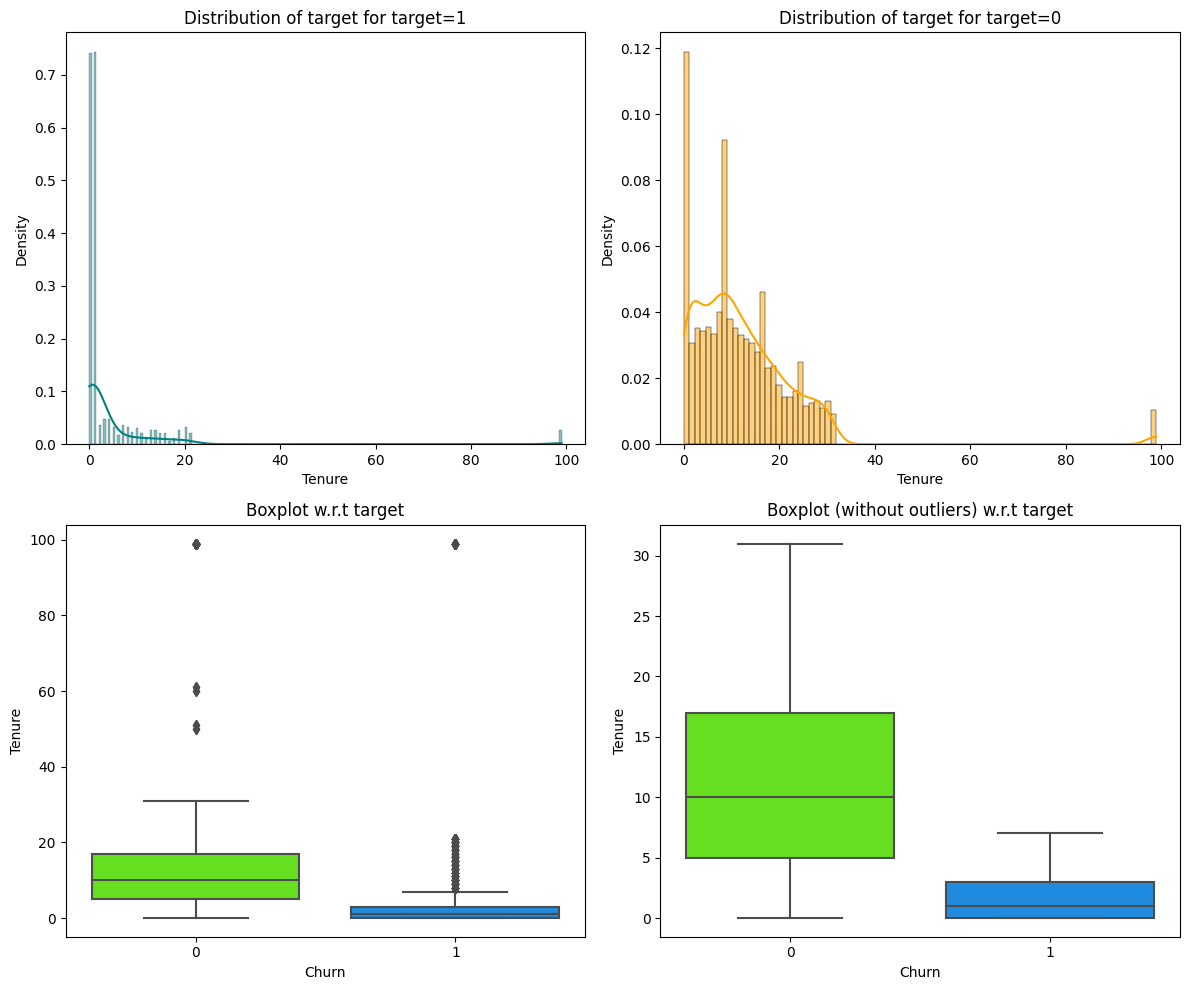

In [36]:
#Plot Tenure with Churn
distribution_plot_wrt_target(churn, "Tenure", "Churn")

#### Observations On Plot of Tenure wrt Churn

- There are high value outliers for Tenure for both accounts that churned and for accounts that did not churn. There are  
  significantly more outliers for the accounts which churned, with most of the outliers in the range up to a Tenure of 20
  months.

- Median Tenure for accounts the churned are approximately one month while the median Tenure for accounts that did not churn is
  approximately 10 months.

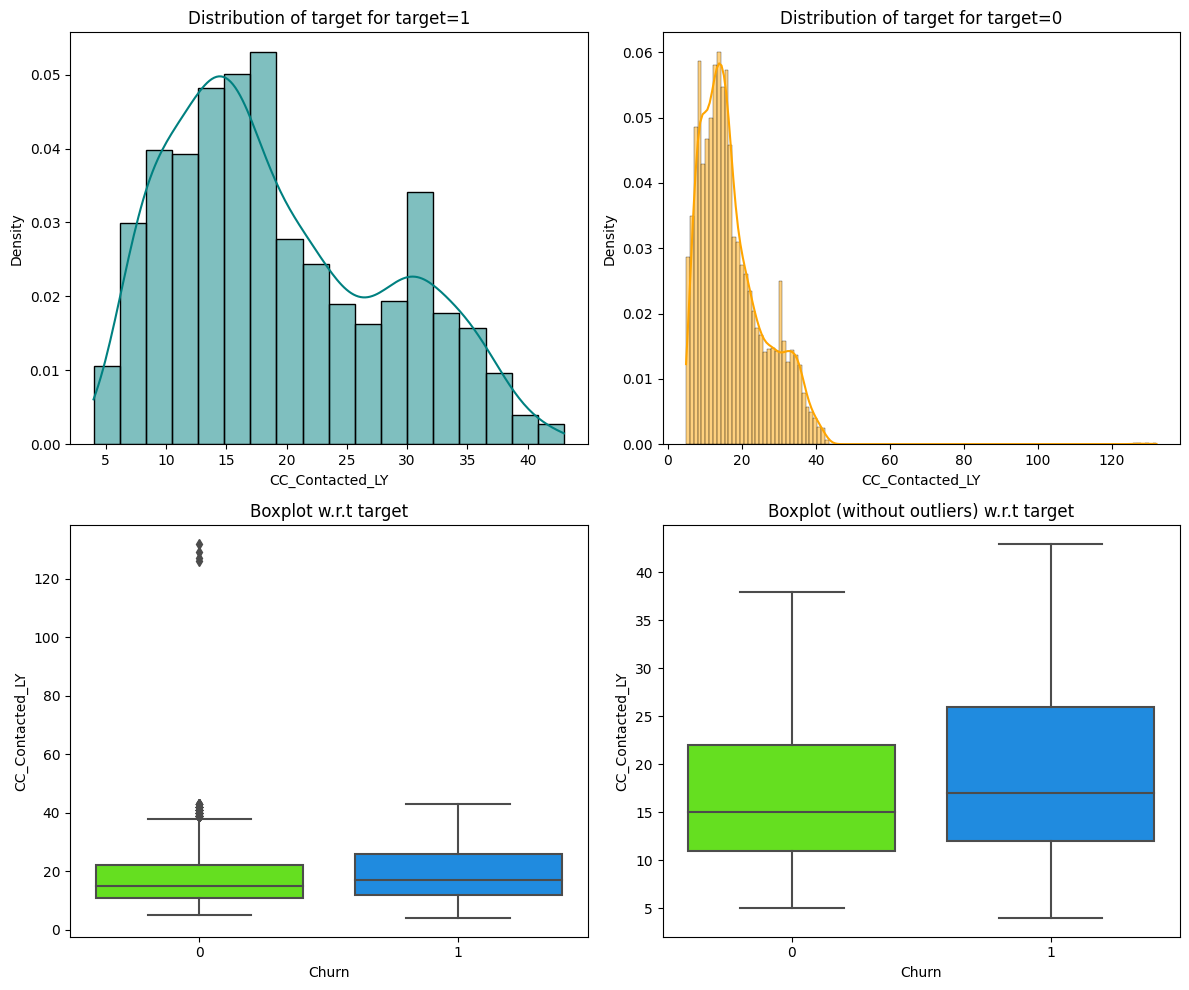

In [37]:
#Plot CC_Contacted_LY wrt Churn
distribution_plot_wrt_target(churn, "CC_Contacted_LY", "Churn")

#### Observations On Plot of CC_Contacted_LY wrt Churn

- The median value of CC_Contacted_LY of approximately 17.00 for accounts which churned is slightly greater than the median
  value of approximately 15.00 for accounts which did not churn.

- The data for CC_Contacted_LY for accounts which did not churned has high value outliers in the range of 120 - 140 so a high
  number for CC_Contacted_LY does not necessarily result in an account churn churning.

- The data for CC_Contacted_LY for accounts which churned does not have high value outliers.



In [38]:
#Plot barplot for Service_Score
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Churn             0     1    All
Service_Score                   
All            9282  1880  11162
3.0            4554   936   5490
2.0            2701   550   3251
4.0            1937   394   2331
0.0               8     0      8
1.0              77     0     77
5.0               5     0      5
------------------------------------------------------------------------------------------------------------------------


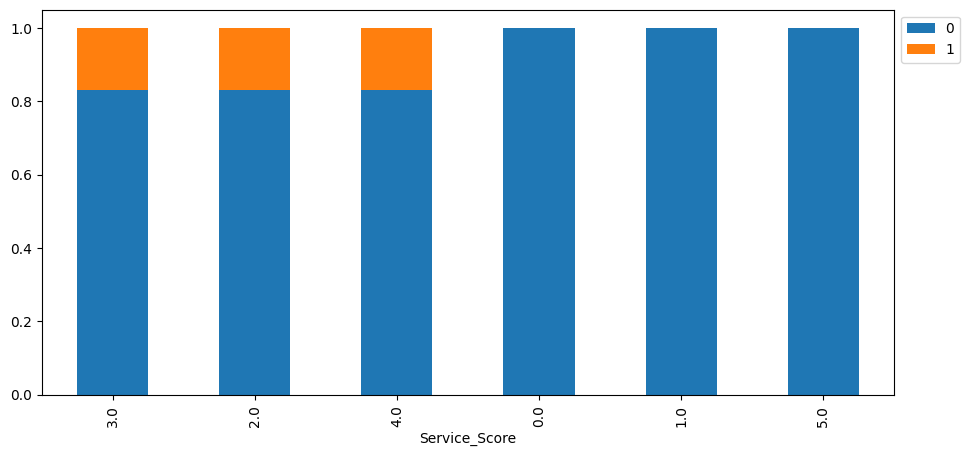

In [39]:
# Print stacked barplot of Service_Score wrt Churn
stacked_barplot(churn, "Service_Score", "Churn")

#### Observations On Service_Score wrt Churn

- The most frequent Service_Score was a 3.0 (49.18%)

- The Service_Score data for accounts which did not churn ranges from 0 to 5.

- There were no accounts which rated Service_Score of 5 which churned.

- None of the accounts with a Service_Score less than 2 churned.

- A total of 16.92% of the accounts with Service_Score 2.0 churned.

- A total of 17.05% of accounts with Service_Score 3.0 churned.

- A total of 16.90% of the accounts with Service_Score 4.0 churned.


Churn                  0     1    All
Account_user_count                   
All                 8986  1830  10816
4.0                 3811   758   4569
3.0                 2772   489   3261
5.0                 1317   382   1699
6.0                  206   109    315
2.0                  478    48    526
1.0                  402    44    446
------------------------------------------------------------------------------------------------------------------------


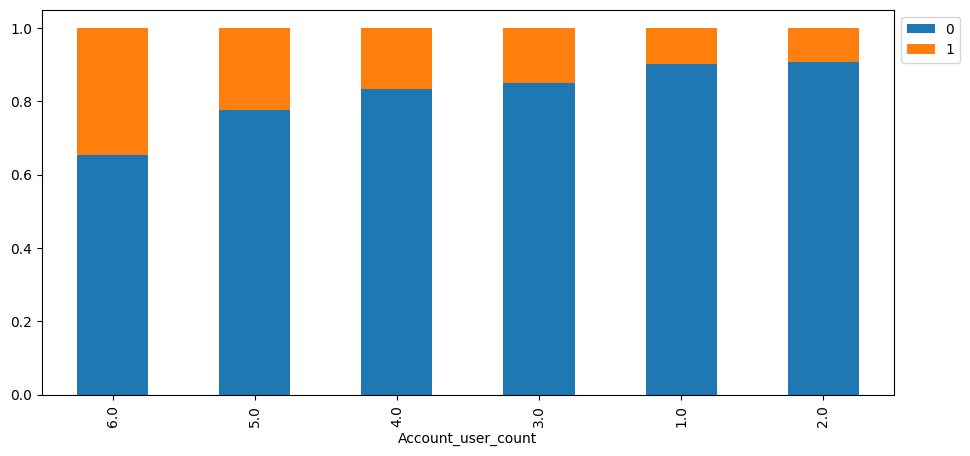

In [40]:
# Print stacked barplot of Account_user_count wrt Churn
stacked_barplot(churn, "Account_user_count", "Churn")

#### Observations On Account_user_count wrt Churn

- A total of 34.60% of accounts with Account_user_count equal to 6.00 churned.

- A total of 22.48% of accounts with Account_user_count equal to 5.00 churned.

- A total of 16.59% of accounts with Account_user_count equal to 4.00 churned.

- A total of 15.00% of accounts with Account_user_count equal to 3.00 churned.

- A total of 9.87% of accounts with Account_user_count equal to 1.00 churned.

- A total of 9.13% of accounts with Account_user_count equal to 2.00 churned.


Churn              0     1    All
CC_Agent_Score                   
All             9270  1874  11144
3.0             2783   577   3360
5.0             1669   522   2191
4.0             1763   364   2127
1.0             2038   264   2302
2.0             1017   147   1164
------------------------------------------------------------------------------------------------------------------------


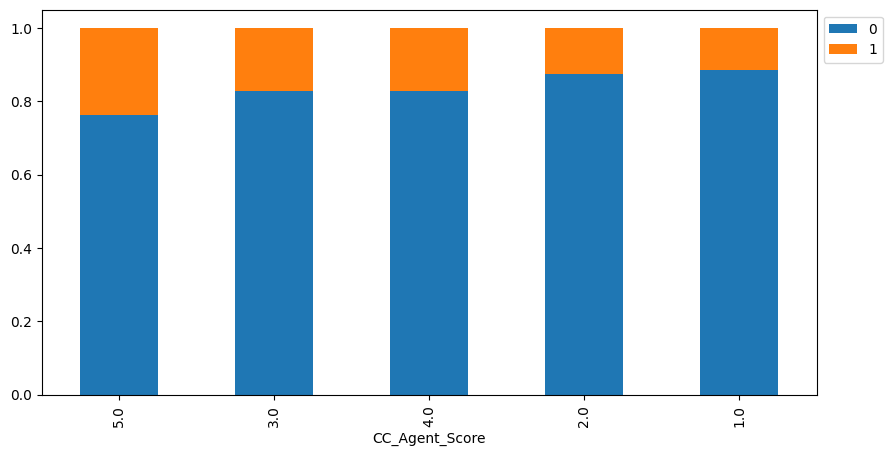

In [41]:
# Plot stacked barplot of CC_Agent_Score wrt Churn
stacked_barplot(churn, "CC_Agent_Score", "Churn")

#### Observations On CC_Agent_Score wrt Churn

- A total of 23.82% of accounts with CC_Agent_Score of 5.0 churned.

- A total of 17.17% of accounts with CC_Agent_Score of 3.0 churned.

- A total of 17.11% of accounts with CC_Agent_Score of 4.0 churned.

- A total of 12.63% of accounts with CC_Agent_Score of 2.0 churned.

- A total of 11.47% of accounts with CC_Agent_Score of 1.0 churned


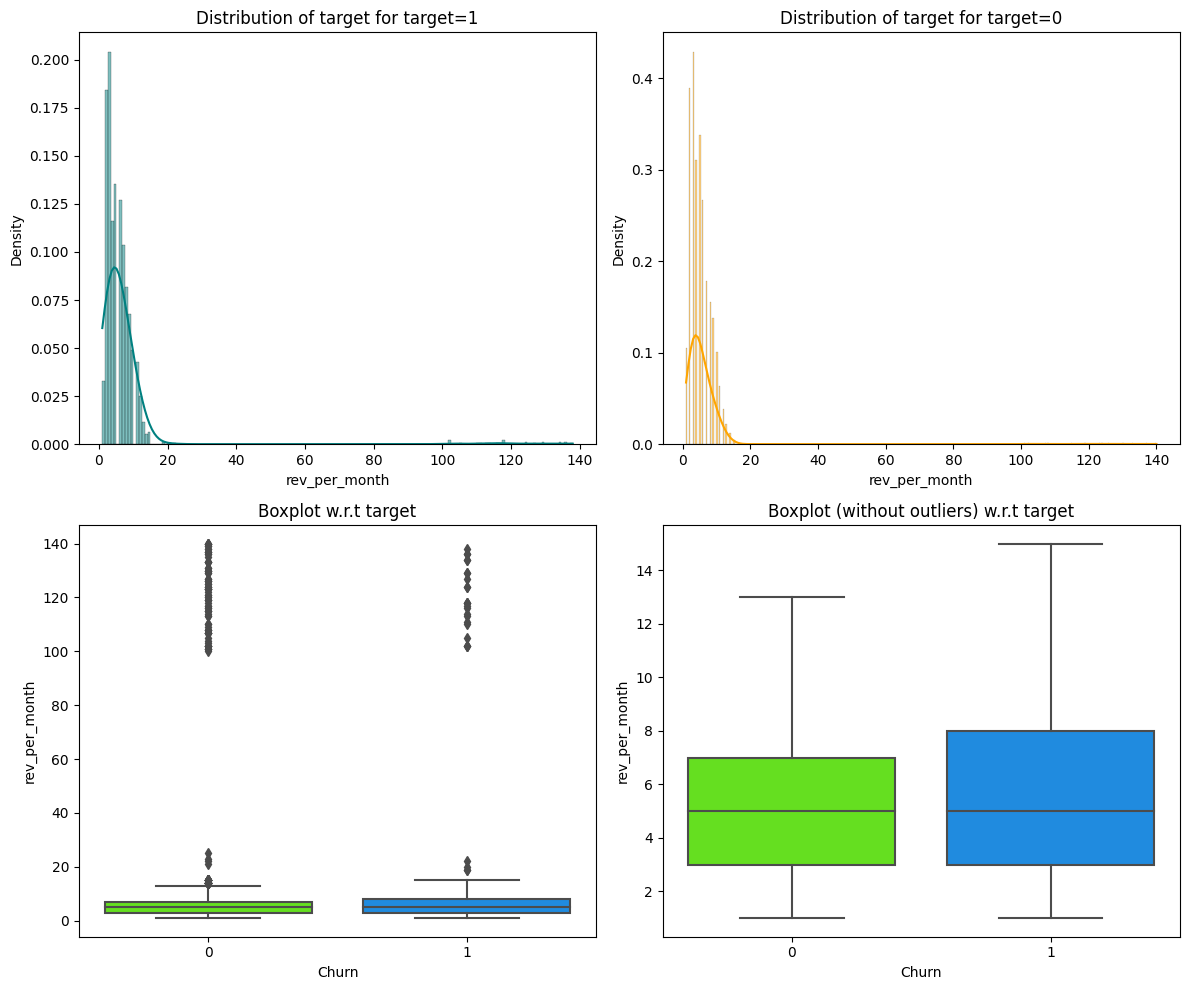

In [42]:
#Plot rev_per_month with Churn
distribution_plot_wrt_target(churn, "rev_per_month", "Churn")

#### Observations On rev_per_month wrt Churn¶

- When considered without outliers, the median rev_per_month for both accounts which churned and accounts which did not churn is approximately 5.0.

- Both accounts which churned and accounts which did not churn have high outliers in the range of 100 to 140.


Churn           0     1    All
Complain_ly                   
All          9065  1838  10903
1.0          2123   988   3111
0.0          6942   850   7792
------------------------------------------------------------------------------------------------------------------------


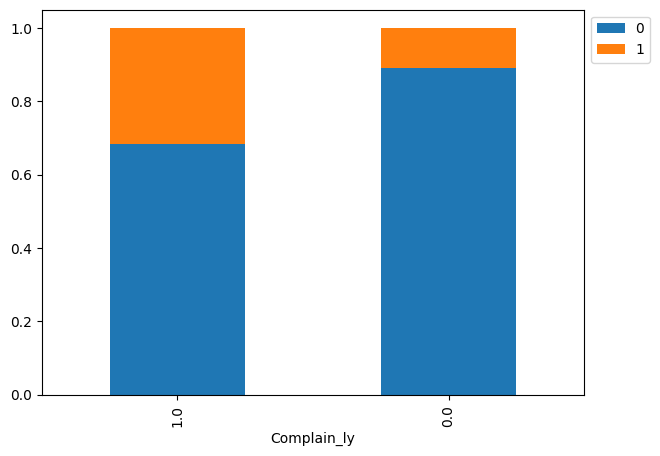

In [43]:
stacked_barplot(churn, "Complain_ly", "Churn")

#### Observations On Complain_ly wrt Churn¶

- A total of 31.76% of accounts with Complain_ly value of 1.0 churned.

- A total of 10.91% of accounts with Complain_ly value of 0.0 churned. These accounts churned before filing an account.


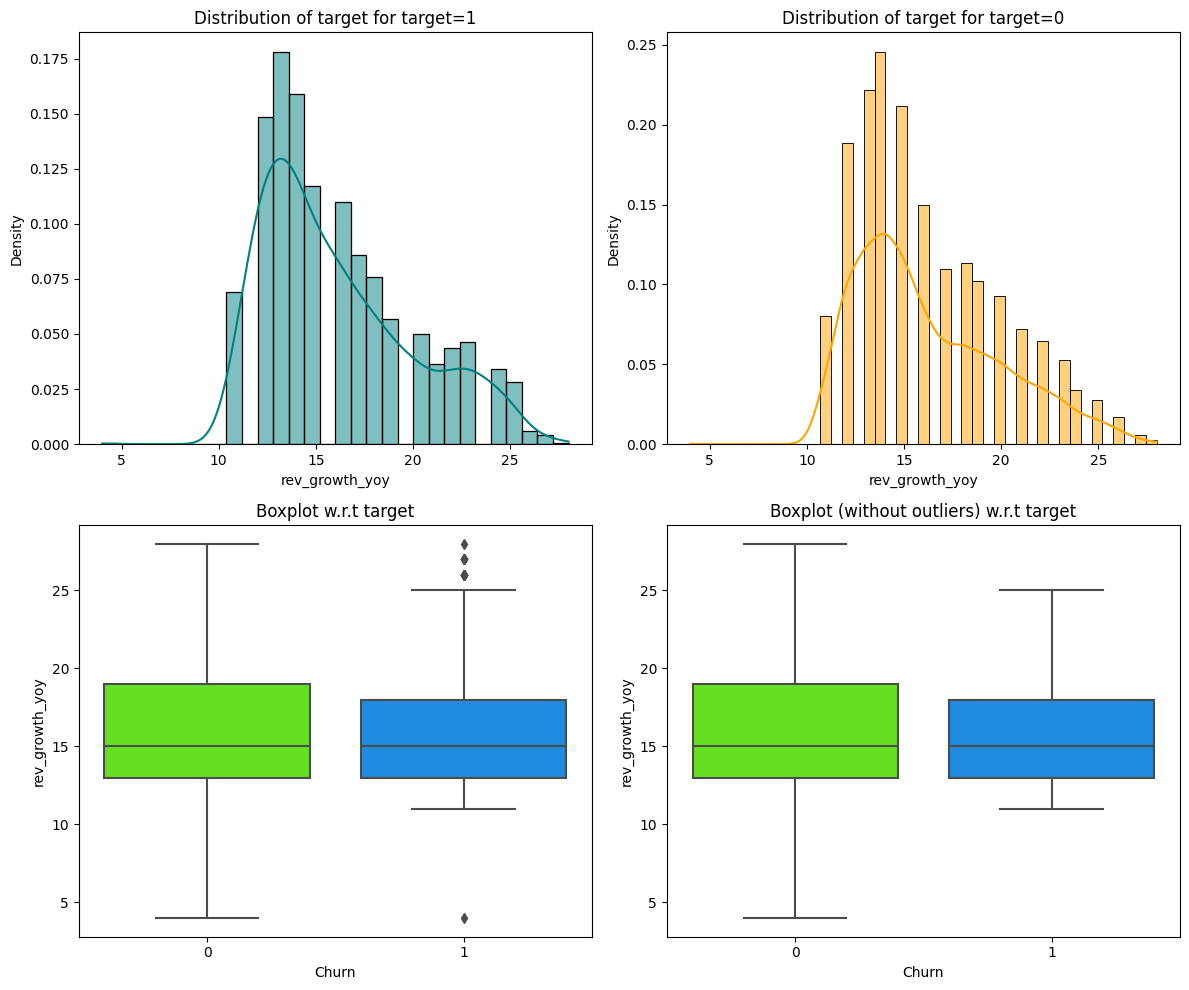

In [44]:
#Plot rev_growth_yoy with Churn
distribution_plot_wrt_target(churn, "rev_growth_yoy", "Churn")

#### Observations On rev_growth_yoy wrt Churn¶

- The median for both accounts which churned and accounts which did not churn is approximately 15.0.

- The data for accounts which churned has both high outliers with values greater than 25 as well as low outliers.


Churn                       0     1    All
coupon_used_for_payment                   
All                      9361  1896  11257
1.0                      3613   760   4373
2.0                      2210   446   2656
0.0                      1776   374   2150
3.0                       602    96    698
4.0                       362    62    424
5.0                       238    46    284
6.0                       198    36    234
7.0                       148    36    184
8.0                        68    20     88
10.0                       28     6     34
11.0                       26     4     30
9.0                        30     4     34
12.0                       24     2     26
15.0                        2     2      4
16.0                        2     2      4
13.0                       22     0     22
14.0                       12     0     12
------------------------------------------------------------------------------------------------------------------------


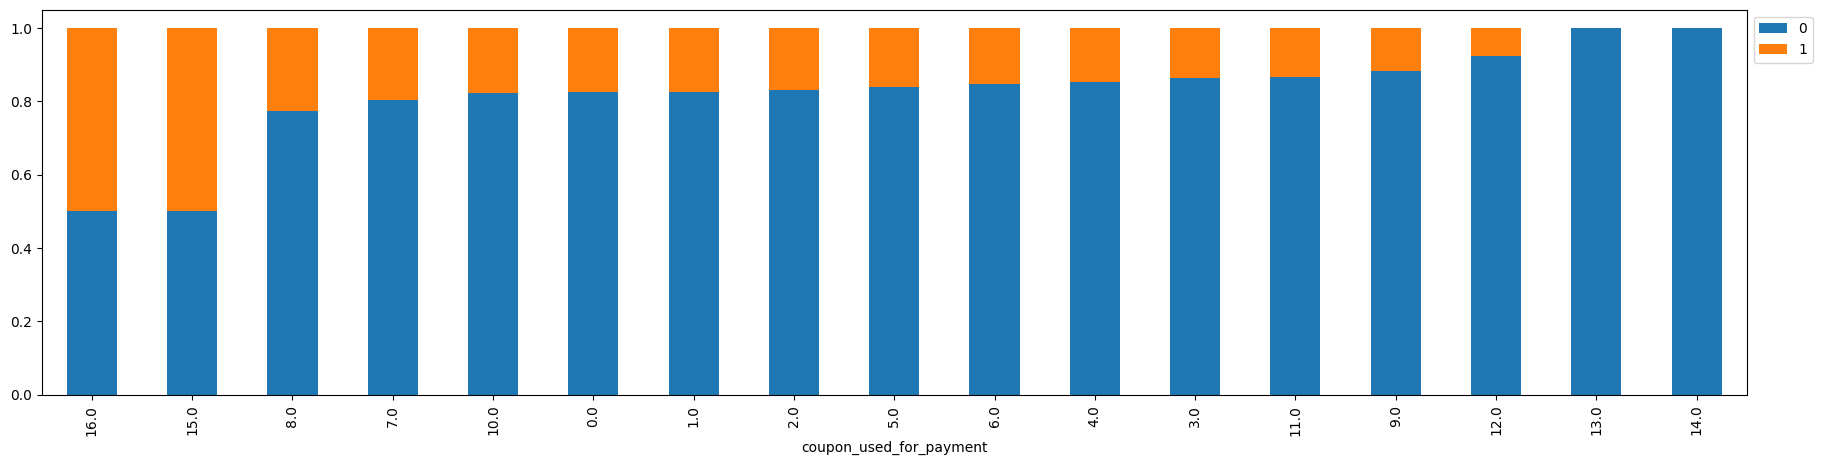

In [45]:
# Plot stacked barplot of coupon_used_for_payment wrt Churn
stacked_barplot(churn, "coupon_used_for_payment", "Churn")

#### Observations On coupon_used_for_payment wrt Churn¶

- The accounts with accounts_used for payment equal to 16.0 churned 50.00% of the time, although the number of data points is
  very small.

- The accounts with accounts_used for payment equal to 15.0 churned 50.00% of the time, although the number of data points is
  very small.


- The accounts with accounts_used for payment equal to 8.0 churned 22.73% of the time, with other values for this data point
  resulting in a lower Churn percentage.


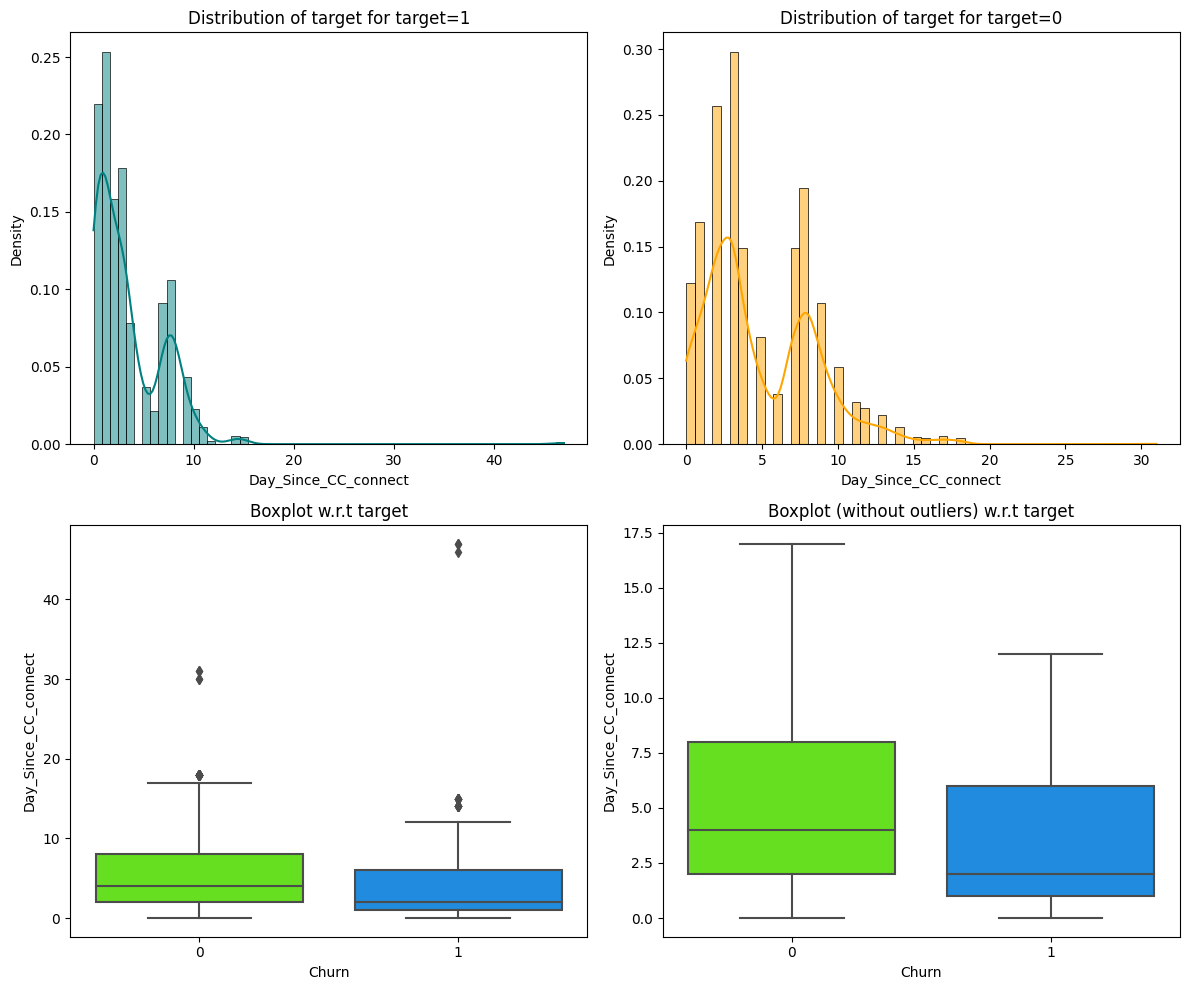

In [46]:
#Plot Day_Since_CC_connect with Churn
distribution_plot_wrt_target(churn, "Day_Since_CC_connect", "Churn")

#### Observations On coupon_used_for_payment wrt Churn¶

- There are high value outliers for both accounts which churned and accounts which did not churn.

- All of the accounts with a value of coupon_used_for_payment greater than 35.0 churned.

- The median for accounts which churned was approximately 2.00 as compared to the median for accounts which did not churn of
  approximately 4.00.





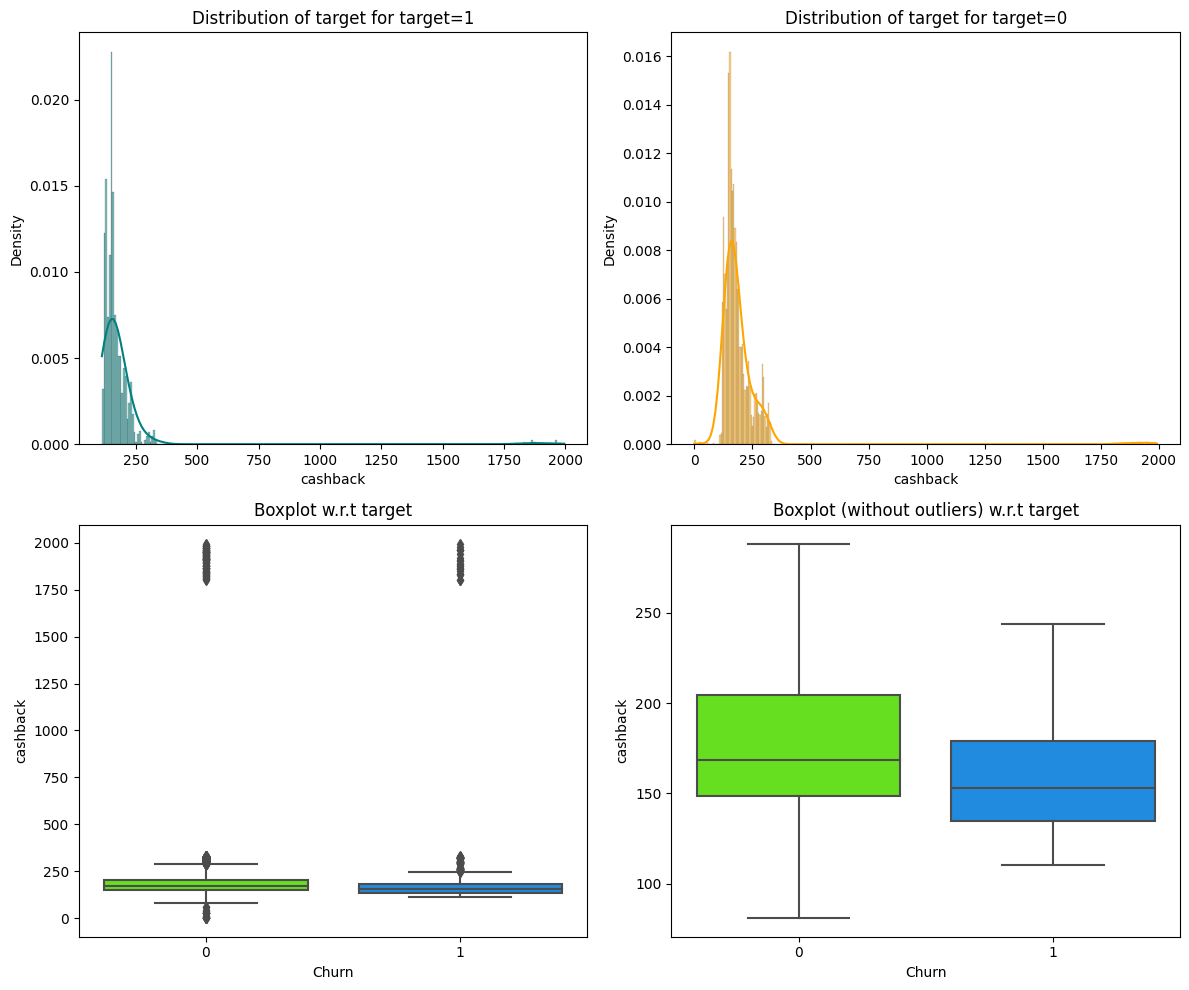

In [47]:
#Plot cashback with Churn
distribution_plot_wrt_target(churn, "cashback", "Churn")

#### Observations On cashback wrt Churn¶

- Both accounts which churned and accounts which did not churn had outlier values above 1750.00.

- The accounts which did not churn had low outlier values.

- The median value for accounts which did not churn was slightly greater than he median value for account which did churn,
  regardless of whether outliers are included in the plot.





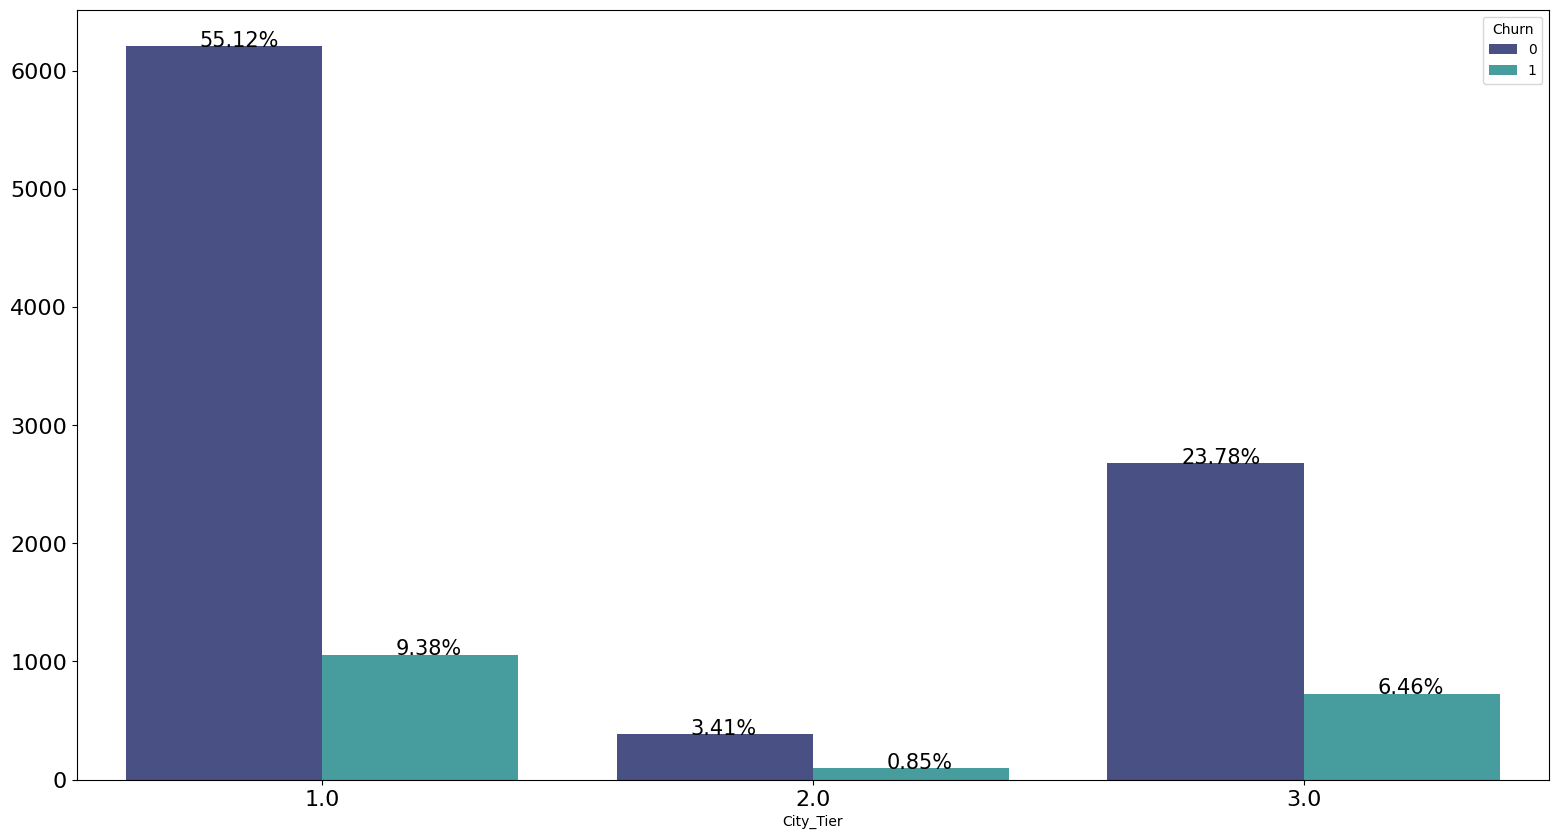

In [48]:
#Plot City_Tier wrt Churn
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='City_Tier', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


#### Observations On City_Tier wrt Churn

- Data is imbalanced, City_Tier 1.0 is 65.15%, followed by City_Tier 3.0 (30.54%), City_Tier 2.0 is 4.31%.

- A total of 14.54% of City_Tier 1.0 accounts churned.

- A total of 19.95% of City_Tier 2.0 accounts churned.

- A total of 21.36% of City_Tier 3.0 accounts churned.


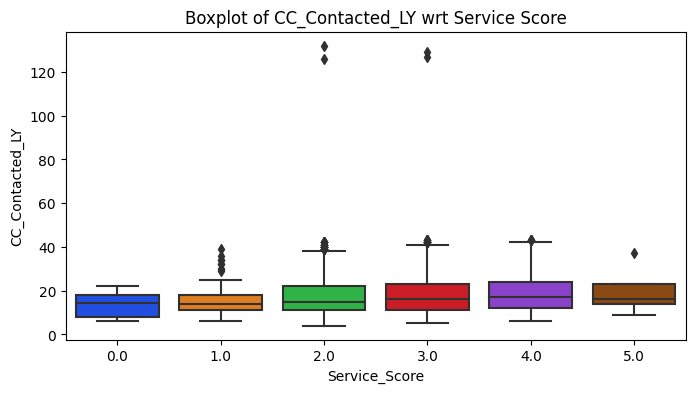

In [49]:
#Plot boxplots for CC_Contacted_LY wrt Service_score
# Set a bright color palette
bright_palette = sns.color_palette('bright')

# Create a boxplot using Seaborn
plt.figure(figsize=(8, 4))
sns.boxplot(data=churn, x='Service_Score', y='CC_Contacted_LY', palette=bright_palette)
plt.title('Boxplot of CC_Contacted_LY wrt Service Score')
plt.xlabel('Service_Score')
plt.ylabel('CC_Contacted_LY')
plt.show()



#### Observations On CC_Contacted_LY wrt Service_Score¶

- The 25th percentile for CC_Contacted_LY (approximately 15.00) for accounts providing a Service _Score of 5.0 is greater than
  for all the other Service_Score ratings.  This suggests that maintaining customer contact above a specified level contributes
  to customer satisfaction.

- The Service_Score ratings of 2.0 and 3.0 which are associated with greater churn rate have high outliers for CC_Contact_LY
  values which are greater than 120.00.

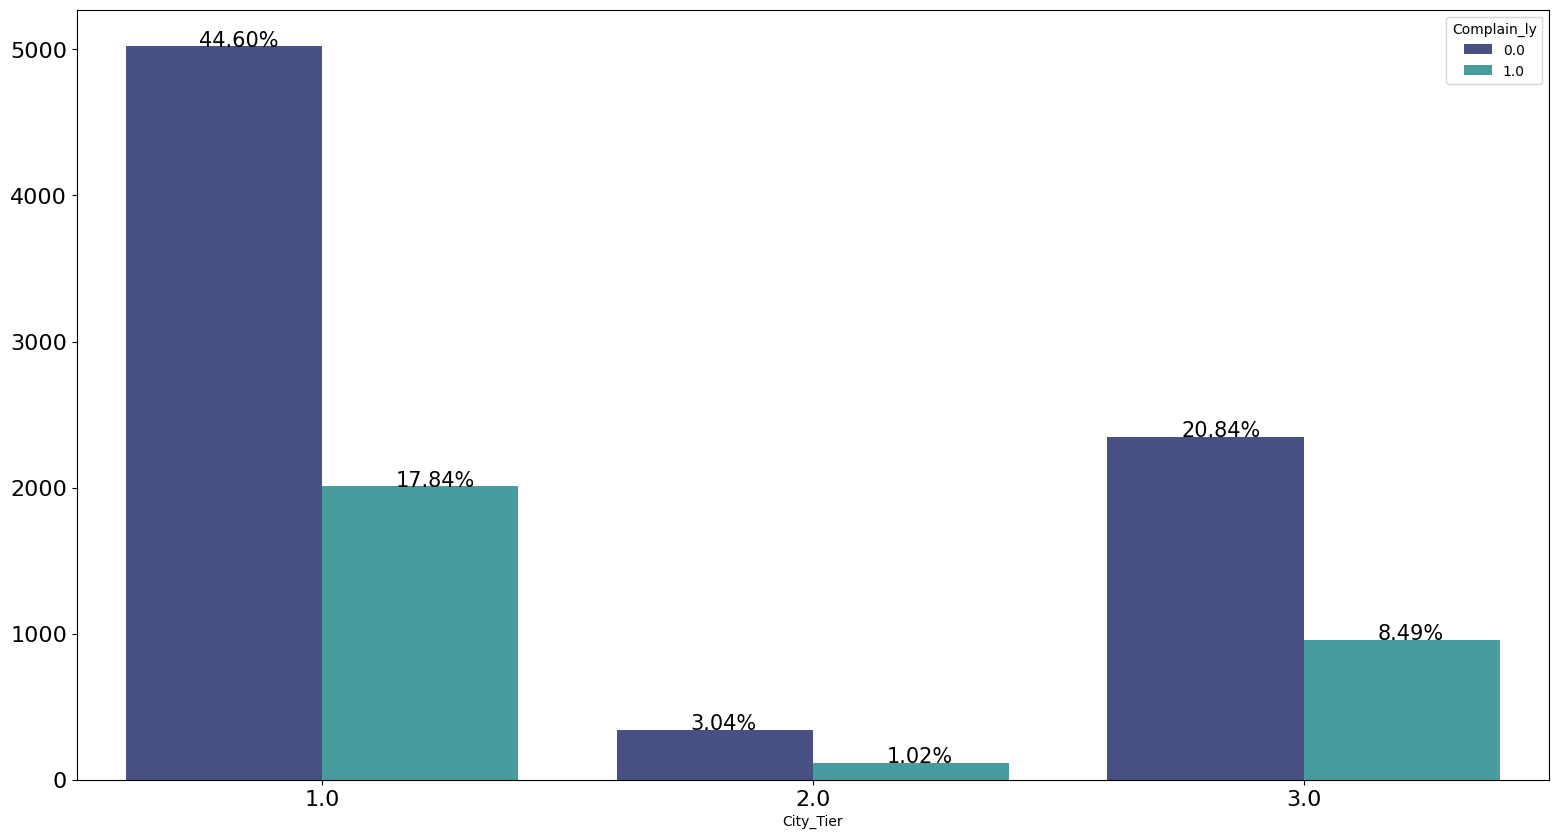

In [50]:
#Plot City_Tier wrt Complain_ly
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Complain_ly", x='City_Tier', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


#### Observations On City_Tier wrt Complain_LY

- Data is imbalanced, City_Tier 1.0 is 65.15%, followed by City_Tier 3.0 (30.54%), City_Tier 2.0 is 4.31%.

- A total of 28.25% of City_Tier 1.0 accounts registered a complaint in the last 12 months.

- A total of 25.12% of City_Tier 2.0 accounts registered a complaint in the last 12 months.

- A total of 28.95% of City_Tier 3.0 accounts registered a complaint in the last 12 months.


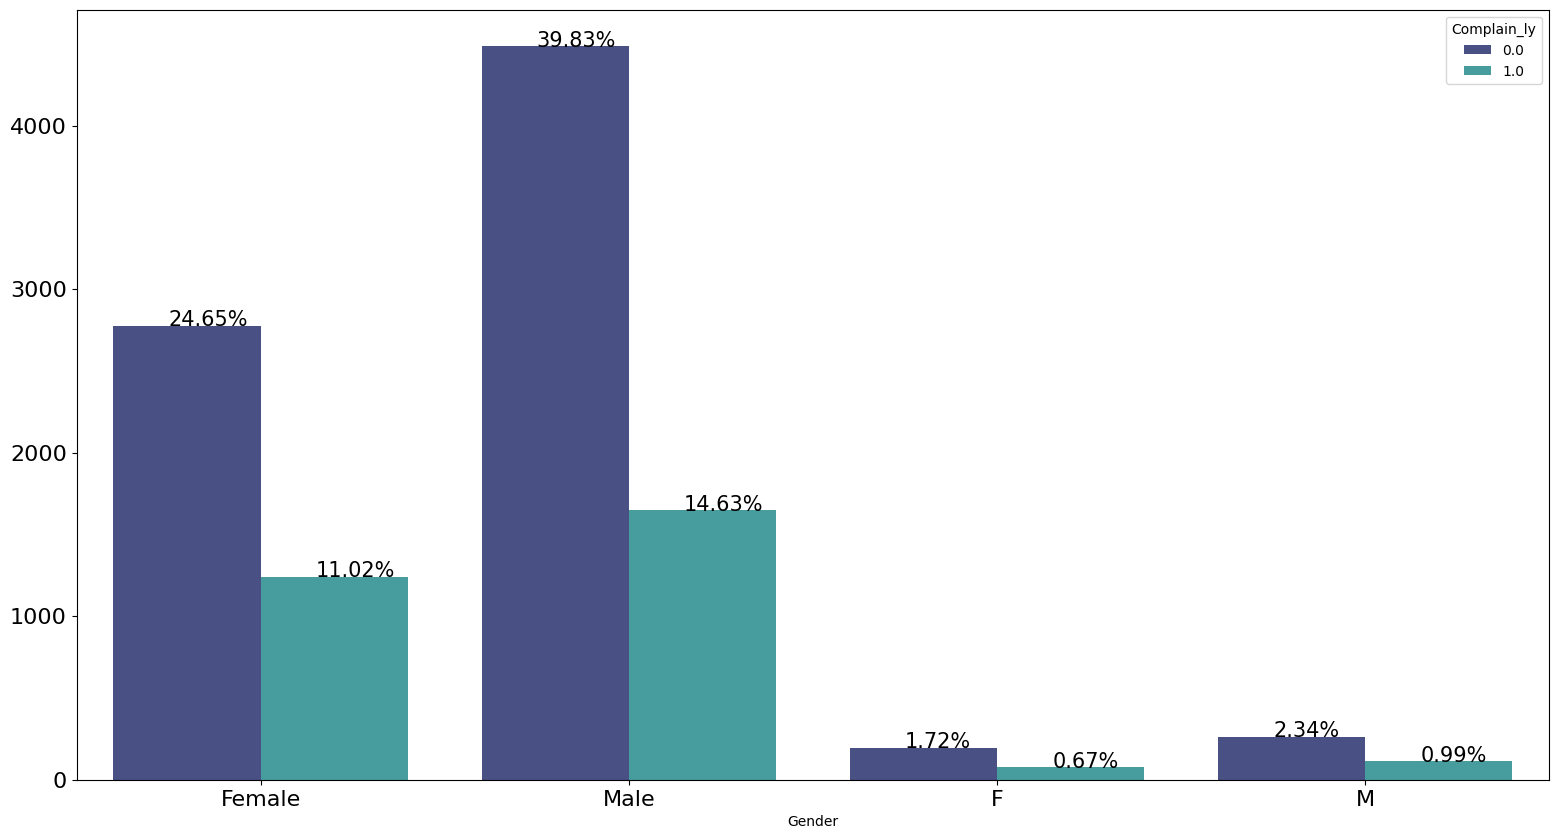

In [51]:
#Plot Gender wrt Complain_ly
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Complain_ly", x='Gender', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Observations On Gender wrt Complain_ly

- The category labelled F will be recast as Female.
- The category labelled M will be recast as Male.
- A total of 30.71% of accounts with primary account holder of gender female registered a complaint in the last 12 months.
- A total of 27.03% of accounts with primary account holder of gender male registered a complaint in the last 12 months.

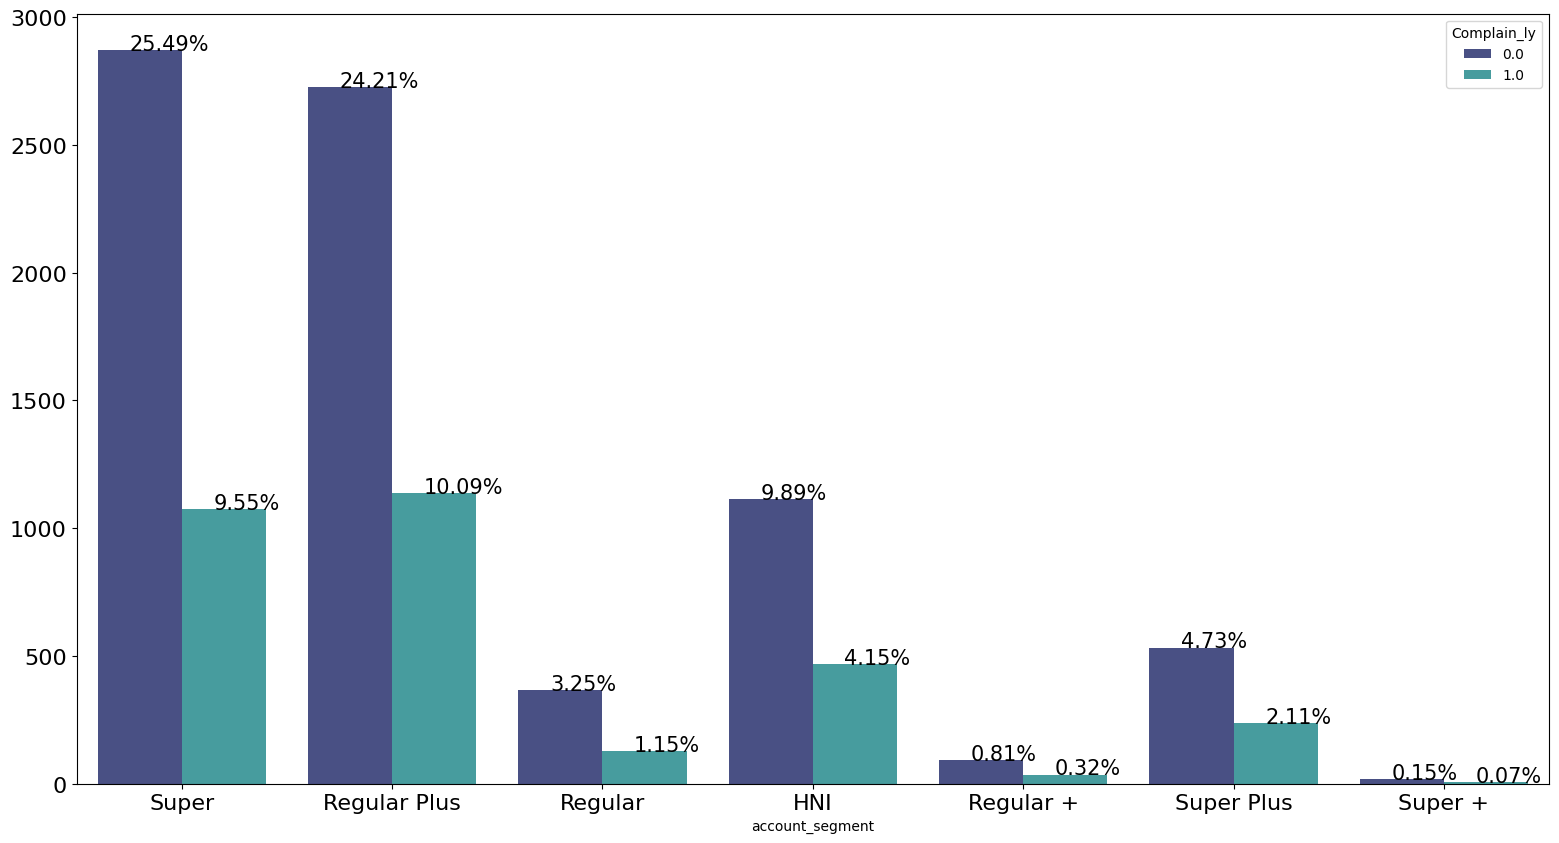

In [52]:
#Plot account_segment wrt Complain_ly
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Complain_ly", x='account_segment', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


#### Observations On account_segment wrt Complain_ly

- The accounts labelled Regular + will be recast as Regular Plus.
- The accounts labelled Super + will be recast as Super Plus
- A total of 26.14% of accounts labelled as regular submitted a complaint in last 12 months.
- A total of 29.38% of accounts labelled as regular plus submitted a complaint in last 12 months.
- A total of 27.25% of accounts labelled as super submitted a complaint in last 12 months.
- A total of 30.88% of accounts labelled as super plus submitted a complaint in last 12 months.
- A total of 29.56% of accounts labelled as HNI submitted a complaint in last 12 months.

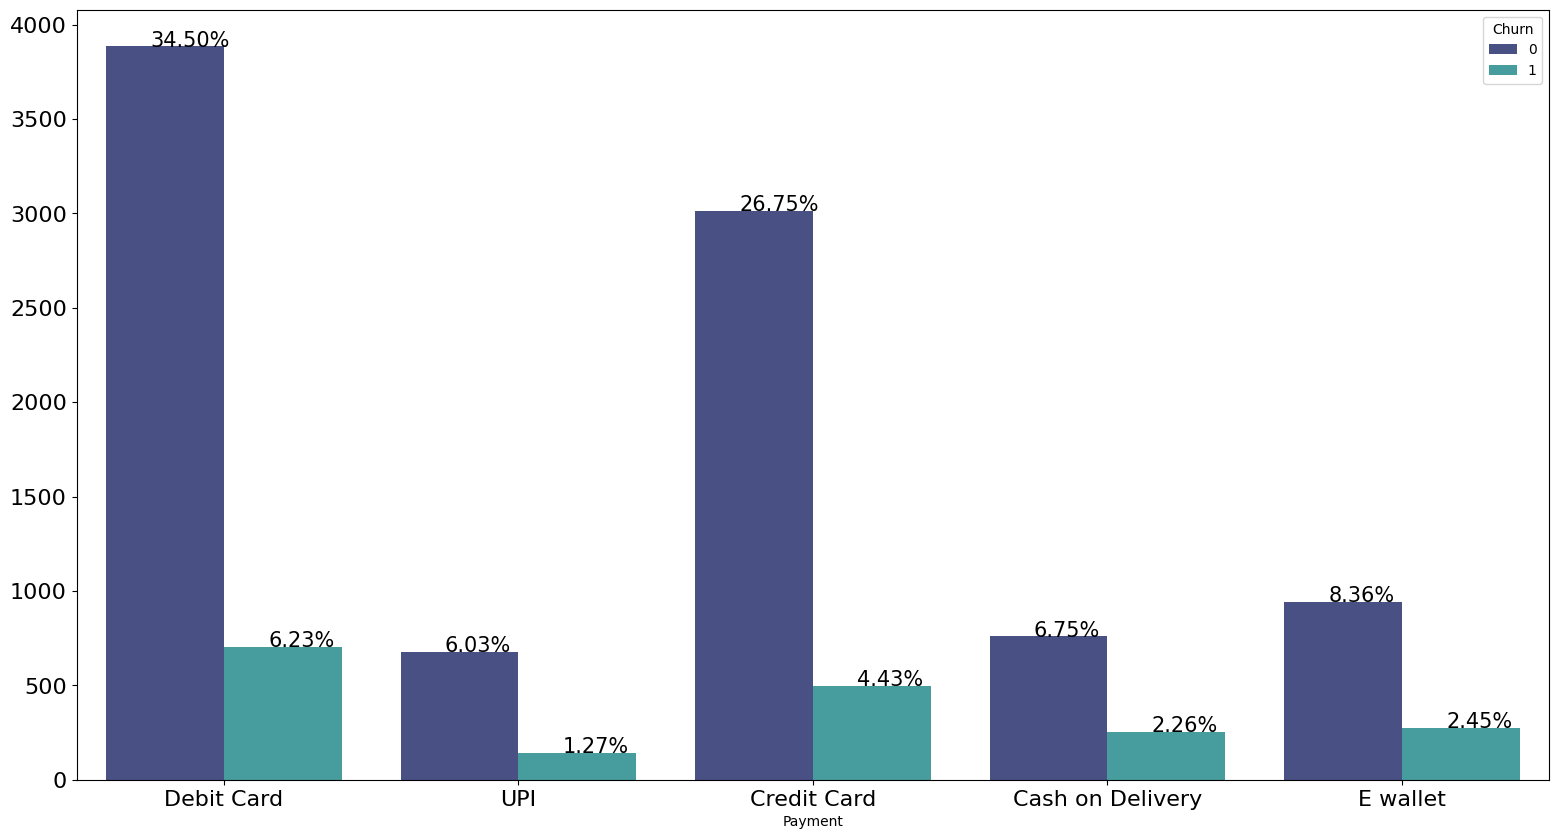

In [53]:
#Plot Payment wrt Churn
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='Payment', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


#### Observations On Payment wrt Churn

- Debit card is the most popular payment mode (40.73%) followed by credit card (31.18%).

- A total of 15.30% of accounts which used a Debit Card churned.

- A total of 17.40% of accounts which used UPI churned.

- A total of 14.21% of accounts which used a Credit Card churned.

- A total of 25.08% of accounts using cash on delivery churned.

- A total of 22.66% of accounts using E wallet churned.


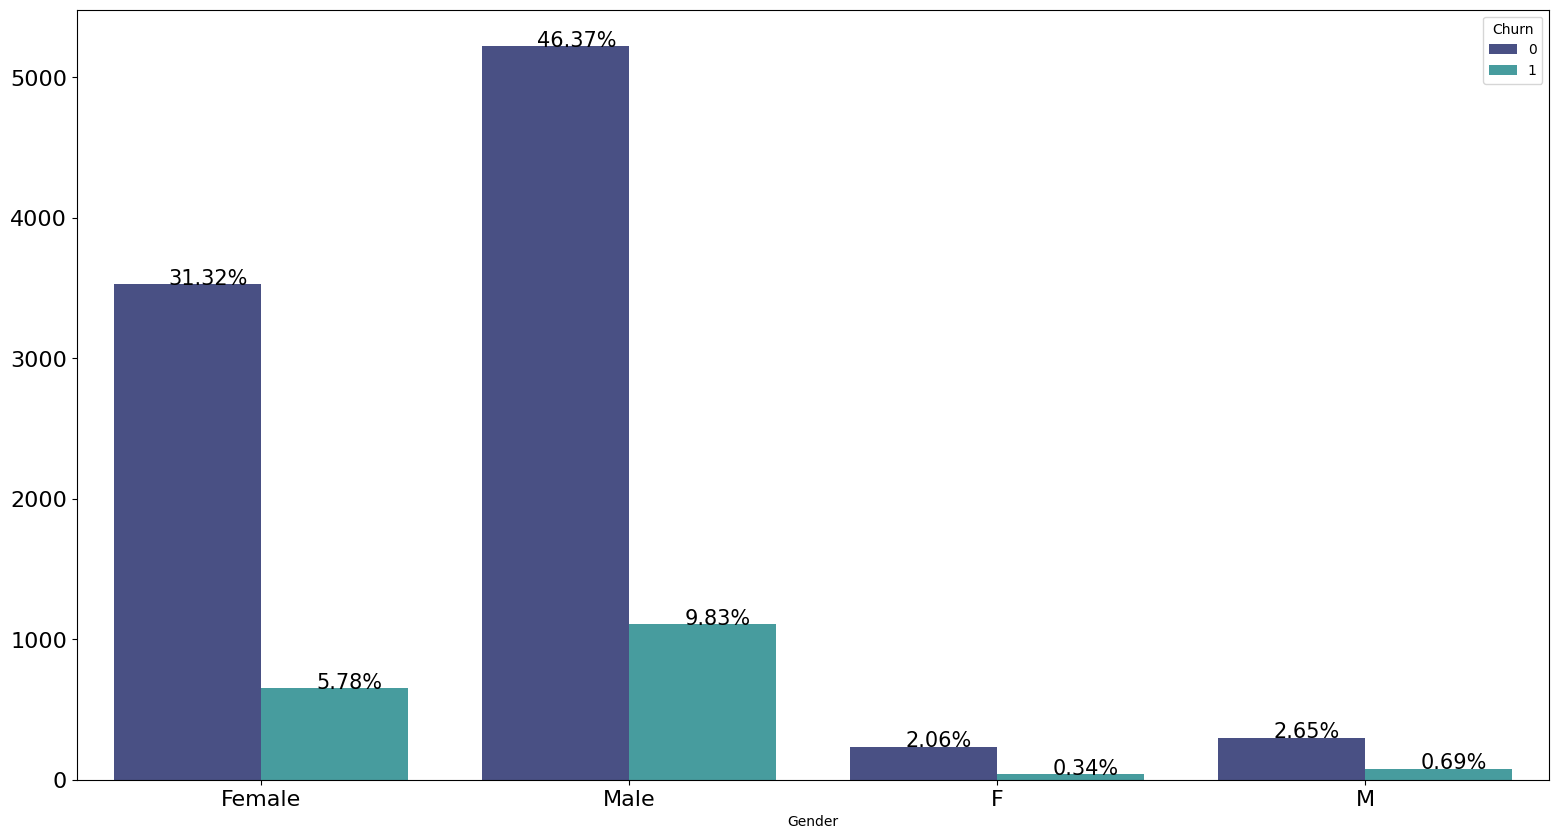

In [54]:
#Plot Gender wrt Churn
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='Gender', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Observations On Gender wrt Churn

- The category labelled as F will be cast as Female.

- The category labelled M will be cast as Male.

- The data is imbalanced with 59.54% Male majority class.

- A total of 15.49% of accounts categorized as Female churned.

- A total of 17.67% of accounts categorized as Male churned.

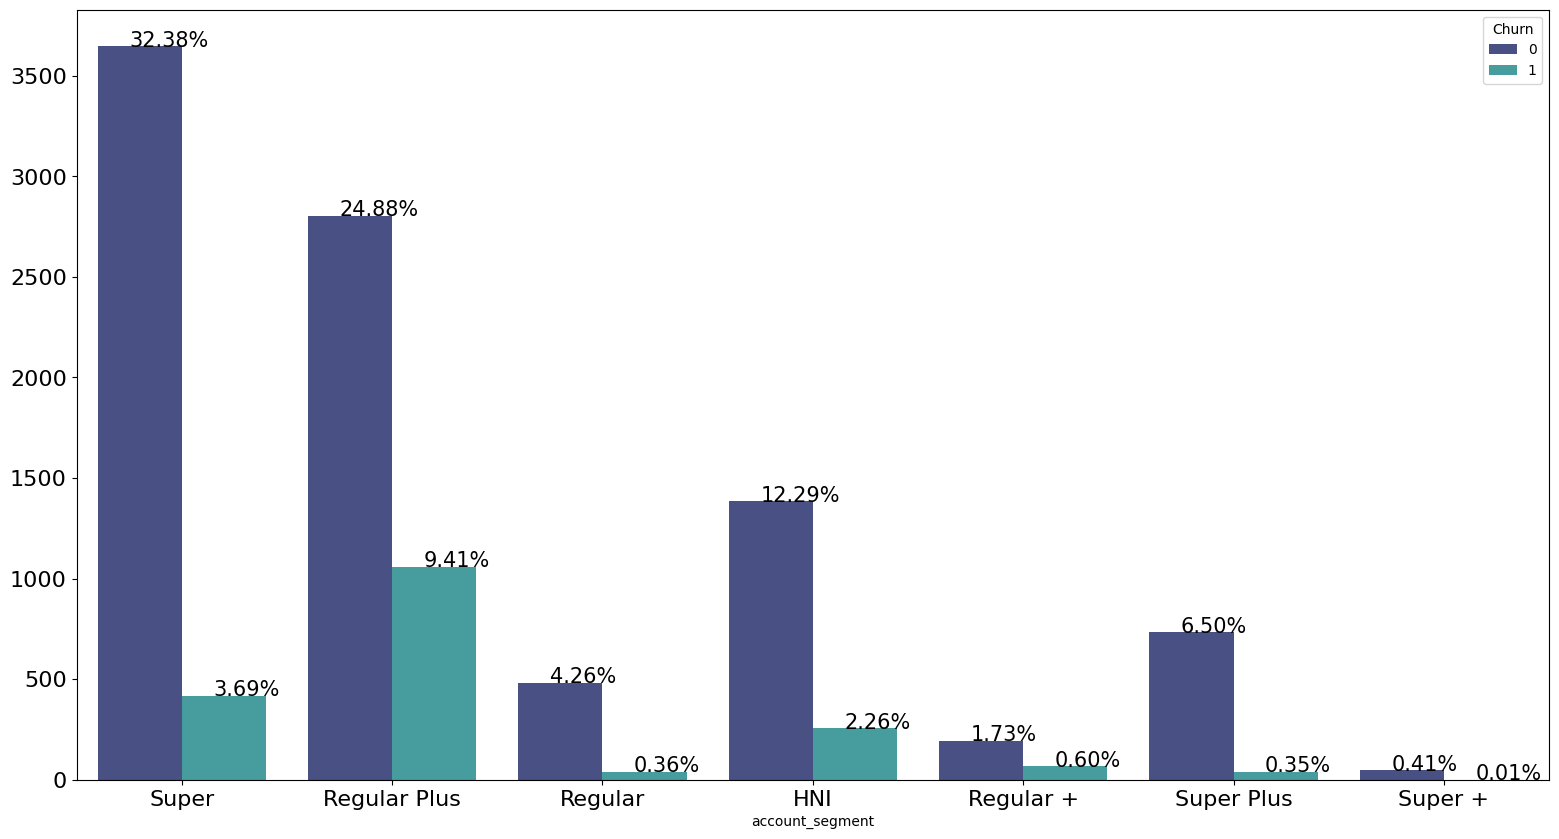

In [55]:
#Plot of account_segment wrt to Churn
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='account_segment', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Observations On Account_Segment wrt Churn

- The accounts labelled Regular + will be labelled as Regular Plus.

- The accounts labelled Super + will be labelled Super Plus.

- Regular Plus is the majority class (36.62%) followed by Super (36.07%).

- A total of 10.23% of Super accounts churned.

- A total of 27.33% of Regular Plus accounts churned.

- A total of 7.79% of Regular accounts churned.

- A total of 15.53% of HNI accounts churned.

- A total of 4.95% of Super Plus accounts churned.


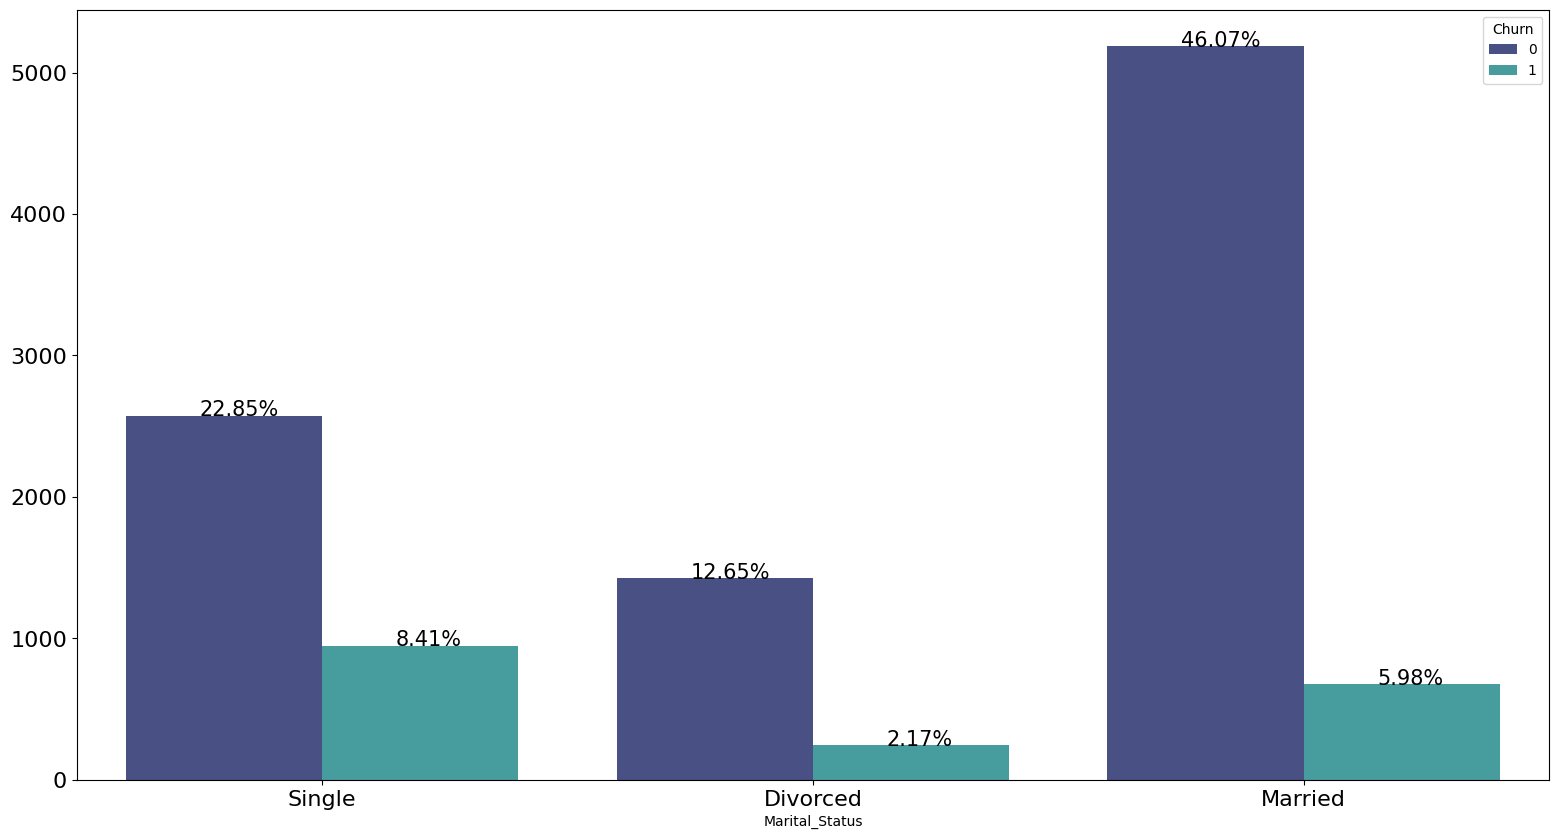

In [56]:
#Plot of Marital_Status wrt Churn
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='Marital_Status', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Observations On Marital_Status wrt Churn

- The data is imbalanced with Married being the majority class (52.05%).

- Accounts with the primary account customer with single status is 2.34 times more likely to churn than accounts where the       primary account holder is of married status.

- A total of 26.90% of Single accounts churned.

- A total of 14.64 of Divorced accounts churned.

- A total of 11.49% of Married accounts churned.


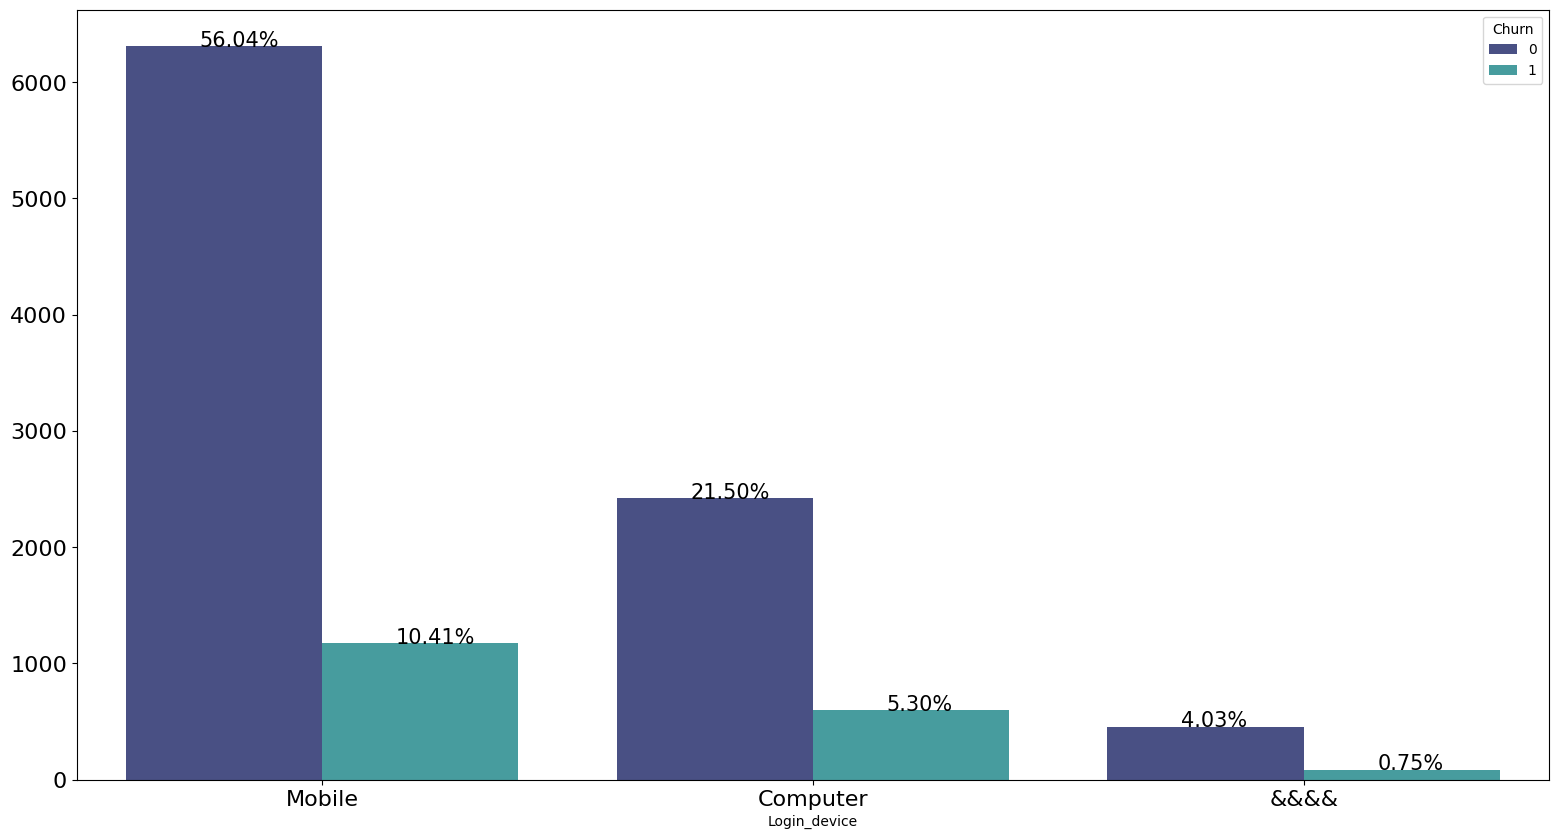

In [57]:
#Plot of Login_device wrt to Churn
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='Login_device', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Observations On Login_device wrt Churn

- The Login_device labelled &&&& is not valid and will be imputed to either Mobile of Computer as appropriate.

- This data is imbalanced as Mobile is the majority class (66.45%).

- A total of 15.67% of accounts for Mobile Login_device churned.

- A total of 19.78% of accounts for Computer Login_device churned.

- A total of 15.69% of accounts labelled for &&&& Login_device churned.


City_Tier         1.0  2.0   3.0    All
account_segment                        
All              7206  477  3368  11051
Regular Plus     3047  240   537   3824
Super            2109   93  1817   4019
Regular           363   51    99    513
HNI               956   47   619   1622
Super Plus        499   27   238    764
Regular +         203   18    41    262
Super +            29    1    17     47
------------------------------------------------------------------------------------------------------------------------


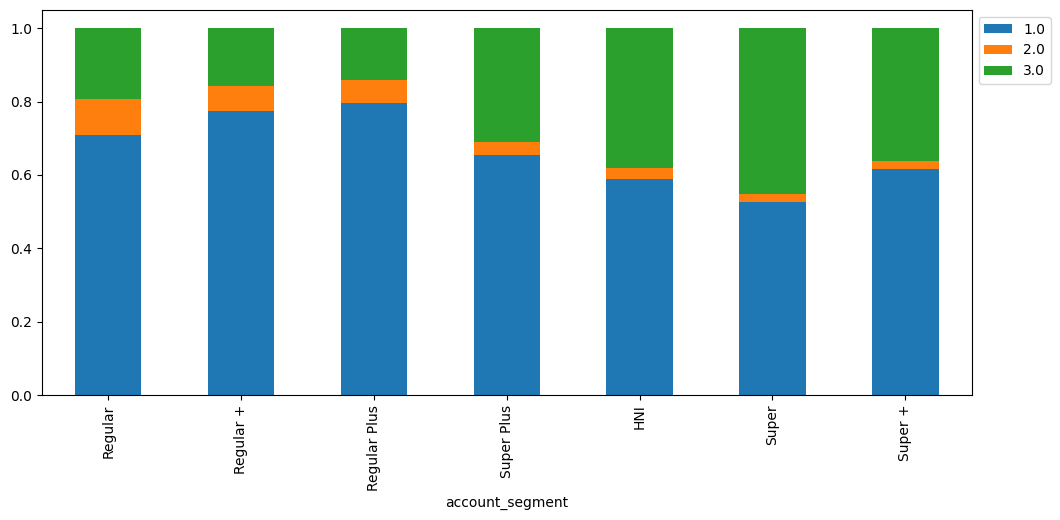

In [58]:
#Plot stacked barplot for account_segment wrt City_Tier
stacked_barplot(churn, "account_segment", "City_Tier")

#### Observations On account_segment wrt City_Tier

- Regular + will be cast to Regular Plus in data pre-processing.

- Super + will be cast to Super Plus in data pre-processing.

- A total of 79.54% of Regular Plus accounts are in City_Tier 1.0, 6.31% in City_Tier 2.0, and 14.14% in City_Tier 3.0.

- A total of 52.48% of Super accounts are in City_Tier 1.0, 2.31% are in City_Tier 2.0, and 45.21% in City_Tier 3.0

- A total of 70.76% of Regular accounts are in City_Tier 1.0, 9.94% in City_Tier 2.0, and 19.30% in City_Tier 3.0.

- A total of 58.93% of HNI accounts are in City_Tier 1.0, 2.90% are in City_Tier 2.0, and 38.16% are in City_Tier 3.0.

- A total of 64.12% of Super Plus accounts are in City_Tier 1.0, 3.45% are in City_Tier 2.0 and 31.44% are in City_Tier 3.0.

- A total of 65.21% of accounts are in City_Tier 1.0, 4.32% are in City_Tier 2.0, and 30.48% in City_Tier 3.0.


Gender             F  Female    M  Male    All
account_segment                               
All              270    4148  376  6261  11055
Super            106    1551  151  2215   4023
Regular Plus      85    1313  134  2290   3822
HNI               37     664   57   869   1627
Super Plus        31     334   17   377    759
Regular           11     158   17   329    515
Regular +          0     105    0   157    262
Super +            0      23    0    24     47
------------------------------------------------------------------------------------------------------------------------


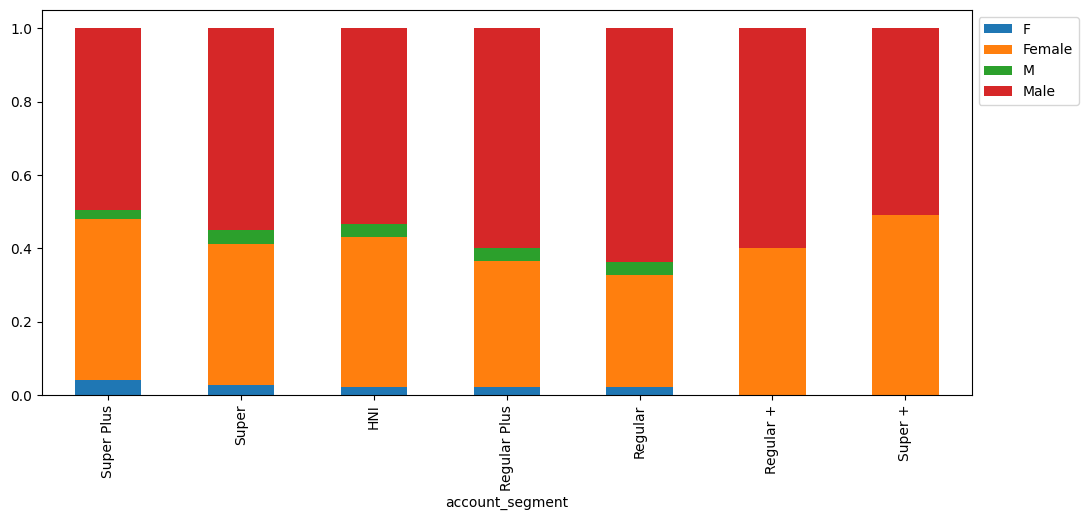

In [59]:
#Plot stacked barplot for account_segment wrt Gender
stacked_barplot(churn, "account_segment", "Gender")

#### Observations of account_segment wrt to Gender

- Gender F will be cast to Female in data pre-processing.

- Gender M will be cast to Male in data pre-processing.

- Regular + will be cast to Regular Plus in data pre-processing.

- Super + will be cast to Super Plus in data pre-processing.

- The demographics of Super accounts is 41.19% Female and 58.81% Male.

- The demographics of Regular plus accounts is 36.80% Female and 63.20% Male.

- The demographics of HNI accounts is 43.09% Female and 56.91% Male.

- The demographics of Super Plus accounts is 48.14% Female and 51.86% Male.

- The demographics of Regular Plus accounts is 36.80% Female and 63.20% Male.


Gender       F  Female    M  Male    All
City_Tier                               
All        223    4178  311  6328  11040
1.0        130    2695  201  4163   7189
3.0         89    1342   97  1846   3374
2.0          4     141   13   319    477
------------------------------------------------------------------------------------------------------------------------


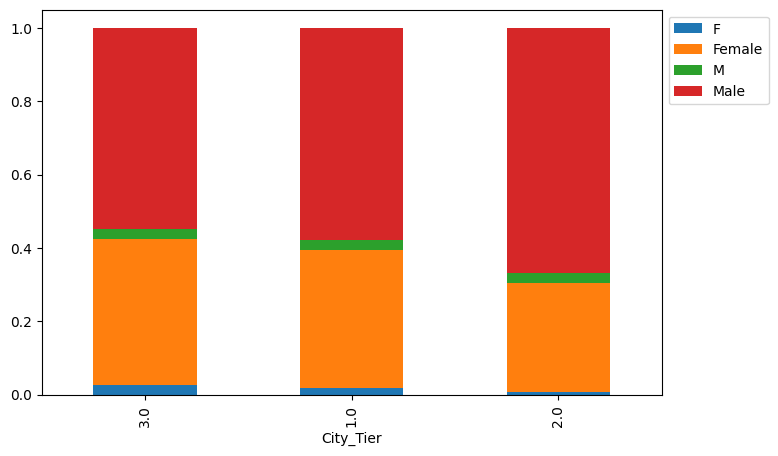

In [60]:
# Plot stacked barplot for City_Tier wrt Gender
stacked_barplot(churn, "City_Tier", "Gender")

#### Observations of City_Tier wrt to Gender

- Gender F will be cast to Female in data pre-processing.

- Gender M will be cast to Male in data pre-processing.

- The demographics of City_Tier 1.0 accounts is 39.30% Female and 60.70%% Male.

- The demographics of City_Tier 2.0 accounts is 30.40% Female and 69.60% Male.

- The demographics of City_Tier 3.0 accounts is 42.42% Female and 57.58% Male.

Login_device      &&&&  Computer  Mobile    All
Payment                                        
All                430      3018    7482  10930
Debit Card         163      1308    3019   4490
Credit Card        147       955    2344   3446
E wallet            49       277     868   1194
Cash on Delivery    41       256     698    995
UPI                 30       222     553    805
------------------------------------------------------------------------------------------------------------------------


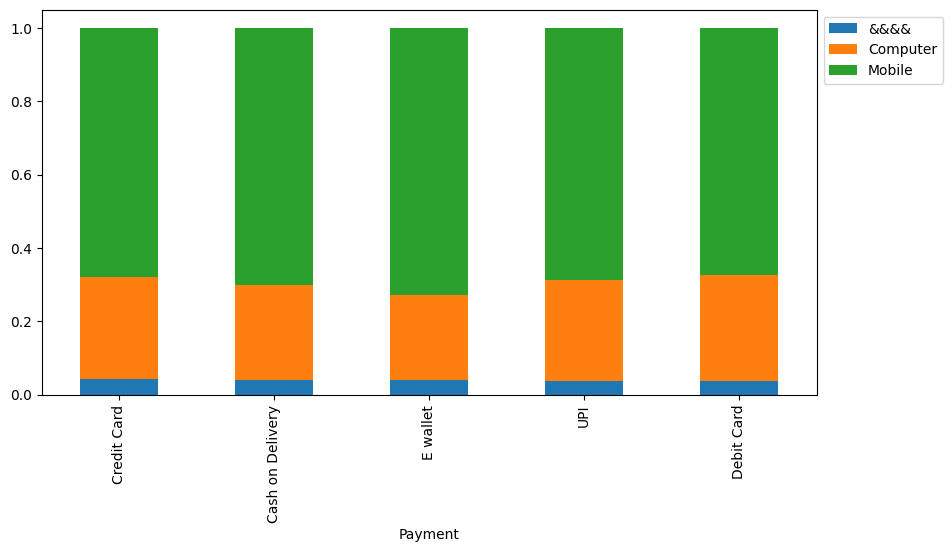

In [61]:
# Plot stacked barplot for Payment wrt Login_device
stacked_barplot(churn, "Payment" , "Login_device")

#### Observations of Payment wrt to Login_device

- The values for Login_device will be imputed to either computer or mobile.

- For computer login, debit cards were used for 43.34%, credit card 31.64%, ewallet 9.18%, cash on delivery 8.48%, UPI 7.36%

- For mobile login, debit cards were used for 40.35%, credit card 31.33%, ewallet 11.60%, cash on delivery 9.33%, UPI 7.39%


Login_device      &&&&  Computer  Mobile    All
Payment                                        
All                430      3018    7482  10930
Debit Card         163      1308    3019   4490
Credit Card        147       955    2344   3446
E wallet            49       277     868   1194
Cash on Delivery    41       256     698    995
UPI                 30       222     553    805
------------------------------------------------------------------------------------------------------------------------


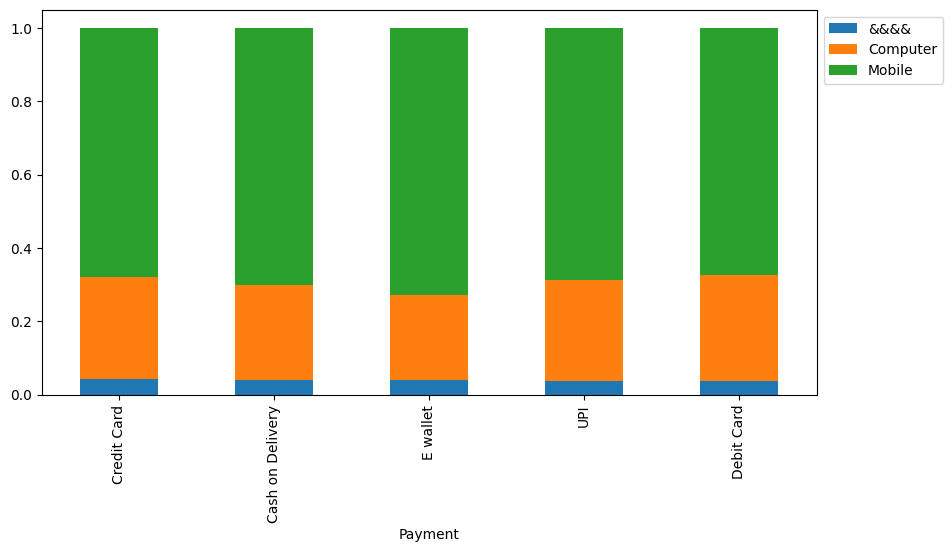

In [62]:
# Plot stacked barplot of Payment wrt Login_device
stacked_barplot(churn, "Payment", "Login_device")

#### Observations On payment wrt login_device¶

- The value for login_device labelled as &&&& will be inferred in a later step.
- For mobile Login_device payments debit cards were used for 40.35%, credit cards were used for 31.33%, ewallet was used    
  for 11.60%, cash on delivery was used for 9.33% and UPI was used for 7.39%.
- For computer Login_device payments debit cards were used for 43.34%, credit cards were used for 31.64%, ewallet was used    
  for 9.18%, cash on delivery was used for 8.48% and UPI was used for 7.36%.

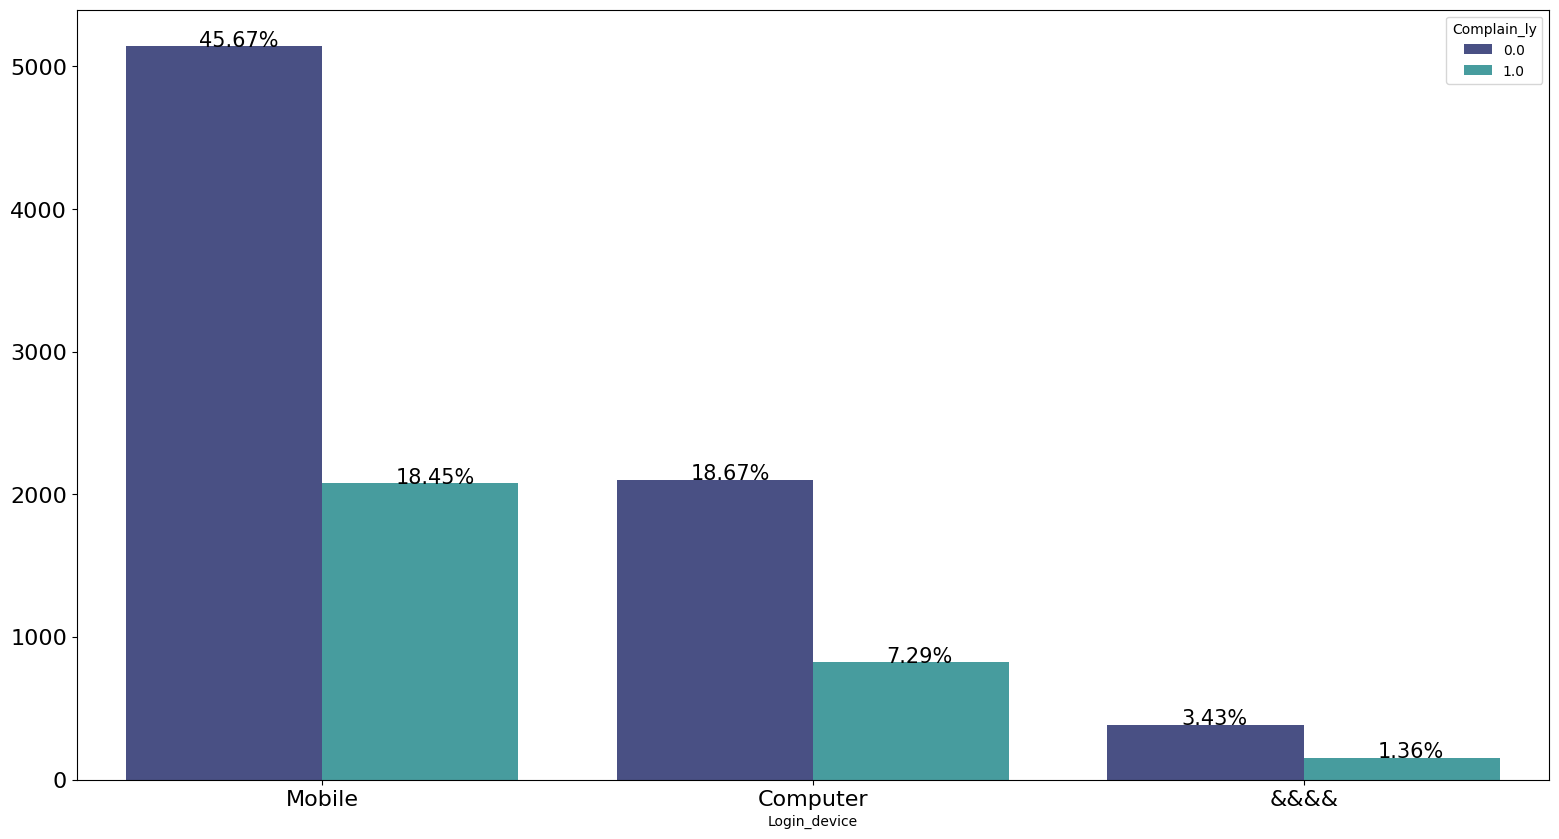

In [63]:
#Plot Login_device wrt Complain_ly
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Complain_ly", x='Login_device', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Service_Score  0.0  1.0   2.0   3.0   4.0  5.0    All
Login_device                                         
Mobile           4   40  2173  3678  1582    5   7482
All              8   76  3187  5378  2287    5  10941
&&&&             1    5   127   221    87    0    441
Computer         3   31   887  1479   618    0   3018
------------------------------------------------------------------------------------------------------------------------


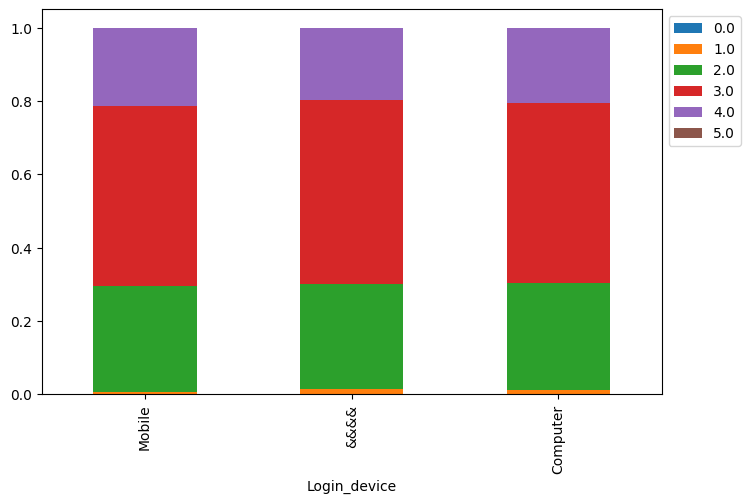

In [64]:
# Plot Stacked barplot of Login_device wrt Service_Score
stacked_barplot(churn, "Login_device", "Service_Score")

CC_Agent_Score   1.0   2.0   3.0   4.0   5.0    All
Login_device                                       
All             2254  1135  3300  2092  2142  10923
Mobile          1490   799  2158  1438  1514   7399
Computer         652   290   984   549   510   2985
&&&&             112    46   158   105   118    539
------------------------------------------------------------------------------------------------------------------------


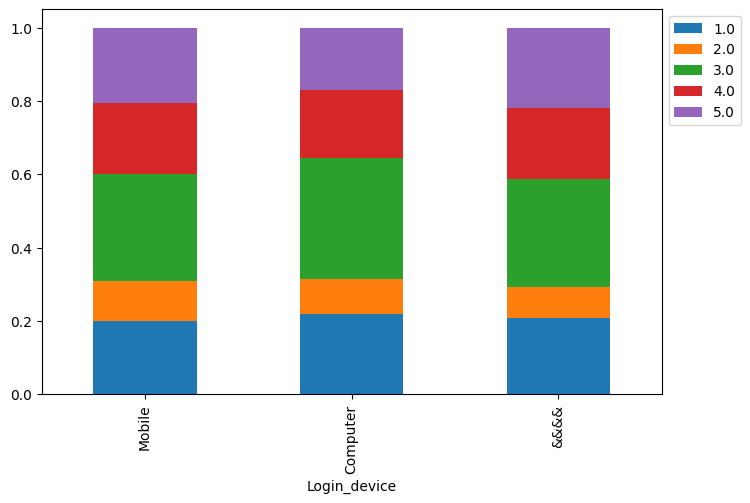

In [65]:
# Plot stacked barplot of Login_device wrt CC_Agent_Score
stacked_barplot(churn, "Login_device", "CC_Agent_Score")

Churn            0     1    All
Login_device                   
All           9185  1854  11039
Mobile        6310  1172   7482
Computer      2421   597   3018
&&&&           454    85    539
------------------------------------------------------------------------------------------------------------------------


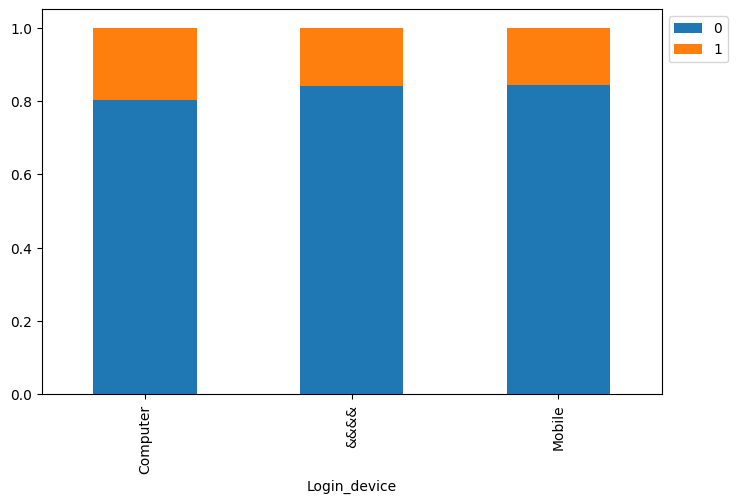

In [66]:
# Plot stacked barplot of Login_device wrt Churn
stacked_barplot(churn, "Login_device", "Churn")

### Observations

- The value labelled &&&& will be converted to NaN and will be imputed.

### Multivariate Analysis

##### Correlation Plot

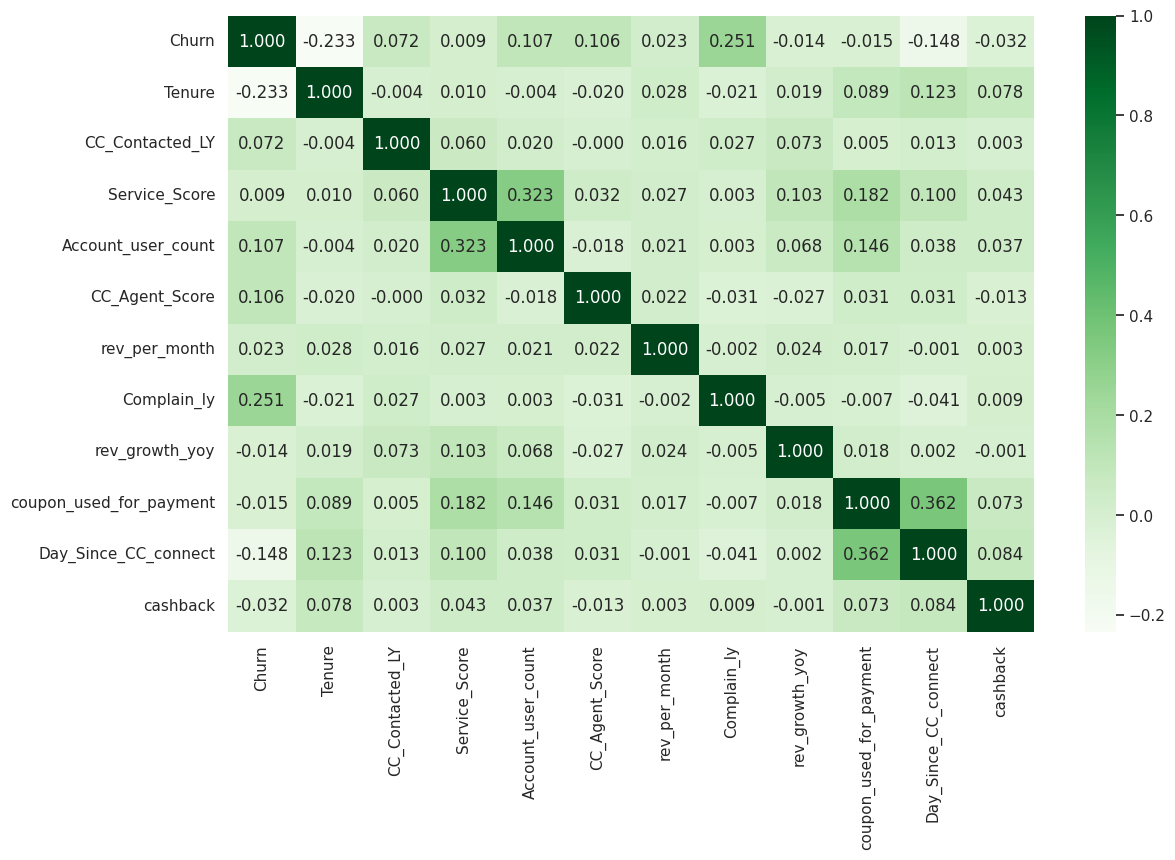

In [67]:
#Plot correlation plot
plt.figure(figsize=(13,8))
sns.set(font_scale=1)
sns.heatmap( data = churn[["Churn", "Tenure", "CC_Contacted_LY", "Service_Score", "Account_user_count", "CC_Agent_Score", "rev_per_month", "Complain_ly", "rev_growth_yoy", "coupon_used_for_payment", "Day_Since_CC_connect", "cashback"]].corr(), cmap="Greens" ,annot=True, fmt='.3f');


#### Observations On Correlation Plot

- The variable with strongest positive correlation with Churn is Complain_ly with a 0.251 correlation. This is follwoed by
  Account_user_count with a 0.107 correlation factor.

- The variable with strongest negative correlation with Churn is Tenure, which has a -0.233 correlation. This is followed by
  Day_Since_CC_connect with a -0.148 correlation.

- Tenure and Day_Since_CC_connect have a small positive correlation of 0.123.

- CC_Contacted_LY has very small correlations with the other variables.

- Service_Score has correlations which are relatively significant when compared to the magnitude of other correlations
  identified in this plot:

  There is a 0.323 correlation between Service_Score and Account_user_count
  There is a 0.182 correlation between Service_Score and coupon_used_for_payment
  There is a 0.103 correlation between Service_Score and rev_growth_yoy
  There is a 0.100 correlation between Service_Score and Day_Since_CC_connect

- The strongest correlation for Account_user_count is the 0.146 positive correlation with coupon_used_for_payment.

- The strongest correlation for CC_Agent_Score  is the 0.106 positive correlation with Churn.

- The rev_per_month  has very small correlations with the other variables. The absolute value of all correlations is < 0.03.

- The strongest correlation for Complain_ly  is the 0.251 positive correlation with Churn. For all other variables, the absolute   value of the correlations is < 0.05.

- The rev_growth_yoy  has very small correlations with the other variables. The most significant correlations are a 0.073
  positive correlation with CC_Contacted_LY and a 0.068 positive correlation with Account_user_count.

- The 0.362 positive correlation between coupon_used_for_payment and the Day_Since_CC_connect varible is the strongest
  correlation identified in the plot.
  
- The strongest correlation for Day_Since_CC_connect is the 0.362 correlation with coupon_used_for_payment. This is followed by
  a -0.148 correlation with Churn and a positive 0.123 correlation with Tenure.

- There are no strong correlations for the cashback variables. There is a 0.084 positive correlation with Day_Since_CC_connect,
  a 0.078 positive correlation with Tenure, and 0.073 positive correlation with coupon_used_for_payment.


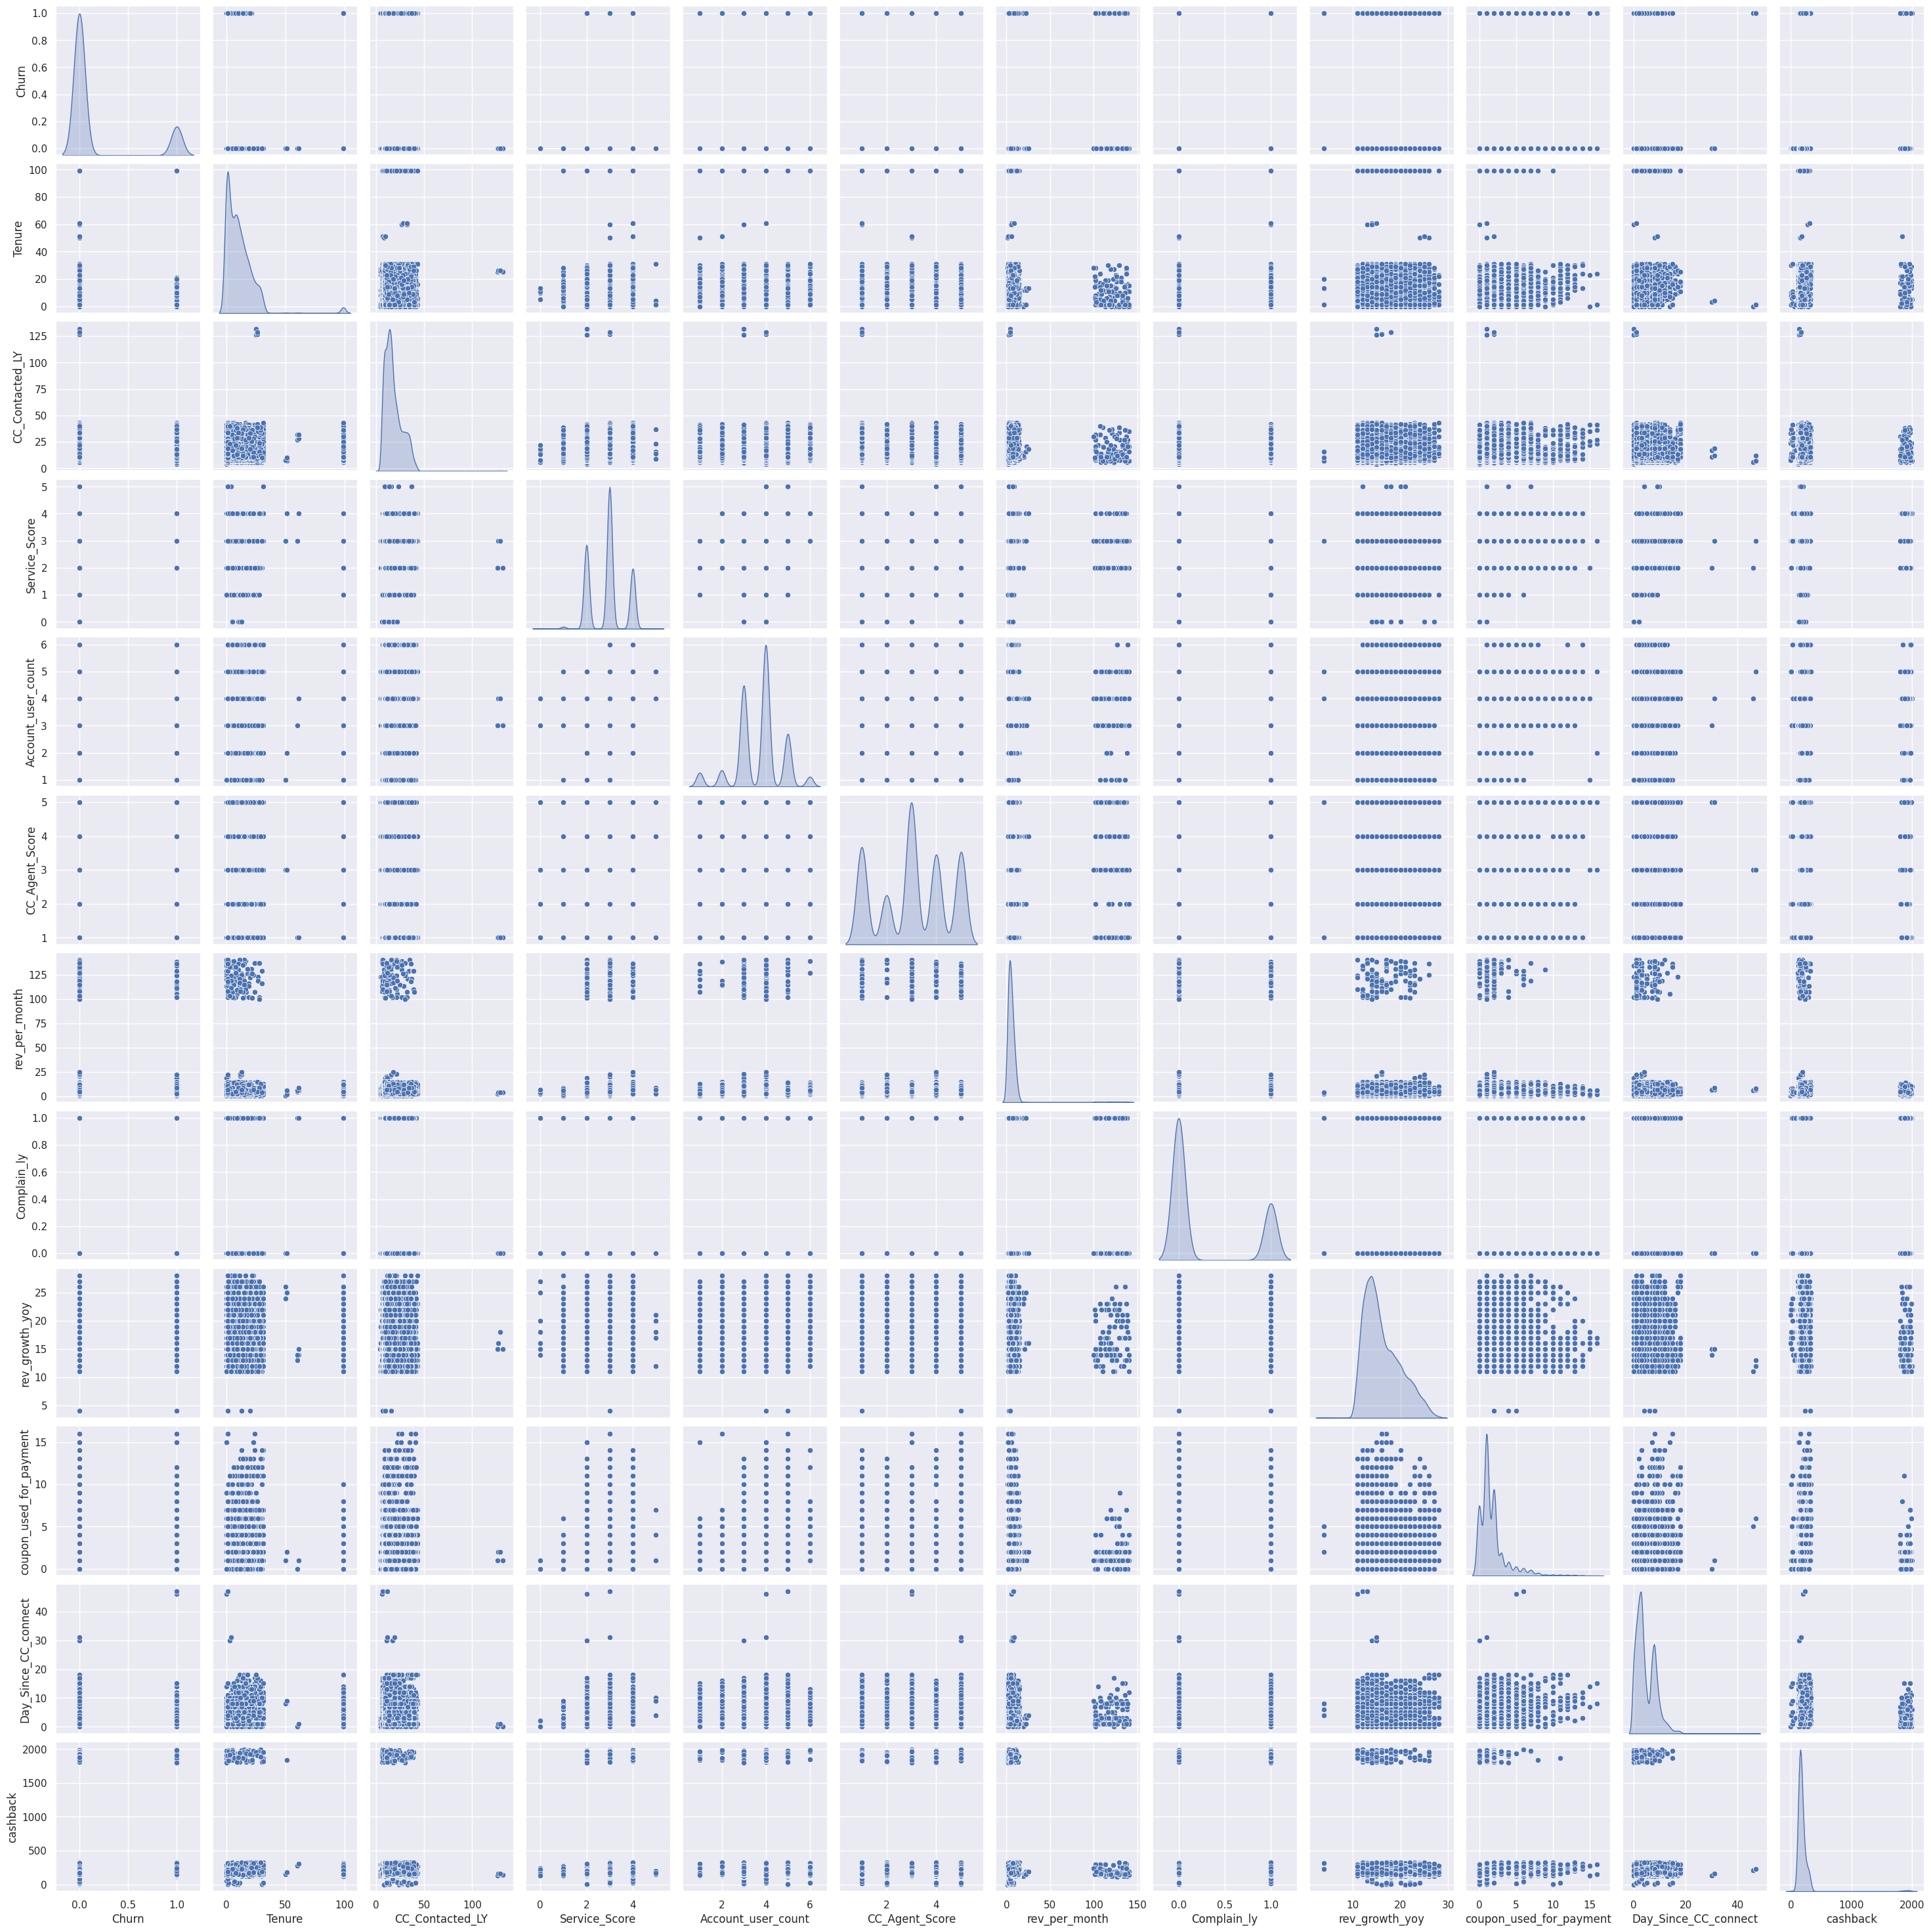

In [68]:
#Plot pairplot
sns.pairplot( data = churn[["Churn", "Tenure", "CC_Contacted_LY", "Service_Score", "Account_user_count", "CC_Agent_Score", "rev_per_month", "Complain_ly", "rev_growth_yoy", "coupon_used_for_payment", "Day_Since_CC_connect", "cashback"]] , diag_kind = "kde")


#### Observations On Pairplot

- The Service_Score for accounts that churned ranged between 2 - 4 while the Service_Score for accounts which did not churn
  ranged from 0 -5.  Customers who provided a Service_Score rating of 5 did not churn.

- Accounts with a shorter Tenure have a greater propensity to churn and for comparatively greater value for CC_Contacted_LY.
  The relatively low retention of customers past 16 months reduces the confidence in correlations between Tenure and other
  variables.

- There is a very high churn after a Tenure of 31 months with only a very small percentage of accounts remaining active.

- The accounts which remain active after a Tenure of 31 months have a relatively low rev_per_month value. These cusomers may be
  very cost conscious.

- Account_user_count does not have have an apparent relationship with Churn.

- CC_Agent_Score does not have have an apparent relationship with Churn.

- All accounts with Day_SInce_CC_connect greater than 35 churned.

- Accounts with a CC_Contacted_LY value greater than 50 did not churn.

- There were some accounts with a cashback value greater than 1500 but these were all accounts with a Tenure of 50 months or
  less.


#### Customer care Contacted vs Service score wrt Complaints with in a year

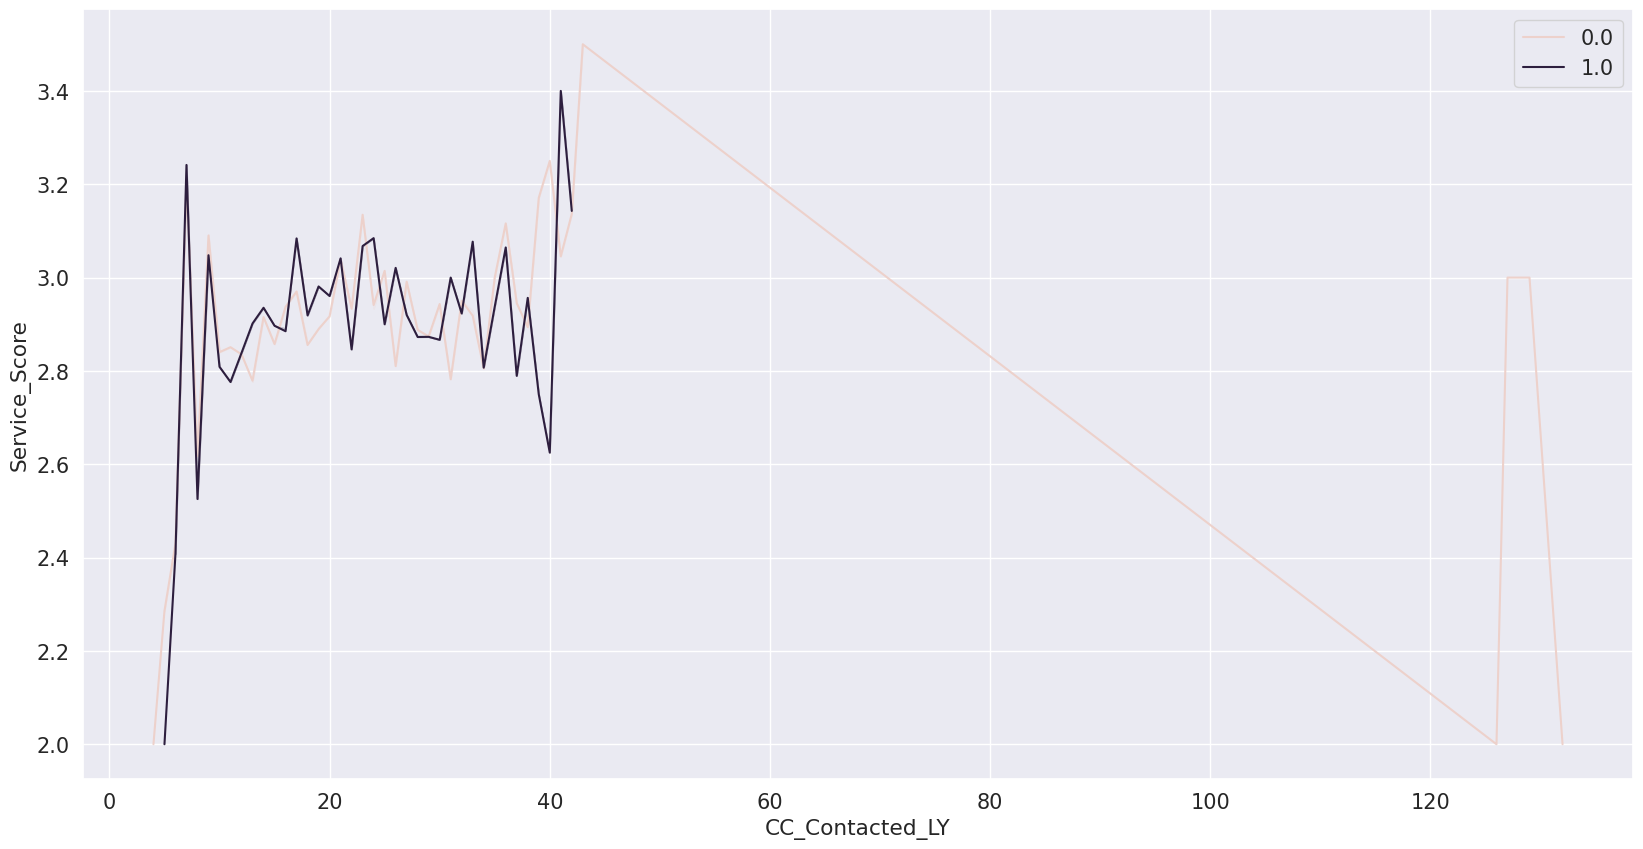

In [69]:
# Set the "colorblind" palette for better accessibility
sns.set_palette("colorblind")

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.3)
sns.lineplot(y="Service_Score", x="CC_Contacted_LY", ci=0, data=churn, hue='Complain_ly')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)  # Add legend with larger font size
plt.show()


#### Observations On Customer care Contacted vs Service score wrt Complaints with in a year

- Accounts with complaints in the last year submitted a service score ranging from 2.00 to 3.40 and CC_Contacted_LY ranged from ~5 to ~42.

- Accounts with no complaints in the last year submitted service scores ranging between 2.00 to 3.50 and CC_Contacted _LY ranged from ~ 5 to ~ 130.



#### Customer care Contacted vs Service score wrt Churn

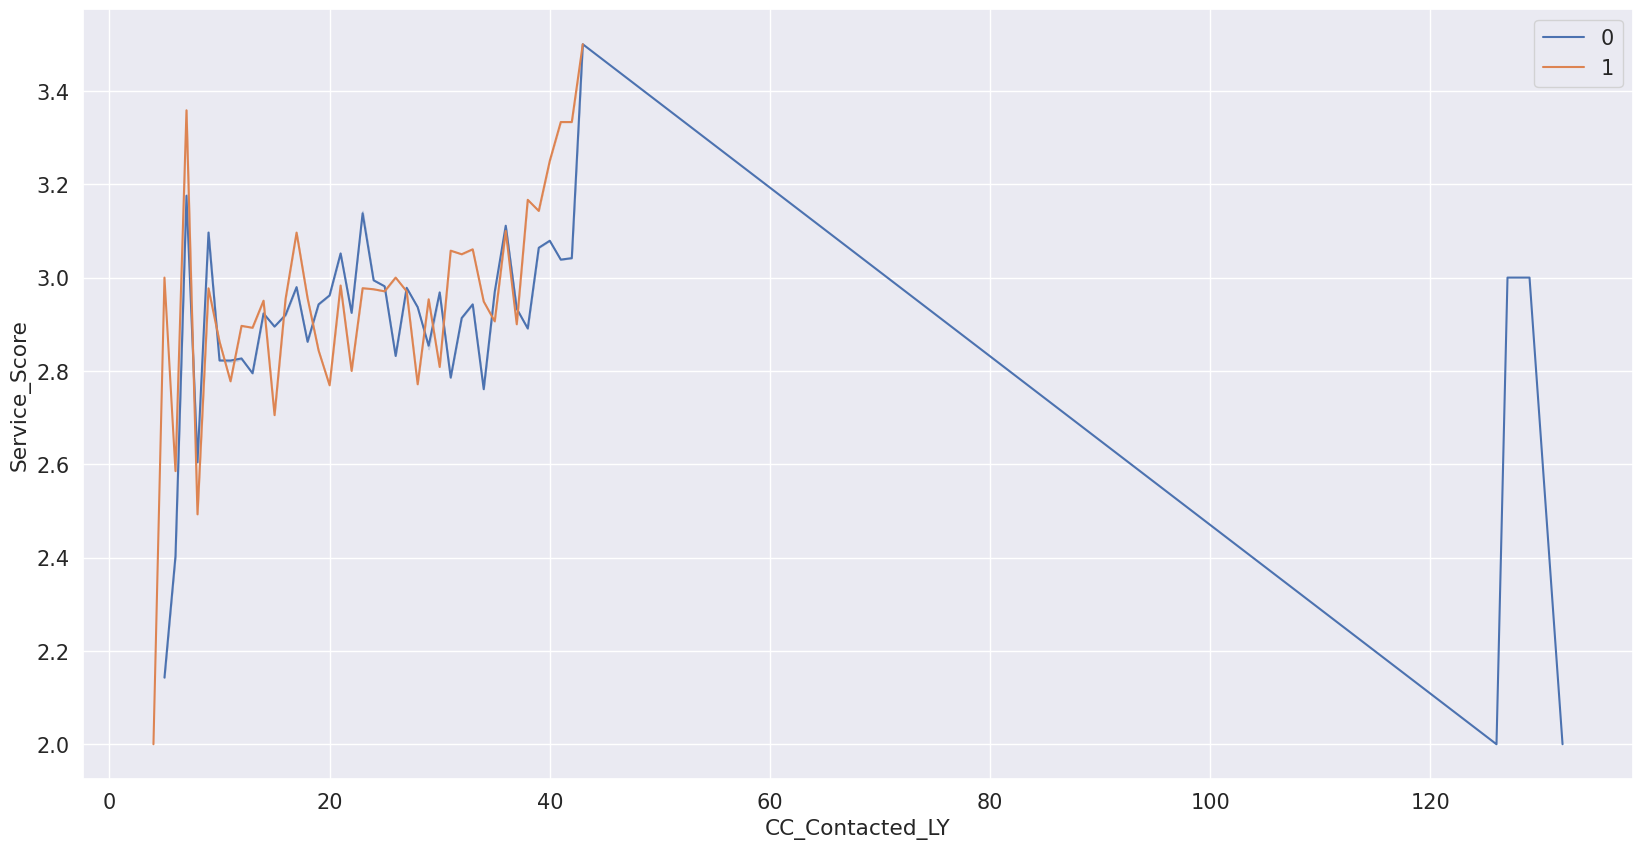

In [70]:
# Set the "colorblind" palette for better accessibility
sns.set_palette("colorblind")

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.3)
sns.lineplot(y="Service_Score", x="CC_Contacted_LY", ci=0, data=churn, hue='Churn')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)  # Add legend with larger font size
plt.show()


#### Observations On Customer care Contacted vs Service score wrt Churn

- Those with a CC_Contacted_LY value greater than ~42 did not churn.
- CC_Contacted_LY ranged up to a value of ~130 for accounts which did not churn.
- For those who did not churn and had a CC_Conacted_LY value of greater than 120, the Service_Score rating ranged between 2.0
  and 3.0.  

#### Customer care Contacted vs Service score wrt Complaints with in a year

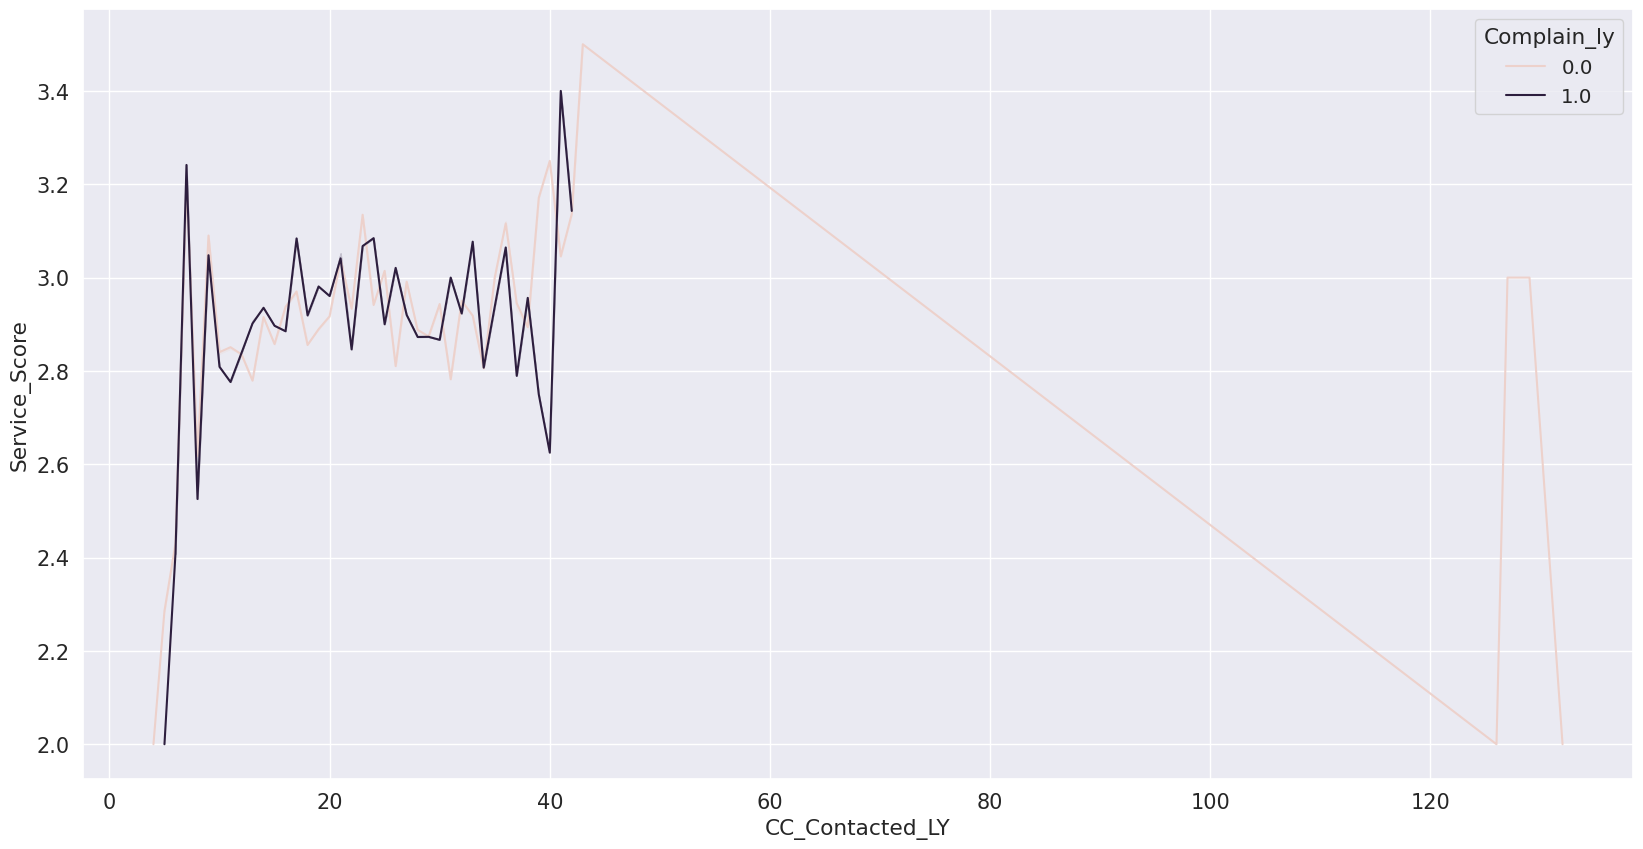

In [71]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.3)
sns.lineplot(y="Service_Score", x="CC_Contacted_LY", ci=0, data=churn, hue='Complain_ly')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations

- The times when all the customers contacted customer care to raise a complaint, the satisfaction score on service provided is minimum 2 and maximum is 3.4, and contacted customer care with in a year ranges between ~5 to ~40 times.

- The times when all the customers contacted customer care to not raise a complaint, the satisfaction score on service provided is minimum 2 and the maximum 3.5, contacted customer care with in a year ranges range between ~5 to ~130 times.

- The most common times when all the customers contacted customer care for raising & not raising complaint is between to ~15 to ~40 times with a satisfaction score on service provided between to ~2.8 to ~3.1.

### Data Pre-Processing

#### Removal of unwanted variable for further analysis

In [72]:
# Drop AccountID column
churn.drop(['AccountID'],axis=1,inplace=True)

In [73]:
churn.head()

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0        3.0              6.0   Debit Card  Female   
1      1     0.0        1.0              8.0          UPI    Male   
2      1     0.0        1.0             30.0   Debit Card    Male   
3      1     0.0        3.0             15.0   Debit Card    Male   
4      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                      1.0                   5.0    159.93       Mobile  
1                      0.0                   0.0    120.90       Mobile  
2                      0.0                   3.0       NaN       Mobile  
3                      0.0                   3.0    134.07       Mobile  
4                      1.0                   3.0    129.60       Mobile

#### Replace special characters with NaN

In [74]:
for feature in churn.columns:
    churn[feature] = churn[feature].replace('+',np.NaN).replace('#',np.NaN).replace('@',np.NaN).replace('&&&&',np.NaN).replace('$',np.NaN).replace('*',np.NaN).replace('Super +','Super Plus').replace('Regular +','Regular Plus').replace('F','Female').replace('M','Male')

#### Plot Churn wrt account_segment to generate a plot for the study report

In [75]:
# Print dataframe information
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

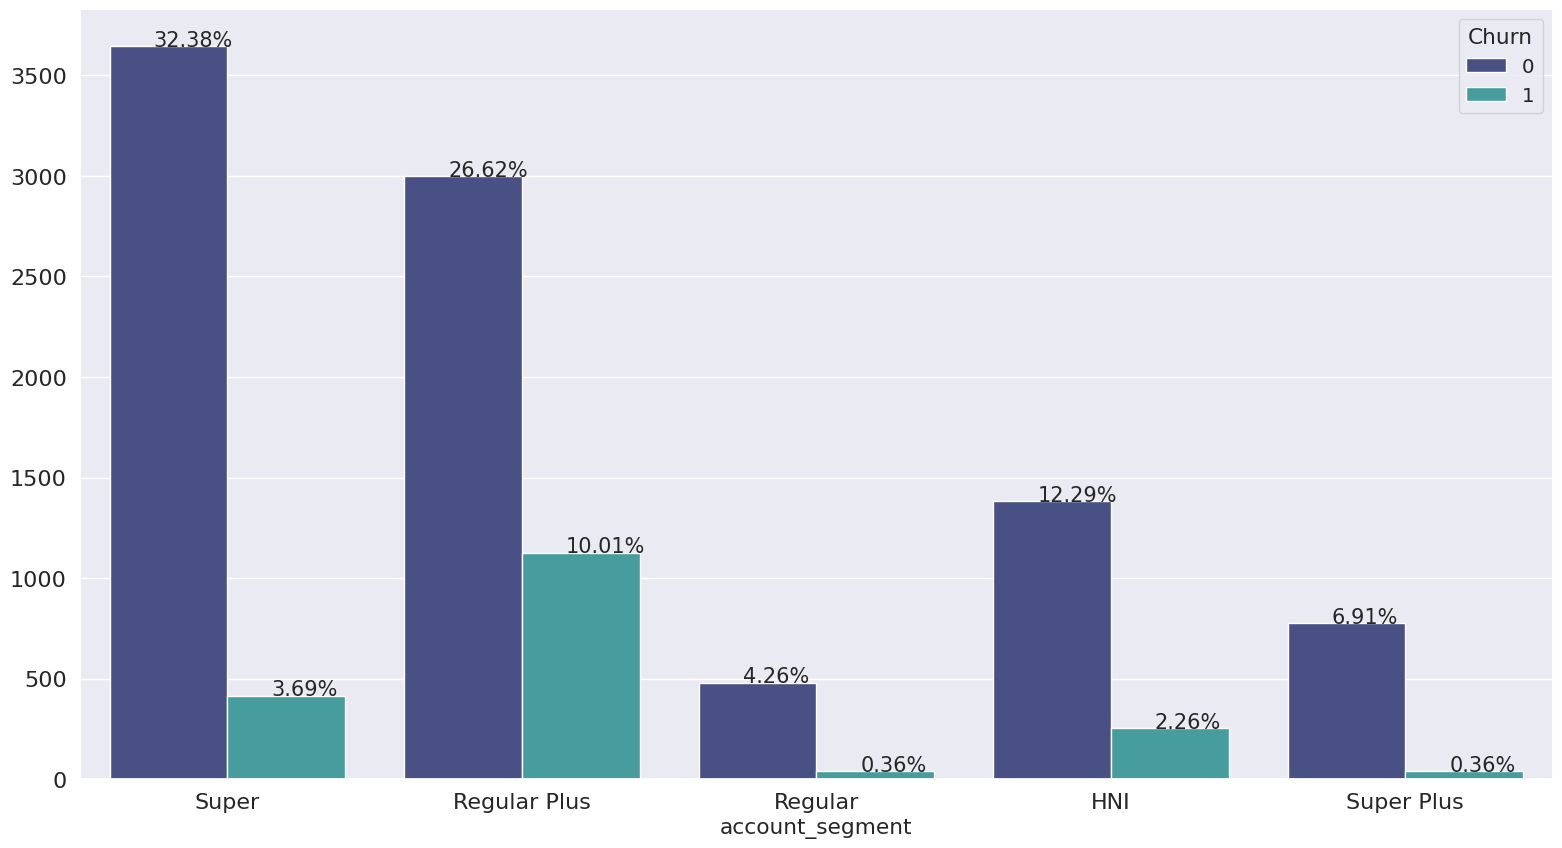

In [76]:
#Plot of account_segment wrt to Churn
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='account_segment', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Observations On Account_Segment wrt Churn

- The accounts labelled Regular + will be labelled as Regular Plus.

- The accounts labelled Super + will be labelled Super Plus.

- Regular Plus is the majority class (36.62%) followed by Super (36.07%).

- A total of 10.23% of Super accounts churned.

- A total of 27.33% of Regular Plus accounts churned.

- A total of 7.79% of Regular accounts churned.

- A total of 15.53% of HNI accounts churned.

- A total of 4.95% of Super Plus accounts churned.


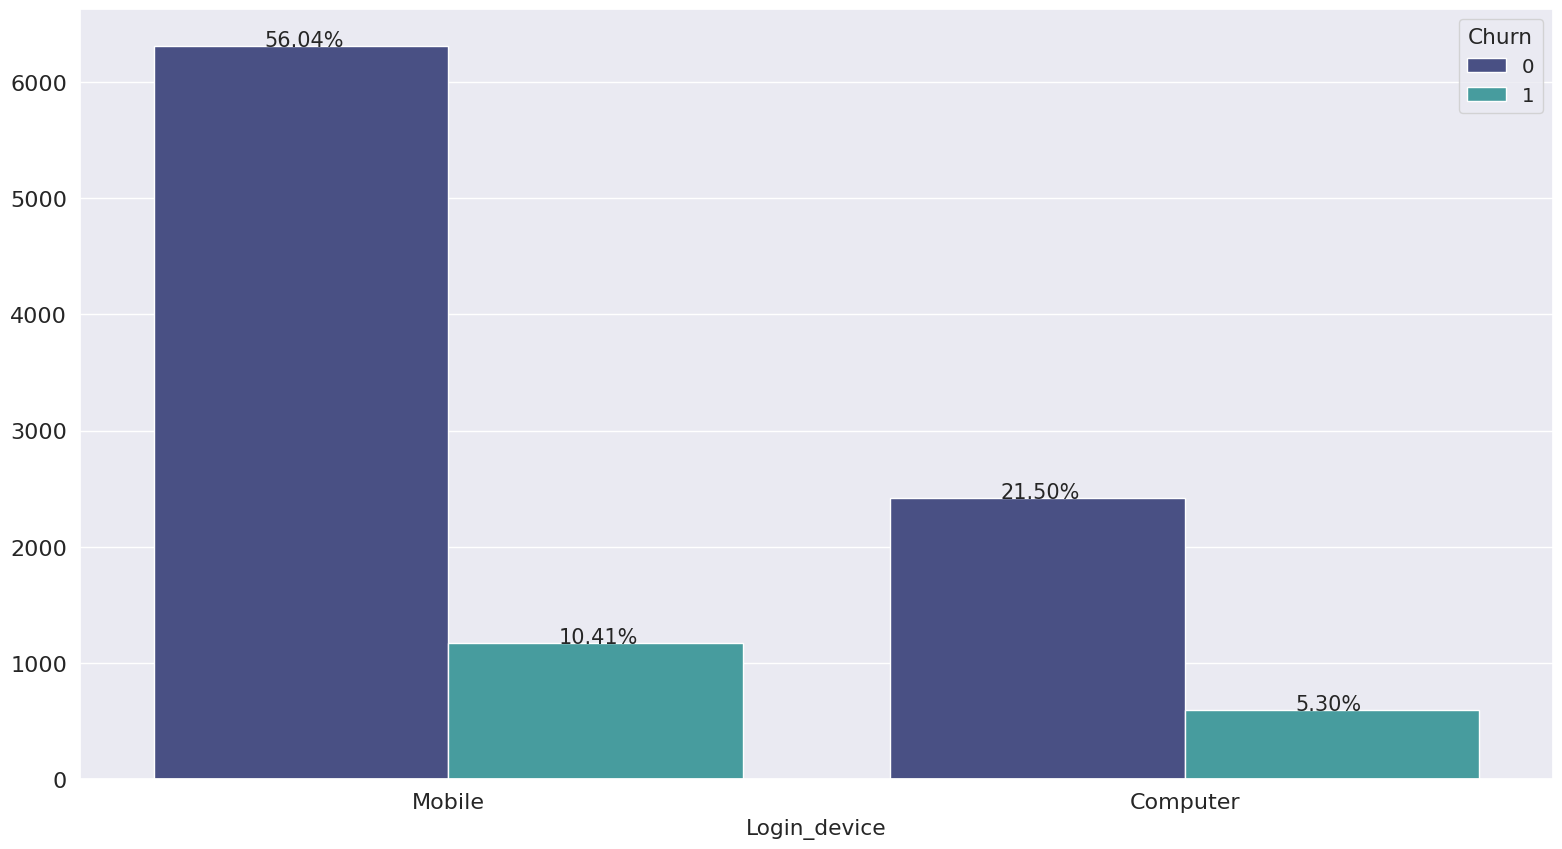

In [77]:
#Plot of Login_device wrt to Churn
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='Login_device', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Observations On Login_device wrt Churn



- This data is imbalanced as Mobile is the majority class (66.45%).

- A total of 15.67% of accounts for Mobile Login_device churned.

- A total of 19.78% of accounts for Computer Login_device churned.




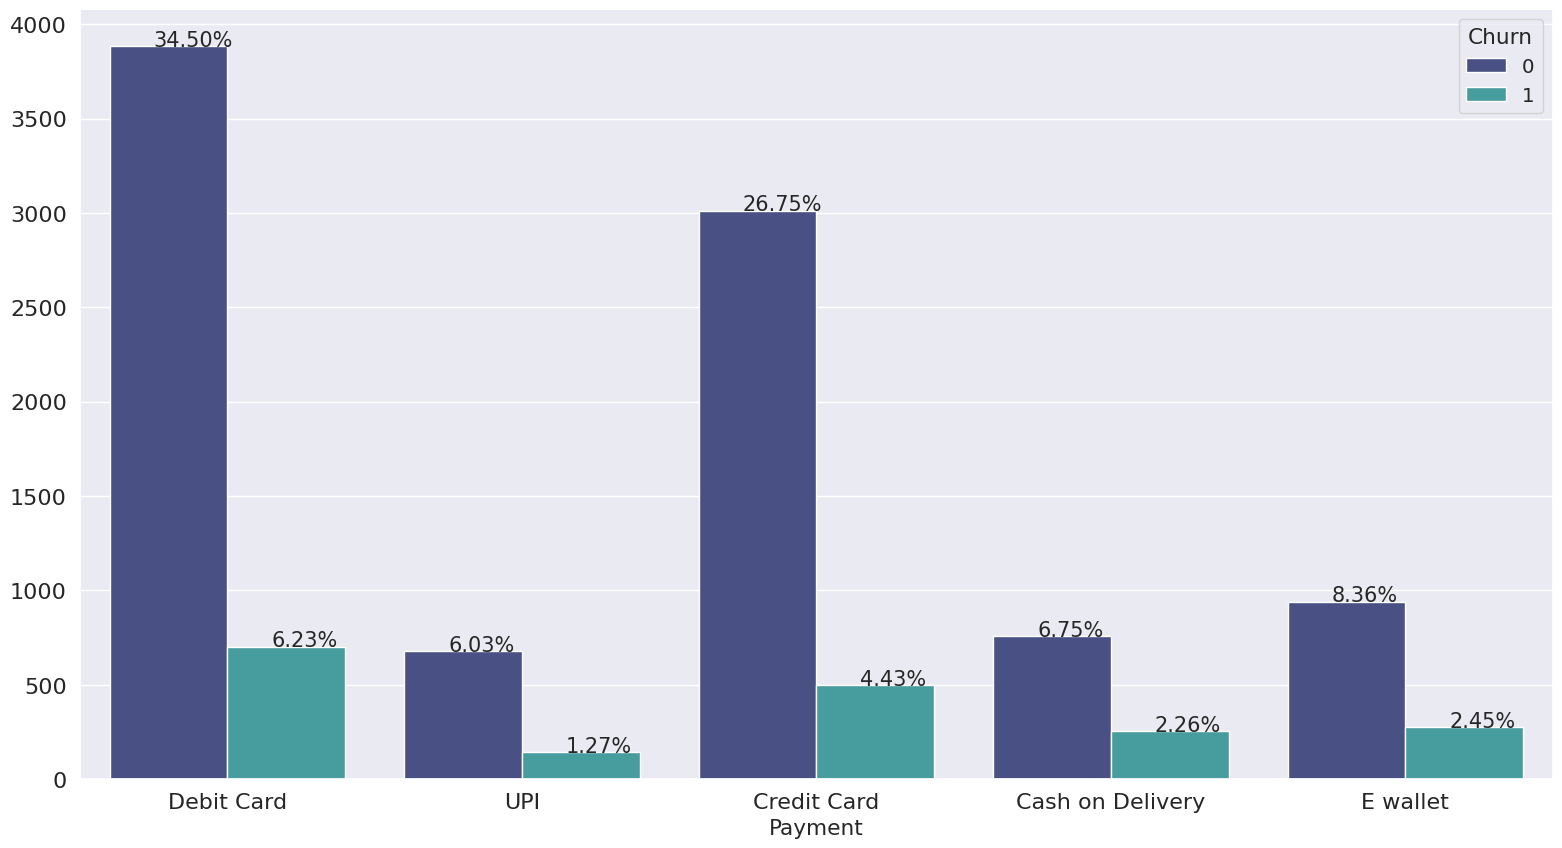

In [78]:
#Plot Payment wrt Churn
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='Payment', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


#### Observations On Payment wrt Churn

- Debit card is the most popular payment mode (40.73%) followed by credit card (31.18%).

- A total of 15.30% of accounts which used a Debit Card churned.

- A total of 17.40% of accounts which used UPI churned.

- A total of 14.21% of accounts which used a Credit Card churned.

- A total of 25.08% of accounts using cash on delivery churned.

- A total of 22.66% of accounts using E wallet churned.


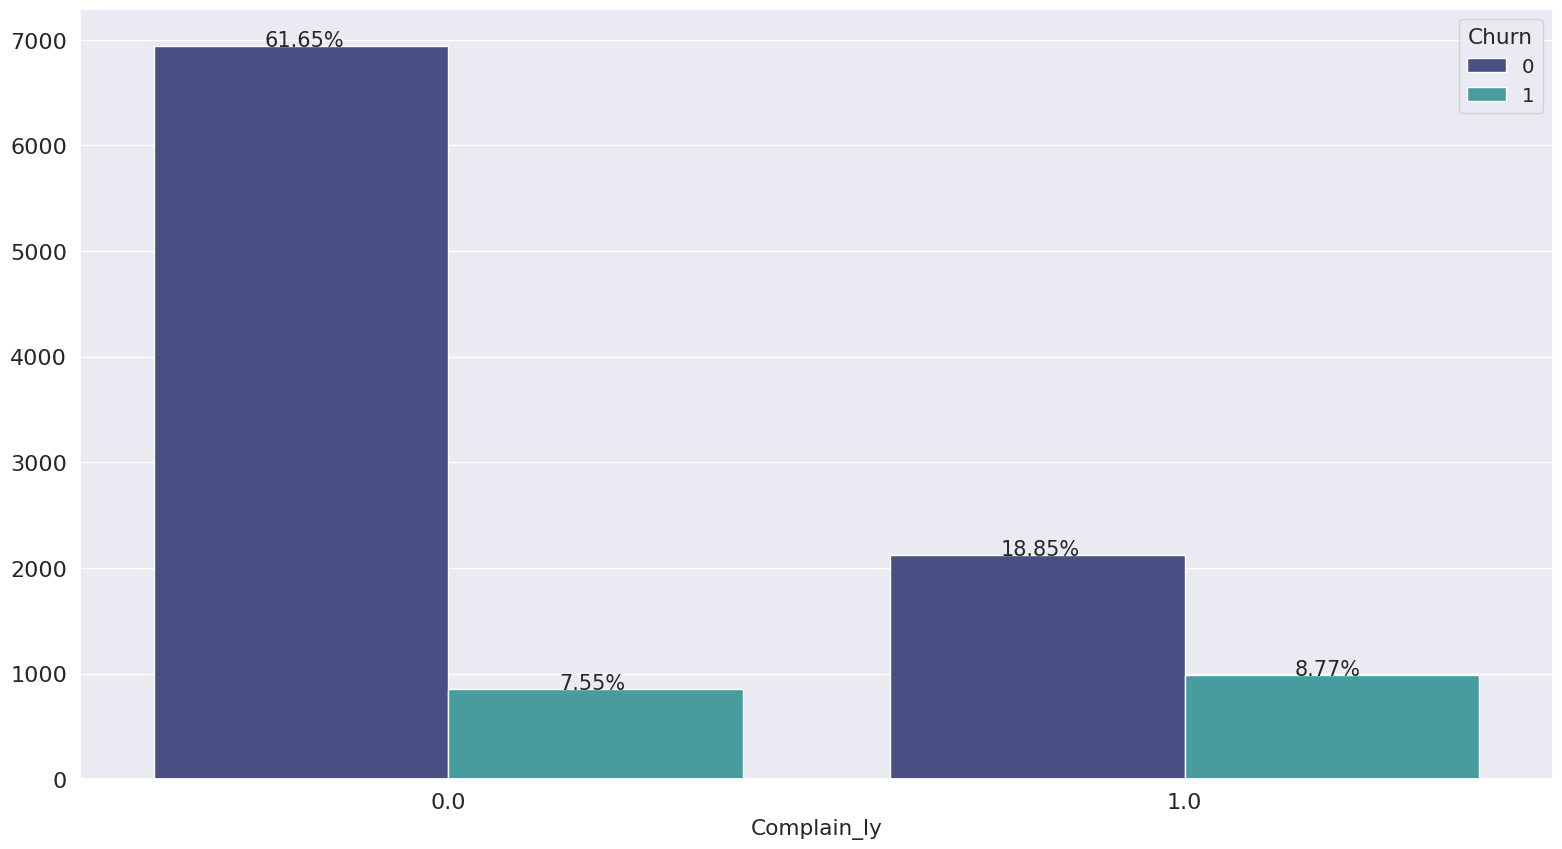

In [79]:
#Plot Complain_ly wrt Churn
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='Complain_ly', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Observations

Accounts with a complaint in the last 12 months are 2.91 times more likely to churn than accounts with no complaint registered.

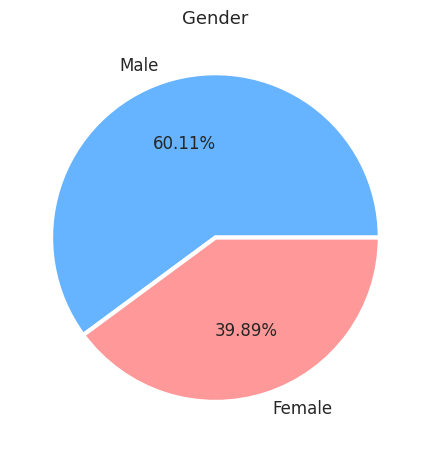

In [80]:
#Plot for Gender variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='Gender'
churn[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

The majority class for Gender is Male.

In [81]:
# Print number of unique values
churn.nunique()

Churn                         2
Tenure                       37
City_Tier                     3
CC_Contacted_LY              44
Payment                       5
Gender                        2
Service_Score                 6
Account_user_count            6
account_segment               5
CC_Agent_Score                5
Marital_Status                3
rev_per_month                58
Complain_ly                   2
rev_growth_yoy               19
coupon_used_for_payment      17
Day_Since_CC_connect         23
cashback                   5692
Login_device                  2
dtype: int64

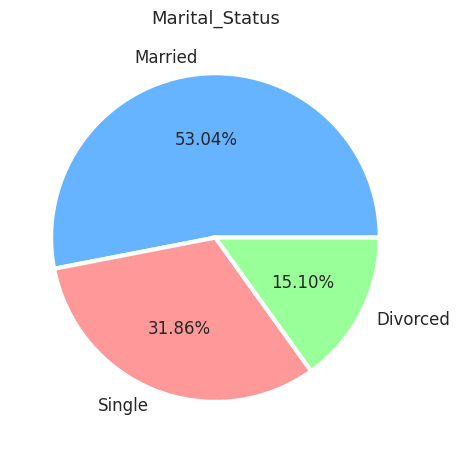

In [82]:
#Plot for Marital Status variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='Marital_Status'
churn[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

- The modal value for Marital_Status is 'married'.

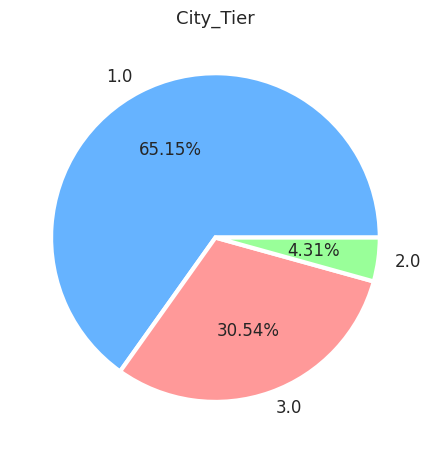

In [83]:
#Plot for City Tier variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='City_Tier'
churn[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

The modal value for City_Tier is 1.0

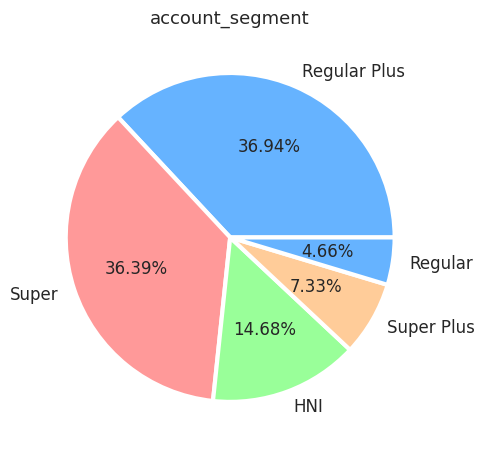

In [84]:
#Plot for account_segment variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='account_segment'
churn[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

Super and Regular Plus are the predominant values for Account_segment

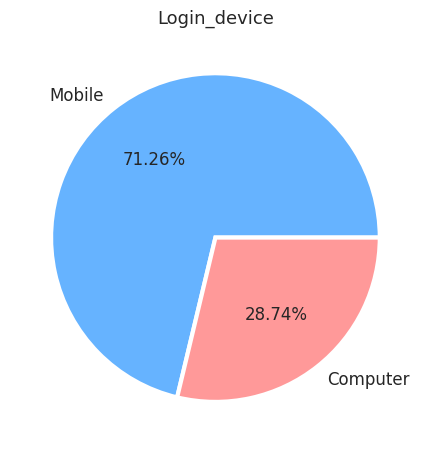

In [85]:
#Plot for Login_device variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='Login_device'
churn[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

Mobile is the modal value for Login_device

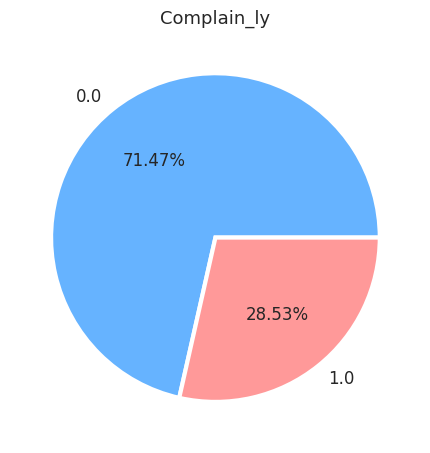

In [86]:
#Plot for Complain_ly variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='Complain_ly'
churn[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations


28.53% of accounts have submitted a complaint in the last 12 months.

#### Analyze Demographic Which Churned

In [87]:
# Filter for accounts which churned
churn_pos = churn.loc[(churn["Churn"] == 1.0)]


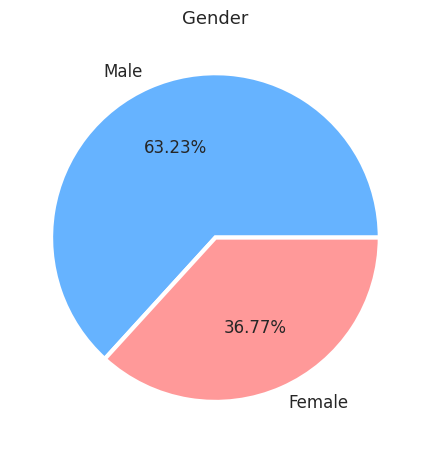

In [88]:
#Plot for Gender variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='Gender'
churn_pos[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

Male is majority value for Gender among accounts which churned.

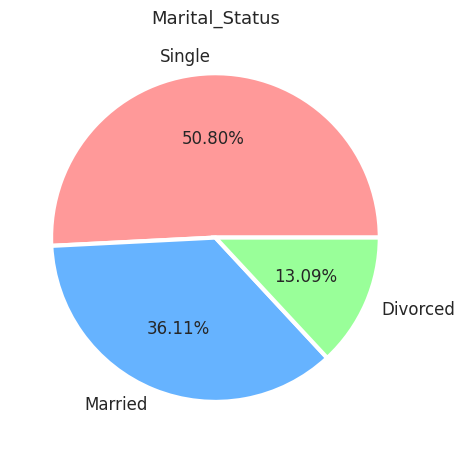

In [89]:
#Plot for Marital Status
cls = ['#ff9999', '#66b3ff','#99ff99','#ffcc99']
clmPlt ='Marital_Status'
churn_pos[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

Single is the majority value among accounts which churned.

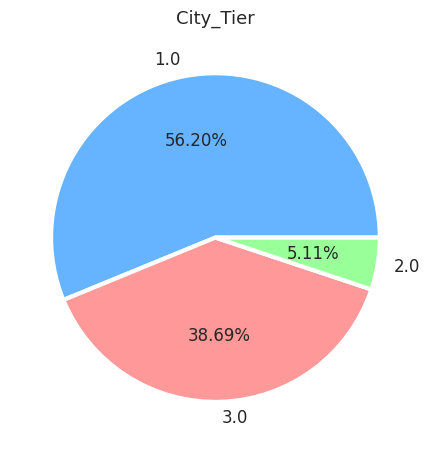

In [90]:
#Plot for City_Tier variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='City_Tier'
churn_pos[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

City_Tier 1.0 is the majority value for accounts which churned.

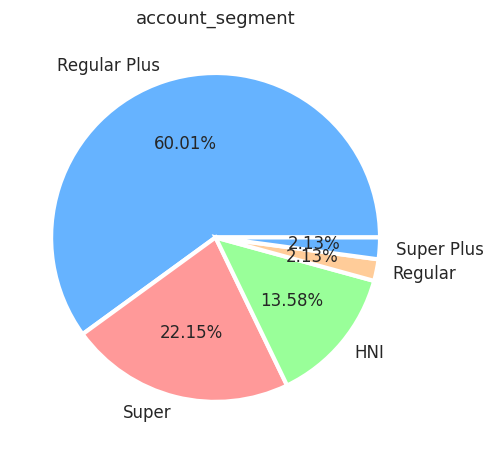

In [91]:
#Plot for account_segment variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='account_segment'
churn_pos[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

Regular Plus is the majority value for Account_segment for accounts which churned.

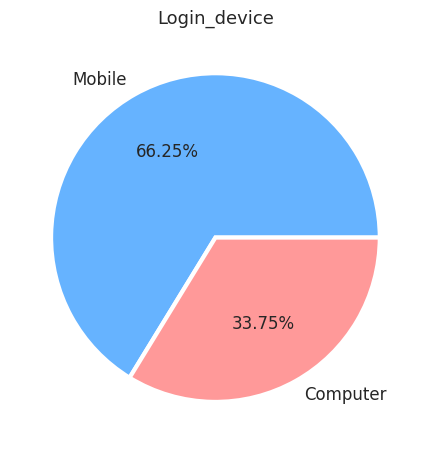

In [92]:
#Plot for Login_device variable
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='Login_device'
churn_pos[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

Mobile is the Login_device majority value for accounts which churned.

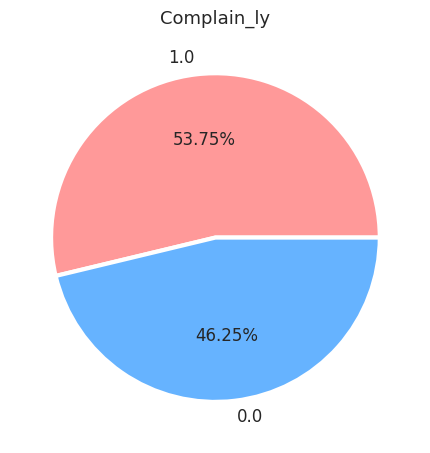

In [93]:
#Plot for Complain_ly variable
cls = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
clmPlt ='Complain_ly'
churn_pos[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


### Observations

The majority of accounts which churned submitted a complaint in the last 12 months.

#### Calculate Total Monthly Revenue From Each Account Segment

In [94]:
#Filter account segments
df_reg = churn[churn["account_segment"] == "Regular"]

In [95]:
# Filter Account_segment for Regular Plus
df_regplus = churn[churn["account_segment"] == "Regular Plus"]

In [96]:
# Filter Account_segment for Super
df_sup = churn[churn["account_segment"] == "Super"]

In [97]:
# Filter Account_segment for Super Plus
df_supplus = churn[churn["account_segment"] == "Super Plus"]

In [98]:
# Filter Account_segment for HNI
df_hni = churn[churn["account_segment"] == "HNI"]

In [99]:
# Calculate means for rev_per_month
reg_mean = df_reg['rev_per_month'].mean()
regplus_mean = df_regplus['rev_per_month'].mean()
sup_mean = df_sup['rev_per_month'].mean()
supplus_mean = df_supplus['rev_per_month'].mean()
hni_mean = df_hni['rev_per_month'].mean()


In [100]:
# Calculate means for rev_growth_yoy
reg_gro = df_reg['rev_growth_yoy'].mean()
regplus_gro = df_regplus['rev_growth_yoy'].mean()
sup_gro = df_sup['rev_growth_yoy'].mean()
supplus_gro = df_supplus['rev_growth_yoy'].mean()
hni_gro = df_hni['rev_growth_yoy'].mean()


In [101]:
# Set counts for account types from earlier analysis
reg_cnt = 520
regplus_cnt = 4124
sup_cnt = 4062
supplus_cnt = 818
hni_cnt = 1639

In [102]:
# Calculate yoy income growth
reg_gro = reg_gro * reg_cnt
regplus_gro = regplus_gro * regplus_cnt
sup_gro = sup_gro * sup_cnt
supplus_gro = supplus_gro * supplus_cnt
hni_gro = hni_gro * hni_cnt

In [103]:
# Calculate total yoy_rev_growth
tot_rev_growth  = reg_gro + regplus_gro + sup_gro + supplus_gro + hni_gro

# Calculate proportions of yoy_rev_growth
reg_gro_pct = (reg_gro/tot_rev_growth) * 100
regplus_gro_pct = (regplus_gro/tot_rev_growth) * 100
sup_gro_pct = (sup_gro/tot_rev_growth) * 100
supplus_gro_pct = (supplus_gro/tot_rev_growth) * 100
hni_gro_pct = (hni_gro/tot_rev_growth) * 100

In [104]:
# Calculate rev_per_month
reg_inc = reg_mean * reg_cnt
regplus_inc = regplus_mean * regplus_cnt
sup_inc = sup_mean * sup_cnt
supplus_inc = supplus_mean * supplus_cnt
hni_inc = hni_mean * hni_cnt

In [105]:
# Calculate total rev_per_month
tot_inc  = reg_inc + regplus_inc + sup_inc + supplus_inc + hni_inc

# Calculate proportions of rev_per_month
reg_inc_pct = (reg_inc/tot_inc) * 100
regplus_inc_pct = (regplus_inc/tot_inc) * 100
sup_inc_pct = (sup_inc/tot_inc) * 100
supplus_inc_pct = (supplus_inc/tot_inc) * 100
hni_inc_pct = (hni_inc/tot_inc) * 100

In [106]:
#Print rev_per_month data
print(f"The total monthly income is: {tot_inc:.2f}")
print(f"Regular accounts comprise: {reg_inc_pct:.2f}% of the total monthly income. ")
print(f"Regular Plus accounts comprise: {regplus_inc_pct:.2f}% of the total monthly income. ")
print(f"Super accounts comprise: {sup_inc_pct:.2f}% of the total monthly income. ")
print(f"Super Plus accounts comprise: {supplus_inc_pct:.2f}% of the total monthly income. ")
print(f"HNI accounts comprise: {hni_inc_pct:.2f}% of the total monthly income. ")

The total monthly income is: 71128.64
Regular accounts comprise: 5.10% of the total monthly income. 
Regular Plus accounts comprise: 34.24% of the total monthly income. 
Super accounts comprise: 36.66% of the total monthly income. 
Super Plus accounts comprise: 8.15% of the total monthly income. 
HNI accounts comprise: 15.86% of the total monthly income. 


In [107]:
#Print rev_growth_yoy data
print(f"The total rev_growth_yoy is: {tot_rev_growth:.2f}")
print(f"Regular accounts comprise: {reg_gro_pct:.2f}% of the revenue growth yoy. ")
print(f"Regular Plus accounts comprise: {regplus_gro_pct:.2f}% of the revenue growth yoy. ")
print(f"Super accounts comprise: {sup_gro_pct:.2f}% of the revenue growth yoy. ")
print(f"Super Plus accounts comprise: {supplus_gro_pct:.2f}% of the revenue growth yoy. ")
print(f"HNI accounts comprise: {hni_gro_pct:.2f}% of the revenue growth yoy. ")

The total rev_growth_yoy is: 180766.59
Regular accounts comprise: 4.43% of the revenue growth yoy. 
Regular Plus accounts comprise: 37.19% of the revenue growth yoy. 
Super accounts comprise: 36.28% of the revenue growth yoy. 
Super Plus accounts comprise: 7.39% of the revenue growth yoy. 
HNI accounts comprise: 14.72% of the revenue growth yoy. 


#### Checking for missing values in the data

In [108]:
# Print number of null values
churn.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [109]:
# Print dataframe information
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [110]:
 #Type-cast the data types that need to be typecasted into their respective natural datatypes

churn['Payment'] = churn['Payment'].astype('category')
churn['Gender'] = churn['Gender'].astype('category')
churn['account_segment'] = churn['account_segment'].astype('category')
churn['Marital_Status'] = churn['Marital_Status'].astype('category')
churn['Login_device'] = churn['Login_device'].astype('category')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11260 non-null  int64   
 1   Tenure                   11042 non-null  float64 
 2   City_Tier                11148 non-null  float64 
 3   CC_Contacted_LY          11158 non-null  float64 
 4   Payment                  11151 non-null  category
 5   Gender                   11152 non-null  category
 6   Service_Score            11162 non-null  float64 
 7   Account_user_count       10816 non-null  float64 
 8   account_segment          11163 non-null  category
 9   CC_Agent_Score           11144 non-null  float64 
 10  Marital_Status           11048 non-null  category
 11  rev_per_month            10469 non-null  float64 
 12  Complain_ly              10903 non-null  float64 
 13  rev_growth_yoy           11257 non-null  float64 
 14  coupon

In [111]:
# Print value counts
for column in churn.columns:
    print(churn[column].value_counts())
    print('-'*50)

0    9364
1    1896
Name: Churn, dtype: int64
--------------------------------------------------
1.0     1351
0.0     1231
8.0      519
9.0      496
7.0      450
10.0     423
3.0      410
5.0      403
4.0      403
11.0     388
6.0      363
12.0     360
13.0     359
2.0      354
14.0     345
15.0     311
16.0     291
19.0     273
18.0     253
20.0     217
17.0     215
21.0     170
23.0     169
22.0     151
24.0     147
30.0     137
28.0     137
99.0     131
27.0     131
26.0     122
25.0     114
29.0     114
31.0      96
50.0       2
60.0       2
51.0       2
61.0       2
Name: Tenure, dtype: int64
--------------------------------------------------
1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64
--------------------------------------------------
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0  

### Perform Investigation Of Relationship Between Tenure and Churn

In [112]:
# Extract a dataframe for Tenure <= 6 months
df_tenure_six = churn[churn["Tenure"] <= 6.0]

In [113]:
# Extract a dataframe for Tenure > 6 months and <= 12 months
df_tenure_twelve = churn[(churn['Tenure'] > 6.0) & (churn['Tenure'] <= 12.0)]

In [114]:
# Extract a dataframe for Tenure > 12 months <= 18 months
df_tenure_eighteen = churn[(churn['Tenure'] > 12.0) & (churn['Tenure'] <= 18.0)]

In [115]:
# Extract a dataframe for Tenure > 18 months
df_tenure_plus = churn[churn["Tenure"] > 18.0]

In [116]:
# Print value counts for churn
df_tenure_six["Churn"].value_counts()

0    3013
1    1502
Name: Churn, dtype: int64

In [117]:
# Print value counts for churn
df_tenure_twelve["Churn"].value_counts()

0    2494
1     142
Name: Churn, dtype: int64

In [118]:
# Print value counts for churn
df_tenure_eighteen["Churn"].value_counts()

0    1668
1     106
Name: Churn, dtype: int64

In [119]:
# Print value counts for churn
df_tenure_plus["Churn"].value_counts()

0    2019
1      98
Name: Churn, dtype: int64

#### Observations

* 81.28% of the accounts which churned did so in the first six months

In [120]:
# Calculate churn proportion
df_tenure_six["Churn"].value_counts(normalize=True)

0    0.667331
1    0.332669
Name: Churn, dtype: float64

In [121]:
# Calculate churn proportion
df_tenure_twelve["Churn"].value_counts(normalize=True)

0    0.946131
1    0.053869
Name: Churn, dtype: float64

In [122]:
# Calculate churn proportion
df_tenure_eighteen["Churn"].value_counts(normalize=True)

0    0.940248
1    0.059752
Name: Churn, dtype: float64

In [123]:
# Calculate churn proportion
df_tenure_plus["Churn"].value_counts(normalize=True)

0    0.953708
1    0.046292
Name: Churn, dtype: float64

#### Observations

* 33.27% of the accounts with 0 - 6 months tenure churned

In [124]:
# Make dataframe for value counts of Tenure binning for accounts which churned
comparison_frame = pd.DataFrame(
    {
        "Tenure": [
            "0 - 6 Months",
            "6 - 12 Months",
            "12 - 18 Months",
            "Greater Than 18 Months",
        ],
        "acct_churn": [1502, 142, 106, 98]
    }
)
comparison_frame

Tenure  acct_churn
0            0 - 6 Months        1502
1           6 - 12 Months         142
2          12 - 18 Months         106
3  Greater Than 18 Months          98

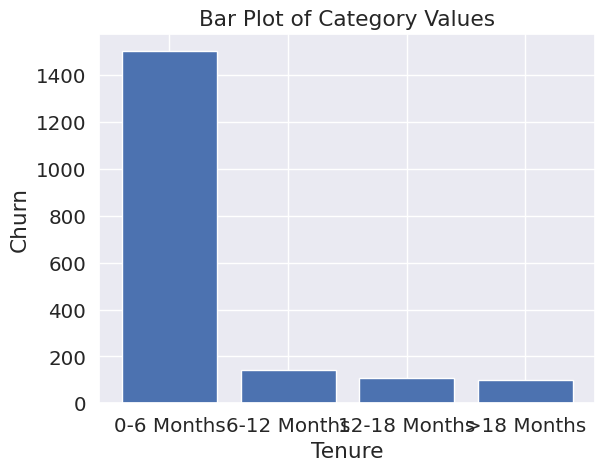

In [125]:
data = {
    'Tenure': ['0-6 Months', '6-12 Months', '12-18 Months', '>18 Months'],
    'Churn': [1502, 142, 106, 98]
}

df = pd.DataFrame(data)

plt.bar(df['Tenure'], df['Churn'])
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.title('Bar Plot of Category Values')
plt.show()

#### Observations

* 81.28% of the accounts which churned had a tenure <= 6 months

In [126]:
# Extract a dataframe for accounts which churned and Tenure <= 6 months
df_tenure_six_churn = df_tenure_six[df_tenure_six["Churn"] == 1.0]

In [127]:
# Print first five lines of dataframe
df_tenure_six_churn.head()

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0        3.0              6.0   Debit Card  Female   
1      1     0.0        1.0              8.0          UPI    Male   
2      1     0.0        1.0             30.0   Debit Card    Male   
3      1     0.0        3.0             15.0   Debit Card    Male   
4      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                      1.0                   5.0    159.93       Mobile  
1                      0.0                   0.0    120.90       Mobile  
2                      0.0                   3.0       NaN       Mobile  
3                      0.0                   3.0    134.07       Mobile  
4                      1.0                   3.0    129.60       Mobile

In [128]:
# Create list of integer and float variables for value counts
val_cnt = ['CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly', 'City_Tier', 'Account_user_count', 'coupon_used_for_payment']

In [129]:
#Print value counts for added integer and float variables
for i in val_cnt:
    print("Unique values in", i, "are :")
    print(df_tenure_six_churn[i].value_counts(normalize = True))
    print("*" * 50)


Unique values in CC_Contacted_LY are :
16.0    0.057835
15.0    0.051782
12.0    0.051110
14.0    0.049765
13.0    0.046402
17.0    0.045730
9.0     0.041695
10.0    0.040350
18.0    0.039005
11.0    0.036315
19.0    0.036315
8.0     0.032280
22.0    0.030262
31.0    0.029590
21.0    0.029590
20.0    0.028245
7.0     0.026900
29.0    0.025555
23.0    0.024210
24.0    0.023537
30.0    0.023537
32.0    0.022865
25.0    0.022192
27.0    0.020847
34.0    0.020847
6.0     0.020847
28.0    0.020847
26.0    0.019502
35.0    0.018157
36.0    0.016812
33.0    0.016140
37.0    0.009415
38.0    0.008742
39.0    0.003362
40.0    0.002690
41.0    0.002017
42.0    0.002017
43.0    0.001345
4.0     0.000672
5.0     0.000672
Name: CC_Contacted_LY, dtype: float64
**************************************************
Unique values in Service_Score are :
3.0    0.496316
2.0    0.304756
4.0    0.198928
Name: Service_Score, dtype: float64
**************************************************
Unique values in CC_

In [130]:
#Print median for added integer and float variables
for i in val_cnt:
    print("median values in", i, "are :")
    print(df_tenure_six_churn[i].median())
    print("*" * 50)


median values in CC_Contacted_LY are :
17.0
**************************************************
median values in Service_Score are :
3.0
**************************************************
median values in CC_Agent_Score are :
3.0
**************************************************
median values in Complain_ly are :
1.0
**************************************************
median values in City_Tier are :
1.0
**************************************************
median values in Account_user_count are :
4.0
**************************************************
median values in coupon_used_for_payment are :
1.0
**************************************************


In [131]:
# Create list of categorical variables for value counts
val_cnt = ['Login_device', 'Gender', 'Marital_Status', 'account_segment', 'Payment']

In [132]:
#Print value counts for added integer and float variables
for i in val_cnt:
    print("Unique values in", i, "are :")
    print(df_tenure_six_churn[i].value_counts(normalize = True))
    print("*" * 50)


Unique values in Login_device are :
Mobile      0.657632
Computer    0.342368
Name: Login_device, dtype: float64
**************************************************
Unique values in Gender are :
Male      0.619851
Female    0.380149
Name: Gender, dtype: float64
**************************************************
Unique values in Marital_Status are :
Single      0.538983
Married     0.340339
Divorced    0.120678
Name: Marital_Status, dtype: float64
**************************************************
Unique values in account_segment are :
Regular Plus    0.664651
Super           0.223118
HNI             0.090726
Super Plus      0.016129
Regular         0.005376
Name: account_segment, dtype: float64
**************************************************
Unique values in Payment are :
Debit Card          0.363881
Credit Card         0.265499
E wallet            0.142183
Cash on Delivery    0.138140
UPI                 0.090296
Name: Payment, dtype: float64
****************************************

#### Observations

- For accounts churning within the first 6 months:

- Mobile is 65.72% of Login_device
- Male is 61.99% of Gender value
- Marital_status is 53.90% Single
- Account_segment is 66.47% Regular Plus
- Payment value was 36.39% Debit Card and 26.55% Credit card

### Outlier Treatment

In [133]:
numerical_columns = churn.select_dtypes(include=np.number).columns.to_list()
numerical_columns.remove('Churn')

In [134]:
#Print list of numerical variables
numerical_columns

['Tenure',
 'City_Tier',
 'CC_Contacted_LY',
 'Service_Score',
 'Account_user_count',
 'CC_Agent_Score',
 'rev_per_month',
 'Complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

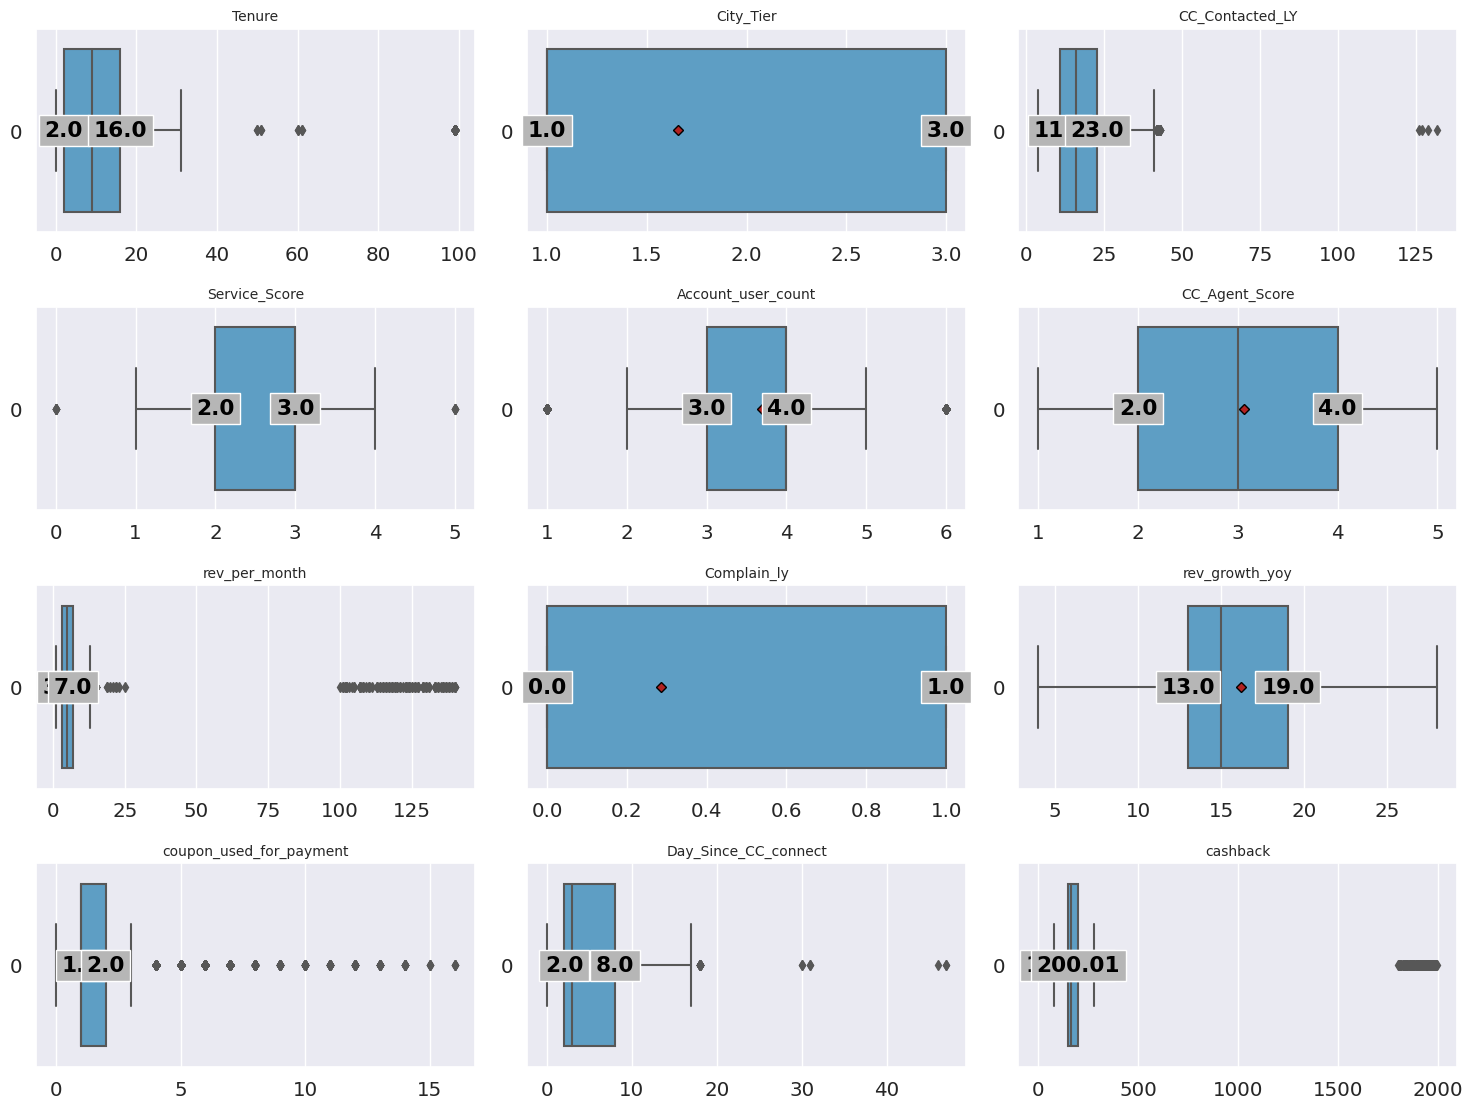

In [135]:
#Print floating variable boxplots
multipleBoxplotNumLoop(numerical_columns,churn)

#### Observation

- These variables have high outliers: Tenure, CC_Contacted_LY, Service_Score, Account_user_count, rev_per_month,           Coupon_used_for_payment, Day_Since_CC_connect, cashback.

- These variables have low outliers: Service_Score, Account_user_count.

In [136]:
# Initialize count for Tenure high outliers
value_hi_cnt = 0

In [137]:
# Calculate Tenure IQR and High Outlier Whisker
Tenure_Q1 = churn["Tenure"].quantile(0.25)
Tenure_Q3 = churn["Tenure"].quantile(0.75)
Tenure_IQR = Tenure_Q3 - Tenure_Q1
Tenure_right_whisker = Tenure_Q3 + 1.5 * Tenure_IQR

In [138]:
# Calculate Count Above Right Whisker
for value in churn['Tenure']:
    if value > Tenure_right_whisker:
        value_hi_cnt += 1
print(f"Number of Tenure high outlier values above {Tenure_right_whisker}: {value_hi_cnt}")


Number of Tenure high outlier values above 37.0: 139


In [139]:
# Initialize count for CC_Contacted_LY high outliers
value_hi_cnt = 0

In [140]:
# Calculate CC_Contacted_LY IQR and High Outlier Whisker
CC_Contacted_Q1 = churn["CC_Contacted_LY"].quantile(0.25)
CC_Contacted_Q3 = churn["CC_Contacted_LY"].quantile(0.75)
CC_Contacted_IQR = CC_Contacted_Q3 - CC_Contacted_Q1
CC_Contacted_right_whisker = CC_Contacted_Q3 + 1.5 * CC_Contacted_IQR

In [141]:
# Calculate Count Above Right Whisker
for value in churn['CC_Contacted_LY']:
    if value > CC_Contacted_right_whisker:
        value_hi_cnt += 1
print(f"Number of CC_Contacted_LY high outlier values above {CC_Contacted_right_whisker}: {value_hi_cnt}")


Number of CC_Contacted_LY high outlier values above 41.0: 42


In [142]:
# Calculate Service_Score IQR and High/Low Outlier Whiskers
Service_Score_Q1 = churn["Service_Score"].quantile(0.25)
Service_Score_Q3 = churn["Service_Score"].quantile(0.75)
Service_Score_IQR = Service_Score_Q3 - Service_Score_Q1
Service_Score_right_whisker = Service_Score_Q3 + 1.5 * Service_Score_IQR
Service_Score_left_whisker = Service_Score_Q1 - 1.5 * Service_Score_IQR

In [143]:
# Initialize count for Service_Score high outliers
value_hi_cnt = 0

# Calculate Count Above Right Whisker
for value in churn['Service_Score']:
    if value > Service_Score_right_whisker:
        value_hi_cnt += 1
print(f"Number of Service_Score high outlier values above {Service_Score_right_whisker}: {value_hi_cnt}")



Number of Service_Score high outlier values above 4.5: 5


In [144]:
# Initialize count for Service_Score low outliers
value_low_cnt = 0

# Calculate Count Below Left Whisker
for value in churn['Service_Score']:
    if value < Service_Score_left_whisker:
        value_low_cnt += 1
print(f"Number of Service_Score low outlier values below {Service_Score_left_whisker}: {value_low_cnt}")

Number of Service_Score low outlier values below 0.5: 8


In [145]:
# Initialize count for rev_per_month high outliers
value_hi_cnt = 0

In [146]:
# Calculate rev_per_month IQR and High Outlier Whisker
rev_per_month_Q1 = churn["rev_per_month"].quantile(0.25)
rev_per_month_Q3 = churn["rev_per_month"].quantile(0.75)
rev_per_month_IQR = rev_per_month_Q3 - rev_per_month_Q1
rev_per_month_right_whisker = rev_per_month_Q3 + 1.5 * rev_per_month_IQR

In [147]:
# Calculate Count Above Right Whisker
for value in churn['rev_per_month']:
    if value > rev_per_month_right_whisker:
        value_hi_cnt += 1
print(f"Number of rev_per_month high outlier values above {rev_per_month_right_whisker}: {value_hi_cnt}")


Number of rev_per_month high outlier values above 13.0: 185


In [148]:
# Initialize count for coupon_used_for_payment high outliers
value_hi_cnt = 0

In [149]:
# Calculate rev_per_month IQR and High Outlier Whisker
coupon_used_for_payment_Q1 = churn["coupon_used_for_payment"].quantile(0.25)
coupon_used_for_payment_Q3 = churn["coupon_used_for_payment"].quantile(0.75)
coupon_used_for_payment_IQR = coupon_used_for_payment_Q3 - coupon_used_for_payment_Q1
coupon_used_for_payment_right_whisker = coupon_used_for_payment_Q3 + 1.5 * coupon_used_for_payment_IQR

In [150]:
# Calculate Count Above Right Whisker
for value in churn['coupon_used_for_payment']:
    if value > coupon_used_for_payment_right_whisker:
        value_hi_cnt += 1
print(f"Number of coupon_used_for_payment high outlier values above {coupon_used_for_payment_right_whisker}: {value_hi_cnt}")


Number of coupon_used_for_payment high outlier values above 3.5: 1380


In [151]:
# Initialize count for Day_Since_CC_connect high outliers
value_hi_cnt = 0

In [152]:
# Calculate rev_per_month IQR and High Outlier Whisker
Day_Since_CC_connect_Q1 = churn["Day_Since_CC_connect"].quantile(0.25)
Day_Since_CC_connect_Q3 = churn["Day_Since_CC_connect"].quantile(0.75)
Day_Since_CC_connect_IQR = Day_Since_CC_connect_Q3 - Day_Since_CC_connect_Q1
Day_Since_CC_connect_right_whisker = Day_Since_CC_connect_Q3 + 1.5 * Day_Since_CC_connect_IQR

In [153]:
# Calculate Count Above Right Whisker
for value in churn['Day_Since_CC_connect']:
    if value > Day_Since_CC_connect_right_whisker:
        value_hi_cnt += 1
print(f"Number of Day_Since_CC_connect high outlier values above {Day_Since_CC_connect_right_whisker}: {value_hi_cnt}")


Number of Day_Since_CC_connect high outlier values above 17.0: 33


In [154]:
# Initialize count for cashback high outliers
value_hi_cnt = 0

In [155]:
# Calculate cashback IQR and High Outlier Whisker
cashback_Q1 = churn["cashback"].quantile(0.25)
cashback_Q3 = churn["cashback"].quantile(0.75)
cashback_IQR = cashback_Q3 - cashback_Q1
cashback_right_whisker = cashback_Q3 + 1.5 * cashback_IQR

In [156]:
# Calculate Count Above Right Whisker
for value in churn['cashback']:
    if value > cashback_right_whisker:
        value_hi_cnt += 1
print(f"Number of cashback high outlier values above {cashback_right_whisker}: {value_hi_cnt}")


Number of cashback high outlier values above 279.21: 859


#### Treat Outliers.  Set low outliers at left whisker value and cap high outliers at the right whisker variable

In [157]:
# Floor and cap the outliers
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) #np.clip limit the values in an array

    return df

def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [158]:
# Make a copy of dataframe and treat outliers
churn_1 = churn.copy()
churn_outlier = treat_outliers_all(churn_1, numerical_columns)

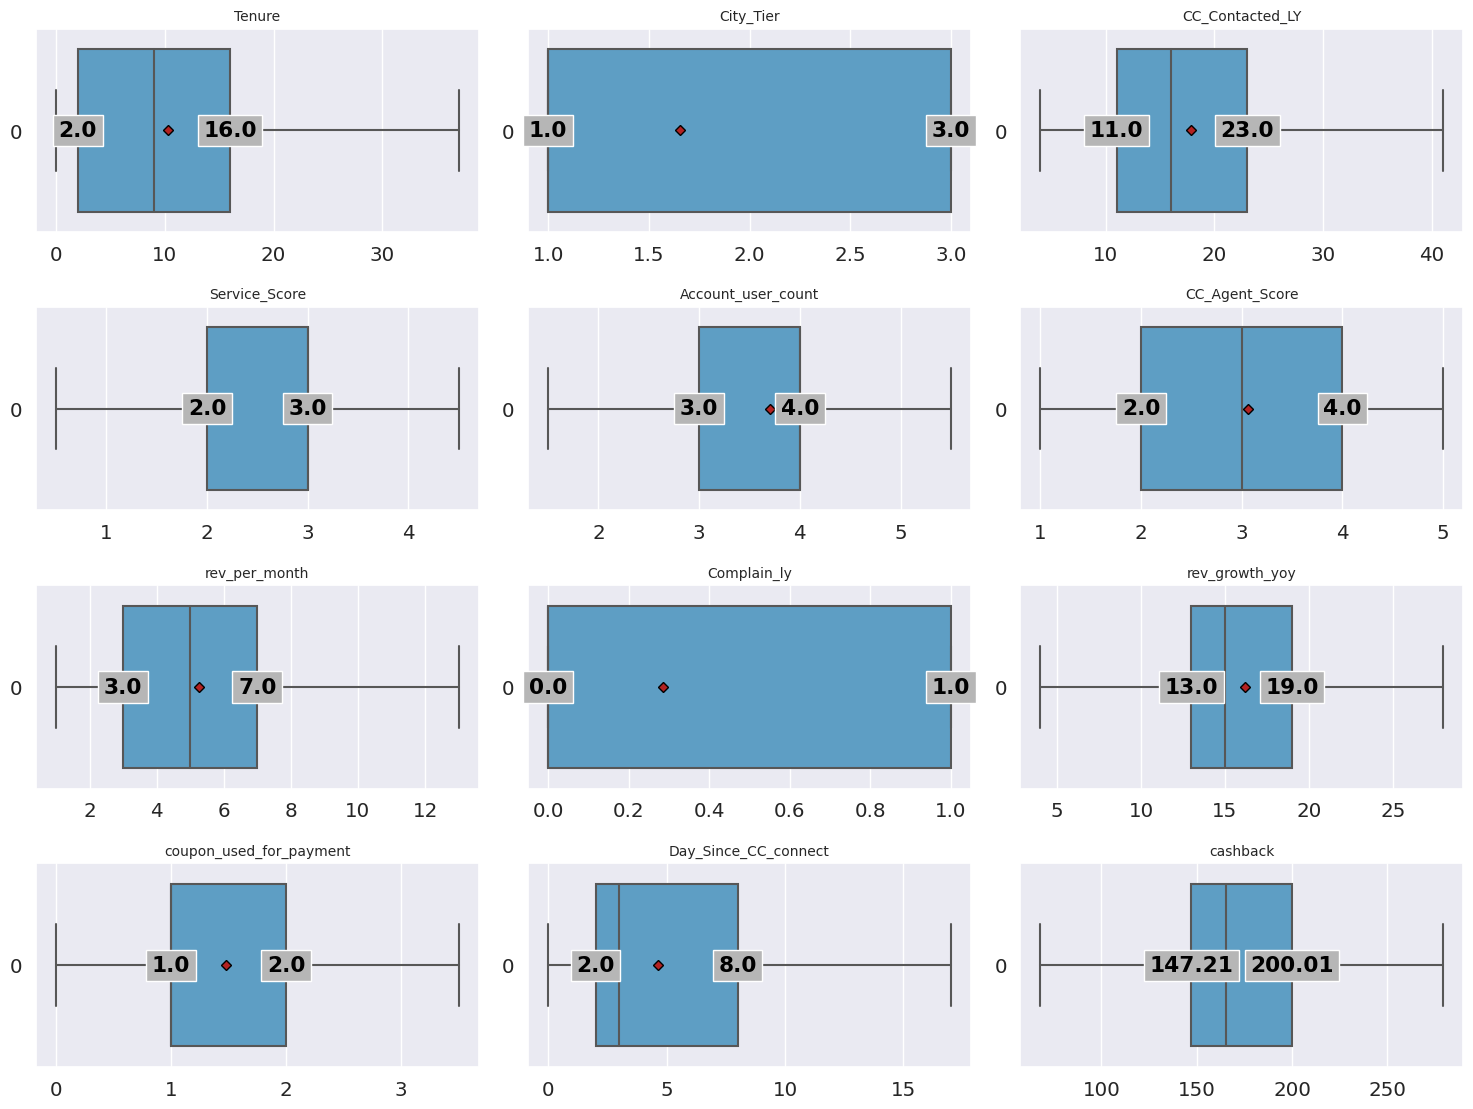

In [159]:
#Print floating variable boxplots
multipleBoxplotNumLoop(numerical_columns,churn_outlier)

In [160]:
# Print dataframe information
churn_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11260 non-null  int64   
 1   Tenure                   11042 non-null  float64 
 2   City_Tier                11148 non-null  float64 
 3   CC_Contacted_LY          11158 non-null  float64 
 4   Payment                  11151 non-null  category
 5   Gender                   11152 non-null  category
 6   Service_Score            11162 non-null  float64 
 7   Account_user_count       10816 non-null  float64 
 8   account_segment          11163 non-null  category
 9   CC_Agent_Score           11144 non-null  float64 
 10  Marital_Status           11048 non-null  category
 11  rev_per_month            10469 non-null  float64 
 12  Complain_ly              10903 non-null  float64 
 13  rev_growth_yoy           11257 non-null  float64 
 14  coupon

#### Missing Value Imputation & Label Encoding

In [161]:
# Print dataframe information
churn_outlier.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [162]:
#Make copy of dataframe
churn_missing = churn_outlier.copy()

In [163]:
# Define list of parameters with missing values
col_impute = ['rev_per_month','Login_device','cashback','Account_user_count','Day_Since_CC_connect',
'Complain_ly','Tenure','Marital_Status','CC_Agent_Score','City_Tier','Payment','Gender',
'CC_Contacted_LY','Service_Score','account_segment','rev_growth_yoy','coupon_used_for_payment']

### Perform Additional EDA (Post Data Pre-Processing) To Produce Charts To Be Included In Report

In [164]:
# Make list of numerical values
key_numerical_cols = ["Tenure", "CC_Contacted_LY", "Service_Score", "Account_user_count", "CC_Agent_Score", "rev_per_month", "rev_growth_yoy", "Coupon_used_for_payment", "Day_Since_CC_connect" ]

In [165]:
#Print list of key numerical variables
key_numerical_cols

['Tenure',
 'CC_Contacted_LY',
 'Service_Score',
 'Account_user_count',
 'CC_Agent_Score',
 'rev_per_month',
 'rev_growth_yoy',
 'Coupon_used_for_payment',
 'Day_Since_CC_connect']

#### Correlation plot

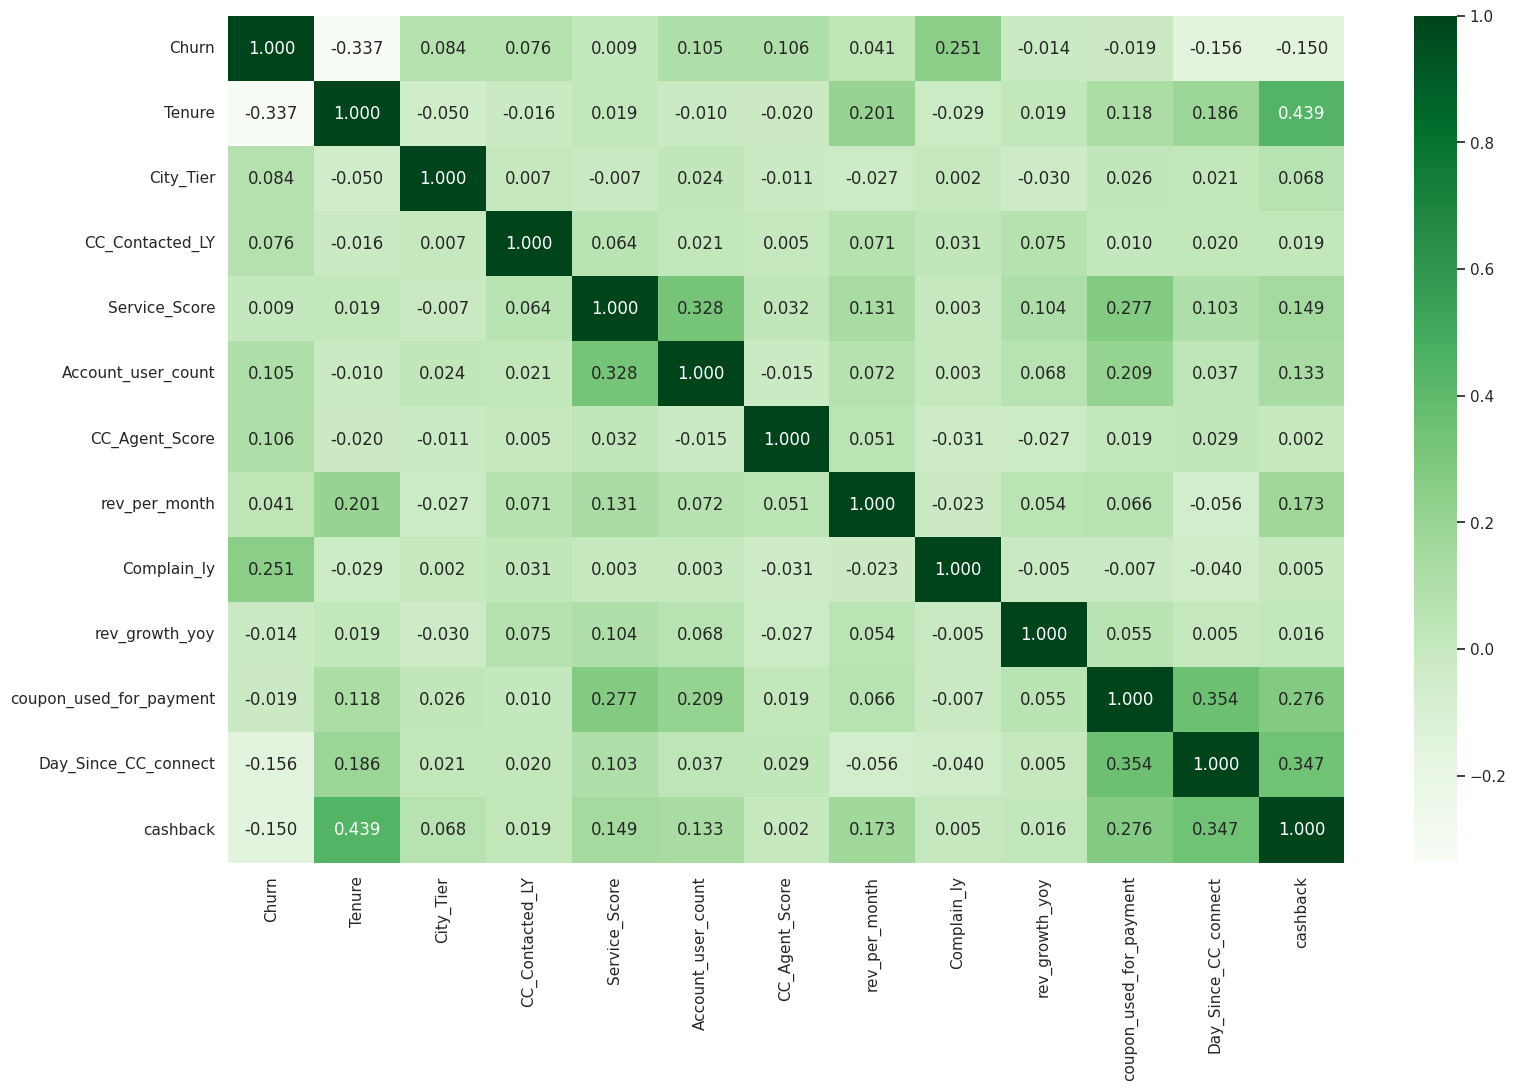

In [166]:
# Plot Correlation Plot
plt.figure(figsize=(18,11))
sns.set(font_scale=1)
sns.heatmap(churn_missing.corr(), cmap="Greens" ,annot=True, fmt='.3f');

#### Observations

- Churn is negatively correlated with Tenure
- Churn is positively correlated with Complain_LY
- Cashback and Tenure are positively correlated.
- There is a strong negative correlation between Avg_Mnth_cashback_per_rev and rev_per_month


### Comments On EDA Post Data Pre-processing


Account segment "Super"

Accounts that are not labeled as Super are highly likely to churn. “Super” is the account segment most common in the company. About 36% of accounts belong to this segment. These customers very loyal to the company. The company needs to add more customers to this segment. Adding more customers to the segment will lead to lower churn in the future.

Tenure

Accounts with lower tenure are more likely to churn than accounts with higher tenure. Again, customers that have a year or less of tenure should be provided high, prioritized customer service.

Marital Status "Married"

Accounts whose main holder is married are less likely to churn than accounts whose main holder is not married. Perhaps accounts with married status are in a more “stable” phase in the customer lifetime, than accounts that do not have the “married” status. Perhaps accounts with “single” status are in a stage that revolves around growth and risk. These customers are willing to take the risk of going to another competing company. The company will require a service plan that includes promoting stability and growth for account holders that are single and divorced.

Payment Method "E Wallet"

Accounts that use payment method E wallet are more likely to churn than accounts that do not use this payment method. The company will need to identify if the service experience regarding payment with E wallet are relatively lower than service experience with other payment methods. Perhaps customers that use E wallet are expecting a specific service experience that cannot be currently provided by the company.

Based on the above observations, it is recommended that the company should provide some better offer/service to the customers who have opted for the service in the last 5 years.

















### Plot Continuous Variables Post Outlier Treatment

In [167]:
#Define a list of numerical variables for EDA for investigation of transformation
all_col = churn_missing.select_dtypes(include=np.number).columns.tolist()

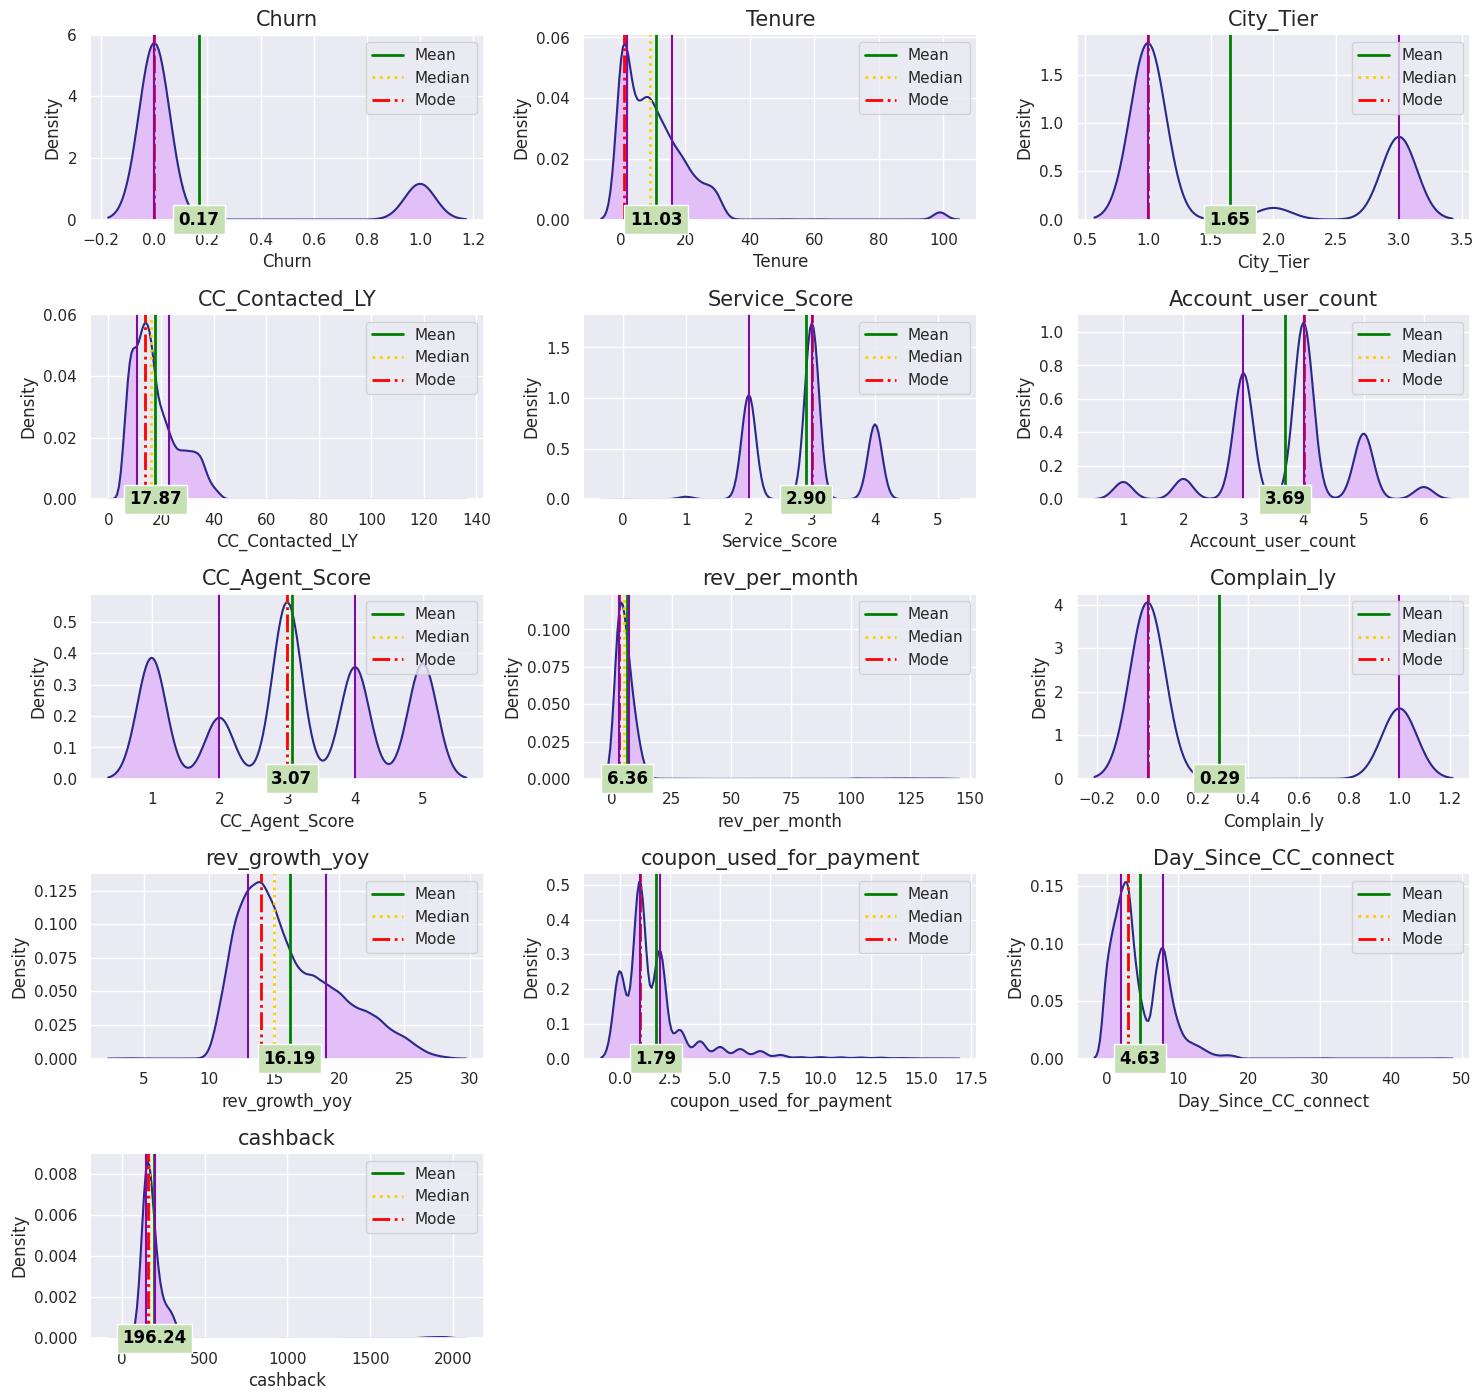

In [168]:
#Print floating variable distribution plots
multipleDspltNumLoop(all_col,churn)

#### Observations

- Although Tenure is right skewed, the data appears reasonable and a scaler will not be applied.
- Although CC_Contacted_LY is right skewed, the data appears reasonable and a scaler will not be applied.
- Although rev_per_month is right skewed, the data appears reasonable and a scaler will not be applied.
- Although rev_growth_yoy is right skewed, the data appears reasonable and a scaler will not be applied.
- Although Day_Since_CC_connect is right skewed, the data appears reasonable and a scaler will not be applied.
- Avg_Mnth_cashback_per_rev is a calculated variable added to the dataframe and a transform will not be applied.

- Note - Modeling methods will include Random Forest which can handle skewed data quite well due to the ensemble nature.


In [169]:
#Print dataframe information
churn_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11260 non-null  int64   
 1   Tenure                   11042 non-null  float64 
 2   City_Tier                11148 non-null  float64 
 3   CC_Contacted_LY          11158 non-null  float64 
 4   Payment                  11151 non-null  category
 5   Gender                   11152 non-null  category
 6   Service_Score            11162 non-null  float64 
 7   Account_user_count       10816 non-null  float64 
 8   account_segment          11163 non-null  category
 9   CC_Agent_Score           11144 non-null  float64 
 10  Marital_Status           11048 non-null  category
 11  rev_per_month            10469 non-null  float64 
 12  Complain_ly              10903 non-null  float64 
 13  rev_growth_yoy           11257 non-null  float64 
 14  coupon

##### Observations

- All variables except Churn contain null data.  Missing values will be imputed after train/test split to revent data leakage.

### Model Building


### Objectives and Evaluation Criterion

- Recall is the key performance metric for this evaluation. It is imperative that the company identify and reach out to as many
  of the accounts likely to churn as possible. Preventing the loss of these accounts is critical to business sustainability.
  There is little downside to reaching out to accounts which are false positives.

- Positive: Customers that did churn [1]

- Negative: Customers that did not churn [0]

- 1.0 True Positives TP: Customer predicted as Positive (that they will churn) and correctly because they did churn.

- 2.0 False Positives FP: Customer predicted as Positive (will churn) but falsely because they did NOT churn.

- 3.0 False Negatives FN: Customer predicted as Negative (will NOT churn) but falsely because they did churn.

- 4.0 True Negatives TN: Customer predicted as Negative (will NOT churn) and correctly because they did NOT churn.

#### Splitting Data into Train & Test

In [170]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [171]:
# Lets split the data
X = churn_missing.drop('Churn', axis=1)
y = churn_missing.pop("Churn")

In [172]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= SEED, shuffle=True, stratify=y)
print(X_train.shape, X_test.shape)

(7882, 17) (3378, 17)


In [173]:
#Verify stratify is actually true after split by comparing ratios of both classes in the target before & after the split
print(y.value_counts())
print(y_test.value_counts())

0    9364
1    1896
Name: Churn, dtype: int64
0    2809
1     569
Name: Churn, dtype: int64


#### Observations

- Both the training and test data is imbalanced.
- For training data a total of 16.84% churned.
- For testing data a total of 16.84% churned.

#### Imputation Of Missing Values - Performed after train/test split to prevent data leakage

In [174]:
# For training data we need to pass numerical values for each categorical column for imputation so we will label encode them
device = {
    'Computer': 0,
    'Mobile': 1
}
X_train["Login_device"] = X_train["Login_device"].map(device)

marital_status = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2
}
X_train["Marital_Status"] = X_train["Marital_Status"].map(marital_status)

Payment = {
    'UPI': 0,
    'Cash_on Delivery': 1,
    'E wallet': 2,
    'Credit Card': 3,
    'Debit Card': 4
}
X_train["Payment"] = X_train["Payment"].map(Payment)

Gender = {
    'Female': 0,
    'Male': 1
}
X_train["Gender"] = X_train["Gender"].map(Gender)

segment = {
    'Regular': 0,
    'Super_Plus': 1,
    'HNI': 2,
    'Super': 3,
    'Regular_Plus': 4
}
X_train["account_segment"] = X_train["account_segment"].map(segment)

In [175]:
# Print first five rows of training data
X_train.head()

Tenure  City_Tier  CC_Contacted_LY  Payment Gender  Service_Score  \
9882     4.0        3.0             17.0      3.0      0            4.0   
9754    26.0        3.0             41.0      4.0      1            3.0   
583      9.0        3.0             14.0      NaN      1            2.0   
6772     7.0        3.0             20.0      4.0      1            2.0   
760      0.0        3.0             16.0      4.0      1            2.0   

      Account_user_count  account_segment  CC_Agent_Score Marital_Status  \
9882                 5.0              3.0             4.0              1   
9754                 4.0              NaN             1.0              1   
583                  3.0              3.0             2.0              1   
6772                 3.0              3.0             3.0              1   
760                  3.0              3.0             2.0              0   

      rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
9882            6.0          1.0            13.0                      3.0   
9754            4.0          0.0            18.0                      2.0   
583             5.0          0.0            13.0                      1.0   
6772            6.0          1.0            15.0                      1.0   
760             1.0          0.0            14.0                      0.0   

      Day_Since_CC_connect  cashback Login_device  
9882                   8.0    180.09            1  
9754                   1.0    163.82            0  
583                    7.0    150.79            0  
6772                   7.0    147.01            0  
760                    1.0    149.50            1

In [176]:
# For test data we need to pass numerical values for each categorical column for imputation so we will label encode them
device = {
    'Computer': 0,
    'Mobile': 1
}
X_test["Login_device"] = X_test["Login_device"].map(device)

marital_status = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2
}
X_test["Marital_Status"] = X_test["Marital_Status"].map(marital_status)

Payment = {
    'UPI': 0,
    'Cash_on Delivery': 1,
    'E wallet': 2,
    'Credit Card': 3,
    'Debit Card': 4
}
X_test["Payment"] = X_test["Payment"].map(Payment)

Gender = {
    'Female': 0,
    'Male': 1
}
X_test["Gender"] = X_test["Gender"].map(Gender)

segment = {
    'Regular': 0,
    'Super_Plus': 1,
    'HNI': 2,
    'Super': 3,
    'Regular_Plus': 4
}
X_test["account_segment"] = X_test["account_segment"].map(segment)

In [177]:
# Print first five rows of test data
X_test.head()

Tenure  City_Tier  CC_Contacted_LY  Payment Gender  Service_Score  \
3934     4.0        1.0              9.0      NaN      0            4.0   
2425    19.0        3.0              9.0      4.0      0            2.0   
5397     1.0        3.0              8.0      4.0    NaN            3.0   
2561    16.0        3.0              8.0      3.0      1            3.0   
6664    12.0        1.0             12.0      3.0      0            2.0   

      Account_user_count  account_segment  CC_Agent_Score Marital_Status  \
3934                 5.0              NaN             5.0              0   
2425                 3.0              NaN             4.0              1   
5397                 5.5              3.0             4.0              0   
2561                 3.0              3.0             1.0              1   
6664                 3.0              3.0             3.0              0   

      rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
3934            2.0          0.0            17.0                      1.0   
2425            9.0          0.0            12.0                      3.5   
5397            8.0          0.0            16.0                      1.0   
2561            2.0          1.0            17.0                      3.0   
6664            4.0          0.0            14.0                      3.0   

      Day_Since_CC_connect  cashback Login_device  
3934                   8.0    174.68            0  
2425                   1.0    266.06            1  
5397                   1.0    279.21            1  
2561                   8.0    178.47            1  
6664                   8.0    155.42            0

In [178]:
# Print last five rows of test data
X_test.tail()

Tenure  City_Tier  CC_Contacted_LY  Payment Gender  Service_Score  \
10655     4.0        3.0             40.0      4.0      1            4.0   
4715      3.0        3.0             17.0      2.0      1            3.0   
8547      3.0        3.0             10.0      3.0      0            3.0   
2728      9.0        1.0             15.0      4.0      1            3.0   
2009      9.0        1.0             20.0      4.0      1            3.0   

       Account_user_count  account_segment  CC_Agent_Score Marital_Status  \
10655                 4.0              3.0             5.0              1   
4715                  4.0              NaN             4.0              1   
8547                  4.0              2.0             2.0              2   
2728                  1.5              NaN             4.0              1   
2009                  3.0              3.0             1.0              1   

       rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
10655           10.0          0.0            22.0                      2.0   
4715             3.0          0.0            15.0                      3.0   
8547             6.0          0.0            17.0                      3.5   
2728             2.0          0.0            22.0                      1.0   
2009             1.0          1.0            17.0                      2.0   

       Day_Since_CC_connect  cashback Login_device  
10655                   NaN    166.15            1  
4715                    3.0    147.97            1  
8547                    2.0    210.18            0  
2728                    2.0    128.10            0  
2009                   11.0    165.86            1

In [179]:
# Print first five rows of training data
X_train.head()

Tenure  City_Tier  CC_Contacted_LY  Payment Gender  Service_Score  \
9882     4.0        3.0             17.0      3.0      0            4.0   
9754    26.0        3.0             41.0      4.0      1            3.0   
583      9.0        3.0             14.0      NaN      1            2.0   
6772     7.0        3.0             20.0      4.0      1            2.0   
760      0.0        3.0             16.0      4.0      1            2.0   

      Account_user_count  account_segment  CC_Agent_Score Marital_Status  \
9882                 5.0              3.0             4.0              1   
9754                 4.0              NaN             1.0              1   
583                  3.0              3.0             2.0              1   
6772                 3.0              3.0             3.0              1   
760                  3.0              3.0             2.0              0   

      rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
9882            6.0          1.0            13.0                      3.0   
9754            4.0          0.0            18.0                      2.0   
583             5.0          0.0            13.0                      1.0   
6772            6.0          1.0            15.0                      1.0   
760             1.0          0.0            14.0                      0.0   

      Day_Since_CC_connect  cashback Login_device  
9882                   8.0    180.09            1  
9754                   1.0    163.82            0  
583                    7.0    150.79            0  
6772                   7.0    147.01            0  
760                    1.0    149.50            1

In [180]:
# Print last five rows of training data
X_train.tail()

Tenure  City_Tier  CC_Contacted_LY  Payment Gender  Service_Score  \
10276    11.0        3.0             16.0      2.0      1            NaN   
8695     23.0        1.0             20.0      0.0      1            3.0   
1968      3.0        1.0              NaN      4.0      1            3.0   
561      14.0        1.0             12.0      3.0      1            2.0   
3211      1.0        3.0             10.0      3.0      0            4.0   

       Account_user_count  account_segment  CC_Agent_Score Marital_Status  \
10276                 4.0              3.0             3.0              1   
8695                  5.0              2.0             3.0              0   
1968                  4.0              NaN             1.0              1   
561                   3.0              NaN             5.0              0   
3211                  3.0              3.0             2.0              1   

       rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
10276            6.0          1.0            13.0                      1.0   
8695            12.0          0.0            26.0                      2.0   
1968            10.0          0.0            12.0                      0.0   
561             13.0          1.0            13.0                      1.0   
3211             3.0          1.0            21.0                      2.0   

       Day_Since_CC_connect  cashback Login_device  
10276                   1.0    226.02          NaN  
8695                    1.0    173.00            1  
1968                    3.0    137.61            0  
561                    17.0    147.21            1  
3211                    5.0    171.47            0

In [181]:
# Fill training data missing values with mode of the column values using SimpleImputer.
imputer = SimpleImputer(strategy='median', fill_value = 'numerical')

X_train = imputer.fit_transform(X_train)  # override default behavior to replace Nan with Mode

In [182]:
 #The simple imputer returns a numpy array so we have to convert to a pandas dataframe.
X_train =  pd.DataFrame(X_train, columns = [['Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']])

In [183]:
# Print first five rows of training data
X_train.head()

Tenure City_Tier CC_Contacted_LY Payment Gender Service_Score  \
0    4.0       3.0            17.0     3.0    0.0           4.0   
1   26.0       3.0            41.0     4.0    1.0           3.0   
2    9.0       3.0            14.0     3.0    1.0           2.0   
3    7.0       3.0            20.0     4.0    1.0           2.0   
4    0.0       3.0            16.0     4.0    1.0           2.0   

  Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                5.0             3.0            4.0            1.0   
1                4.0             3.0            1.0            1.0   
2                3.0             3.0            2.0            1.0   
3                3.0             3.0            3.0            1.0   
4                3.0             3.0            2.0            0.0   

  rev_per_month Complain_ly rev_growth_yoy coupon_used_for_payment  \
0           6.0         1.0           13.0                     3.0   
1           4.0         0.0           18.0                     2.0   
2           5.0         0.0           13.0                     1.0   
3           6.0         1.0           15.0                     1.0   
4           1.0         0.0           14.0                     0.0   

  Day_Since_CC_connect cashback Login_device  
0                  8.0   180.09          1.0  
1                  1.0   163.82          0.0  
2                  7.0   150.79          0.0  
3                  7.0   147.01          0.0  
4                  1.0   149.50          1.0

In [184]:
# Print last five rows of training data
X_train.tail()

Tenure City_Tier CC_Contacted_LY Payment Gender Service_Score  \
7877   11.0       3.0            16.0     2.0    1.0           3.0   
7878   23.0       1.0            20.0     0.0    1.0           3.0   
7879    3.0       1.0            16.0     4.0    1.0           3.0   
7880   14.0       1.0            12.0     3.0    1.0           2.0   
7881    1.0       3.0            10.0     3.0    0.0           4.0   

     Account_user_count account_segment CC_Agent_Score Marital_Status  \
7877                4.0             3.0            3.0            1.0   
7878                5.0             2.0            3.0            0.0   
7879                4.0             3.0            1.0            1.0   
7880                3.0             3.0            5.0            0.0   
7881                3.0             3.0            2.0            1.0   

     rev_per_month Complain_ly rev_growth_yoy coupon_used_for_payment  \
7877           6.0         1.0           13.0                     1.0   
7878          12.0         0.0           26.0                     2.0   
7879          10.0         0.0           12.0                     0.0   
7880          13.0         1.0           13.0                     1.0   
7881           3.0         1.0           21.0                     2.0   

     Day_Since_CC_connect cashback Login_device  
7877                  1.0   226.02          1.0  
7878                  1.0   173.00          1.0  
7879                  3.0   137.61          0.0  
7880                 17.0   147.21          1.0  
7881                  5.0   171.47          0.0

In [185]:
# Fill training data missing values with mode of the column values using SimpleImputer.
imputer = SimpleImputer(strategy='median', fill_value = 'numerical')

X_test = imputer.fit_transform(X_test)  # override default behavior to replace Nan with Mode

In [186]:
 #The simple imputer returns a numpy array so we have to convert to a pandas dataframe.
X_test =  pd.DataFrame(X_test, columns = [['Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']])

In [187]:
# Print first five rows of testing data
X_test.head()

Tenure City_Tier CC_Contacted_LY Payment Gender Service_Score  \
0    4.0       1.0             9.0     3.0    0.0           4.0   
1   19.0       3.0             9.0     4.0    0.0           2.0   
2    1.0       3.0             8.0     4.0    1.0           3.0   
3   16.0       3.0             8.0     3.0    1.0           3.0   
4   12.0       1.0            12.0     3.0    0.0           2.0   

  Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                5.0             3.0            5.0            0.0   
1                3.0             3.0            4.0            1.0   
2                5.5             3.0            4.0            0.0   
3                3.0             3.0            1.0            1.0   
4                3.0             3.0            3.0            0.0   

  rev_per_month Complain_ly rev_growth_yoy coupon_used_for_payment  \
0           2.0         0.0           17.0                     1.0   
1           9.0         0.0           12.0                     3.5   
2           8.0         0.0           16.0                     1.0   
3           2.0         1.0           17.0                     3.0   
4           4.0         0.0           14.0                     3.0   

  Day_Since_CC_connect cashback Login_device  
0                  8.0   174.68          0.0  
1                  1.0   266.06          1.0  
2                  1.0   279.21          1.0  
3                  8.0   178.47          1.0  
4                  8.0   155.42          0.0

In [188]:
# Print last five rows of testing data
X_test.tail()

Tenure City_Tier CC_Contacted_LY Payment Gender Service_Score  \
3373    4.0       3.0            40.0     4.0    1.0           4.0   
3374    3.0       3.0            17.0     2.0    1.0           3.0   
3375    3.0       3.0            10.0     3.0    0.0           3.0   
3376    9.0       1.0            15.0     4.0    1.0           3.0   
3377    9.0       1.0            20.0     4.0    1.0           3.0   

     Account_user_count account_segment CC_Agent_Score Marital_Status  \
3373                4.0             3.0            5.0            1.0   
3374                4.0             3.0            4.0            1.0   
3375                4.0             2.0            2.0            2.0   
3376                1.5             3.0            4.0            1.0   
3377                3.0             3.0            1.0            1.0   

     rev_per_month Complain_ly rev_growth_yoy coupon_used_for_payment  \
3373          10.0         0.0           22.0                     2.0   
3374           3.0         0.0           15.0                     3.0   
3375           6.0         0.0           17.0                     3.5   
3376           2.0         0.0           22.0                     1.0   
3377           1.0         1.0           17.0                     2.0   

     Day_Since_CC_connect cashback Login_device  
3373                  3.0   166.15          1.0  
3374                  3.0   147.97          1.0  
3375                  2.0   210.18          0.0  
3376                  2.0   128.10          0.0  
3377                 11.0   165.86          1.0

In [189]:
# Create a ratio variable between cashback and monthly revenue generated by same account in training data
for i, j in zip(X_train['cashback'], X_train['rev_per_month']):
    X_train['Avg_Mnth_cashback_per_rev'] = (X_train['cashback'][i])/(X_train['rev_per_month'][j])

In [190]:
# Print first five rows of training data
X_train.head()

Tenure City_Tier CC_Contacted_LY Payment Gender Service_Score  \
0    4.0       3.0            17.0     3.0    0.0           4.0   
1   26.0       3.0            41.0     4.0    1.0           3.0   
2    9.0       3.0            14.0     3.0    1.0           2.0   
3    7.0       3.0            20.0     4.0    1.0           2.0   
4    0.0       3.0            16.0     4.0    1.0           2.0   

  Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                5.0             3.0            4.0            1.0   
1                4.0             3.0            1.0            1.0   
2                3.0             3.0            2.0            1.0   
3                3.0             3.0            3.0            1.0   
4                3.0             3.0            2.0            0.0   

  rev_per_month Complain_ly rev_growth_yoy coupon_used_for_payment  \
0           6.0         1.0           13.0                     3.0   
1           4.0         0.0           18.0                     2.0   
2           5.0         0.0           13.0                     1.0   
3           6.0         1.0           15.0                     1.0   
4           1.0         0.0           14.0                     0.0   

  Day_Since_CC_connect cashback Login_device Avg_Mnth_cashback_per_rev  
0                  8.0   180.09          1.0                 30.015000  
1                  1.0   163.82          0.0                 40.955000  
2                  7.0   150.79          0.0                 30.158000  
3                  7.0   147.01          0.0                 24.501667  
4                  1.0   149.50          1.0                149.500000

In [191]:
# Create a ratio variable between cashback and monthly revenue generated by same account in training data
for i, j in zip(X_test['cashback'], X_test['rev_per_month']):
    X_test['Avg_Mnth_cashback_per_rev'] = (X_test['cashback'][i])/(X_test['rev_per_month'][j])

In [192]:
# Print first five rows of testing data
X_test.head()

Tenure City_Tier CC_Contacted_LY Payment Gender Service_Score  \
0    4.0       1.0             9.0     3.0    0.0           4.0   
1   19.0       3.0             9.0     4.0    0.0           2.0   
2    1.0       3.0             8.0     4.0    1.0           3.0   
3   16.0       3.0             8.0     3.0    1.0           3.0   
4   12.0       1.0            12.0     3.0    0.0           2.0   

  Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                5.0             3.0            5.0            0.0   
1                3.0             3.0            4.0            1.0   
2                5.5             3.0            4.0            0.0   
3                3.0             3.0            1.0            1.0   
4                3.0             3.0            3.0            0.0   

  rev_per_month Complain_ly rev_growth_yoy coupon_used_for_payment  \
0           2.0         0.0           17.0                     1.0   
1           9.0         0.0           12.0                     3.5   
2           8.0         0.0           16.0                     1.0   
3           2.0         1.0           17.0                     3.0   
4           4.0         0.0           14.0                     3.0   

  Day_Since_CC_connect cashback Login_device Avg_Mnth_cashback_per_rev  
0                  8.0   174.68          0.0                 87.340000  
1                  1.0   266.06          1.0                 29.562222  
2                  1.0   279.21          1.0                 34.901250  
3                  8.0   178.47          1.0                 89.235000  
4                  8.0   155.42          0.0                 38.855000

### Modelling Process (Validation & Interpretation)

- It is important to note that the base dataset is imbalanced
- Split the dataset into train and test sets
- Impute missing values
- Add a calculated variable for average monthly cashback / revenue
- Build different models - Logistic Regression, Decision Tree, Random Forest, Gradient Boost,  and XG Boost using base dataset
- Calculate confusion matrix and plot feature importances
- Calculate training and testing Accuracy,  Recall, Precision, F1-Score
- Compare all model performances on training and test data
- Recall is the key evaluation metric due to the need to minimize churn.
- Build corresponding models using oversampled data and evaluate. Oversampling is method used to develop a balanced dataset.
- Select a final model to be used.


#### Confusion Matrix Code

In [193]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [194]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [195]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [196]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

In [197]:
# Print first five rows of training data transposed
X.T.head()

0     1           2           3            4      \
Tenure                  4.0   0.0         0.0         0.0          0.0   
City_Tier               3.0   1.0         1.0         3.0          1.0   
CC_Contacted_LY         6.0   8.0        30.0        15.0         12.0   
Payment          Debit Card   UPI  Debit Card  Debit Card  Credit Card   
Gender               Female  Male        Male        Male         Male   

                      5                 6            7         8      \
Tenure                  0.0               2.0          0.0      13.0   
City_Tier               1.0               3.0          1.0       3.0   
CC_Contacted_LY        22.0              11.0          6.0       9.0   
Payment          Debit Card  Cash on Delivery  Credit Card  E wallet   
Gender               Female              Male         Male      Male   

                      9      ...        11250     11251     11252  \
Tenure                  0.0  ...          3.0      14.0      13.0   
City_Tier               1.0  ...          1.0       3.0       3.0   
CC_Contacted_LY        31.0  ...         40.0      37.0      33.0   
Payment          Debit Card  ...  Credit Card  E wallet  E wallet   
Gender                 Male  ...       Female      Male    Female   

                       11253   11254        11255        11256       11257  \
Tenure                   5.0     1.0         10.0         13.0         1.0   
City_Tier                1.0     3.0          1.0          1.0         1.0   
CC_Contacted_LY         17.0    19.0         34.0         19.0        14.0   
Payment          Credit Card     UPI  Credit Card  Credit Card  Debit Card   
Gender                  Male  Female         Male         Male        Male   

                       11258        11259  
Tenure                  23.0          8.0  
City_Tier                3.0          1.0  
CC_Contacted_LY         11.0         22.0  
Payment          Credit Card  Credit Card  
Gender                  Male         Male  

[5 rows x 11260 columns]

In [198]:
# Print first five rows of training data
X.head()

Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  Service_Score  \
0     4.0        3.0              6.0   Debit Card  Female            3.0   
1     0.0        1.0              8.0          UPI    Male            3.0   
2     0.0        1.0             30.0   Debit Card    Male            2.0   
3     0.0        3.0             15.0   Debit Card    Male            2.0   
4     0.0        1.0             12.0  Credit Card    Male            2.0   

   Account_user_count account_segment  CC_Agent_Score Marital_Status  \
0                 3.0           Super             2.0         Single   
1                 4.0    Regular Plus             3.0         Single   
2                 4.0    Regular Plus             3.0         Single   
3                 4.0           Super             5.0         Single   
4                 3.0    Regular Plus             5.0         Single   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0          1.0            11.0                      1.0   
1            7.0          1.0            15.0                      0.0   
2            6.0          1.0            14.0                      0.0   
3            8.0          0.0            23.0                      0.0   
4            3.0          0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback Login_device  
0                   5.0    159.93       Mobile  
1                   0.0    120.90       Mobile  
2                   3.0       NaN       Mobile  
3                   3.0    134.07       Mobile  
4                   3.0    129.60       Mobile

In [199]:
#### Clear Backend
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

#### Modelling Process, Validation against Test data, & Interpretation


Hyper-parameter tuning will be performed on models using grid search cross validation.

#### Decision Tree Classifier with Hyper-Parameter tuning

Accuracy on training set :  0.8298655163664045
Accuracy on test set :  0.8285968028419183
Recall on training set :  0.7784476262245666
Recall on test set :  0.7592267135325131
Precision on training set :  0.4966346153846154
Precision on test set :  0.494279176201373
F1-Score on training set :  0.6063985911358967
F1-Score on test set :  0.5987525987525987
CPU times: user 9.86 s, sys: 1.58 s, total: 11.4 s
Wall time: 33.9 s


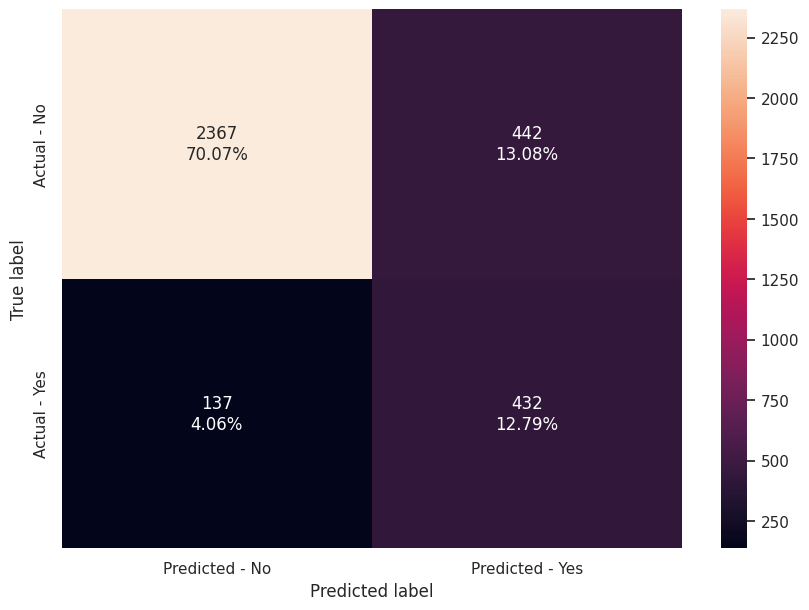

In [200]:
%%time
#Choose the type of classifier.
# Use class_weight = 'balanced' to compensate for imbalanced data.
dtree_estimator = DecisionTreeClassifier(criterion = 'gini', class_weight= 'balanced', random_state= SEED)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. (Actual modeling)
dtree_estimator.fit(X_train, y_train)

# Comparing with test data (the Validation)
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

### Observations:

The training data is not overfit.  Testing recall is only 0.7592. This is a relatively poor modeling result as there are 137 false negative results for test data evaluation.

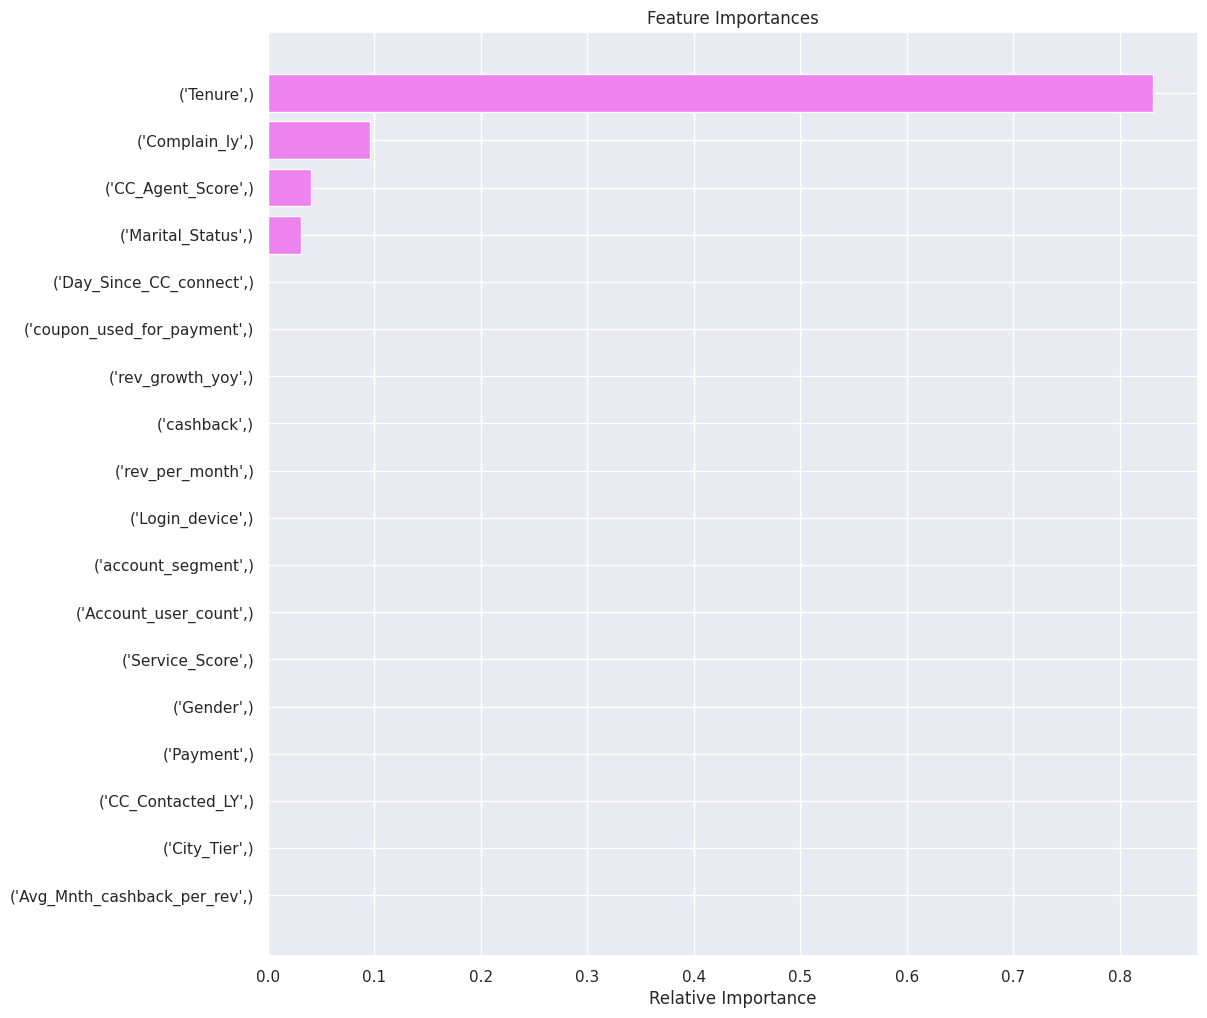

In [201]:
# Display feature importances for decision tree
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:

- The four most important features for the tuned Decision Tree for base data are:

- Tenure (relative imporance = 0.8312)
- Complain_ly
- CC_Agent_Score
- Marital_Status

In [202]:
## Important Variables

print (pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Tenure                     0.831196
Complain_ly                0.096396
CC_Agent_Score             0.040836
Marital_Status             0.031572
Gender                     0.000000
Service_Score              0.000000
Account_user_count         0.000000
account_segment            0.000000
Payment                    0.000000
City_Tier                  0.000000
rev_per_month              0.000000
CC_Contacted_LY            0.000000
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Day_Since_CC_connect       0.000000
cashback                   0.000000
Login_device               0.000000
Avg_Mnth_cashback_per_rev  0.000000


In [203]:
#### Clear Backend
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Random Forest with Hyper-parameter tuning

In [204]:
%%time
# Choose the type of classifier.
# Use class_wright = 'balanced' to compensate for imbalanced data.
rf_tuned = RandomForestClassifier(class_weight= 'balanced', random_state= SEED, oob_score=True, bootstrap=True)

parameters = {
                'max_depth': list(np.arange(5,25,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,10,5),
                'min_samples_split': np.arange(2, 15, 5),
                'n_estimators': np.arange(20,70,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

CPU times: user 9.19 s, sys: 546 ms, total: 9.73 s
Wall time: 2min 18s


RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=None,
                       min_samples_split=12, n_estimators=30, oob_score=True,
                       random_state=12345)

Accuracy on training set :  0.9580055823395077
Accuracy on test set :  0.9301361752516282
Recall on training set :  0.9562923888470234
Recall on test set :  0.8506151142355008
Precision on training set :  0.8229571984435797
Precision on test set :  0.7622047244094489
F1-Score on training set :  0.8846287905193447
F1-Score on test set :  0.8039867109634552


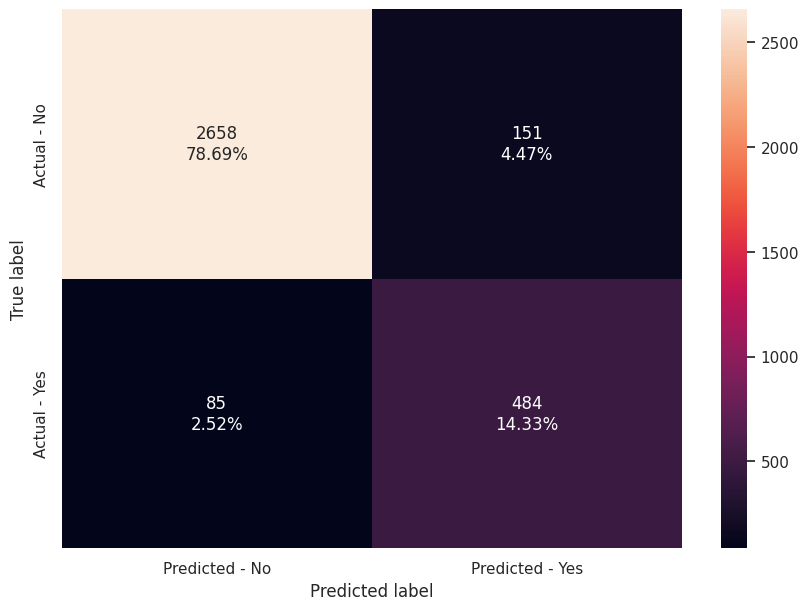

In [205]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

### Observations :

- The model is not overfit on training data.

- From the validation against the test data using the get_metrics_score() function earlier defined, we can see that the Recall
  on the test data is 0.8506.

- There are 85 false negatives which are harmful, allowing slip through 85 churners incorrectly predicted as 'not going to
  churn'. This performed better than the decision tree model which let slip through 137 potential churners incorrectly
  classified as not going to churn.

In [206]:
feature_names = list(X_train.columns)
print(feature_names)

[('Tenure',), ('City_Tier',), ('CC_Contacted_LY',), ('Payment',), ('Gender',), ('Service_Score',), ('Account_user_count',), ('account_segment',), ('CC_Agent_Score',), ('Marital_Status',), ('rev_per_month',), ('Complain_ly',), ('rev_growth_yoy',), ('coupon_used_for_payment',), ('Day_Since_CC_connect',), ('cashback',), ('Login_device',), ('Avg_Mnth_cashback_per_rev',)]


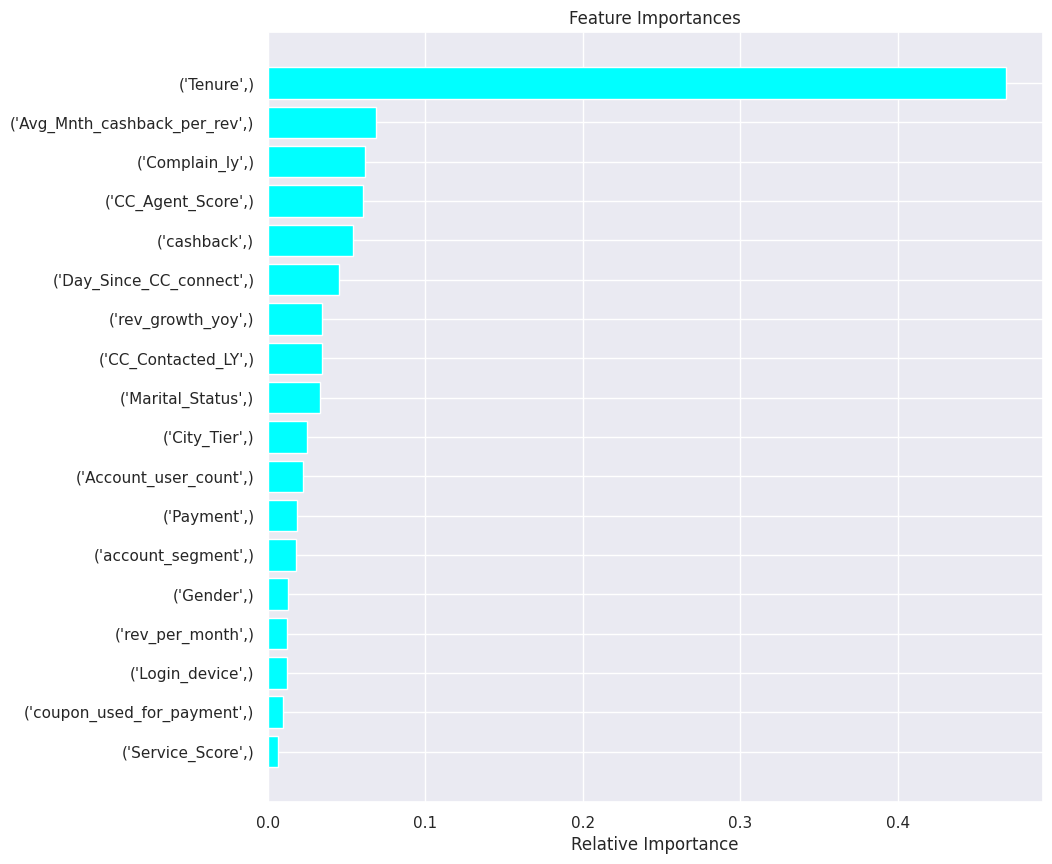

In [207]:
# Plot feature importances
importances_2 = rf_tuned.feature_importances_
indices = np.argsort(importances_2)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_2[indices], color='cyan', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:

The four most important features for the tuned Random Forest with base data are:

- Tenure
- Avg_Mnth_cashback_per_rev
- Complain_ly
- CC_Agent_Score

#### Observations

In [208]:
#### Clear Backend
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

#### Gradient Boosting with Hyper-parameter tuning

In [209]:
%%time

# Calculate Sample Weights
sample_weights = np.zeros(len(y_train))
sample_weights[y_train == 0] = 0.1684
sample_weights[y_train == 1] = 0.8316

# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state= SEED),random_state= SEED)

# Grid of parameters to choose from
parameters = {
    'n_estimators': np.arange(20,70,10),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train, sample_weight = sample_weights)

CPU times: user 3min 18s, sys: 2.45 ms, total: 3min 18s
Wall time: 3min 17s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=12345),
                           max_features=0.8, n_estimators=60,
                           random_state=12345, subsample=0.8)

In [210]:
# lets view the set of possible available parameters for tuning in Gradient Boosting algorithm.
gbc_tuned.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init__algorithm', 'init__base_estimator', 'init__estimator', 'init__learning_rate', 'init__n_estimators', 'init__random_state', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

Accuracy on training set :  0.8681806648058868
Accuracy on test set :  0.8605683836589698
Recall on training set :  0.8500376789751318
Recall on test set :  0.8154657293497364
Precision on training set :  0.573170731707317
Precision on test set :  0.5590361445783133
F1-Score on training set :  0.6846737481031867
F1-Score on test set :  0.6633309506790566


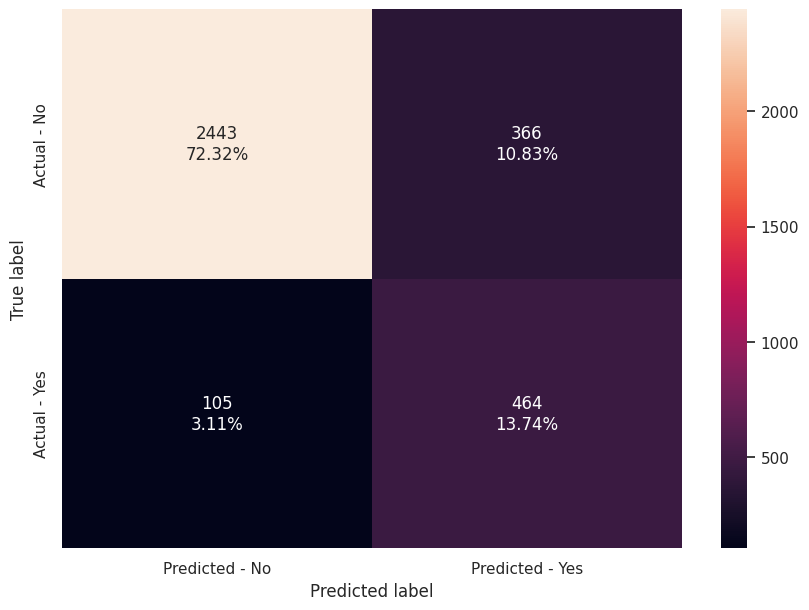

In [211]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

### Observations :

- The model is not overfit on training data

- The test data is 0.8155.

- The model allows the slip through of 105 churners incorrectly predicted as 'not going to churn'.

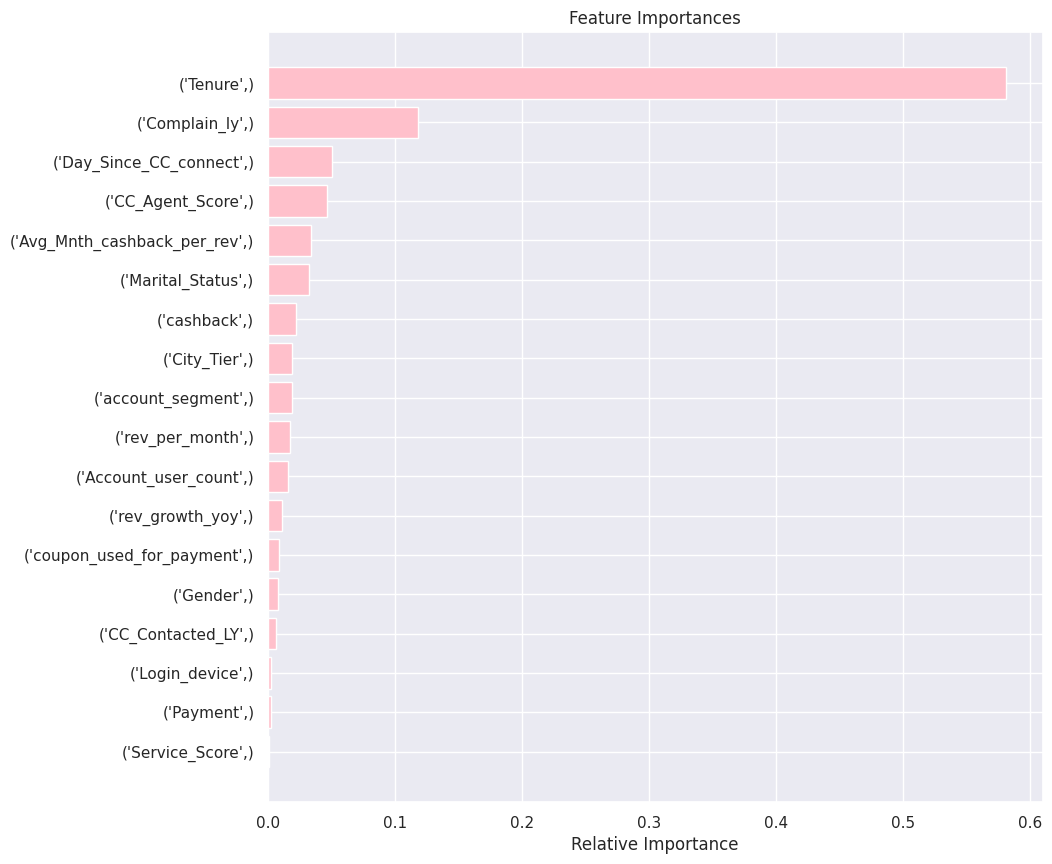

In [212]:
# Plot feature importances
importances_3 = gbc_tuned.feature_importances_
indices = np.argsort(importances_3)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_3[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations:

The four most important features for the tuned Gradient Boosting model using base data are:

- Tenure
- Complain_ly
- Day_Since_CC_connect
- CC_Agent_Score

In [213]:
#### Clear Backend
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Logistic Regression

In [214]:
# Logistic Regression model
# Using class_weight = 'balanced' to mitigate for imbalanced data
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
lg = LogisticRegression(solver="liblinear", class_weight = 'balanced', random_state = SEED)
model = lg.fit(X_train, y_train)


### Check model performance on the training set with default threshold

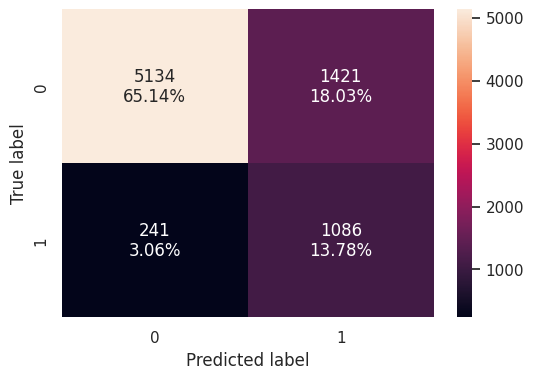

In [215]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [216]:
# Performance with training data and default threshold
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0   0.78914  0.818387   0.433187  0.56651

### Observations

- Model is not overfitting with default threshold and training recall is 0.8184

### Optimize Logistic Regression threshold via ROC-AUC and Precision-Recall Curve

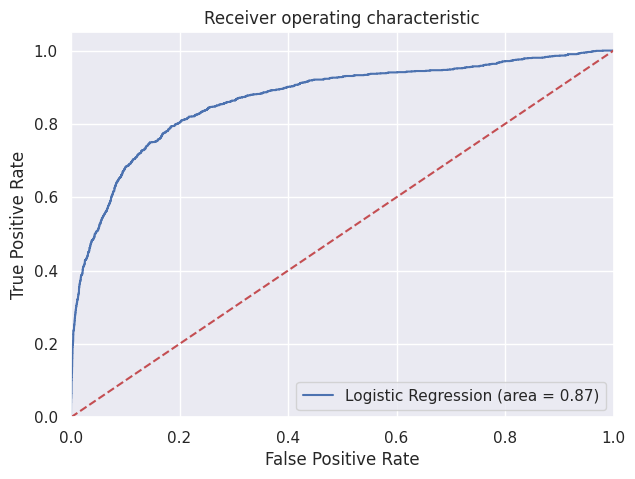

In [217]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model Performance Improvement - Investigating optimizing the model threshold using AUC-ROC Curve.

In [218]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.538864144582803


### Checking model performance on the training set

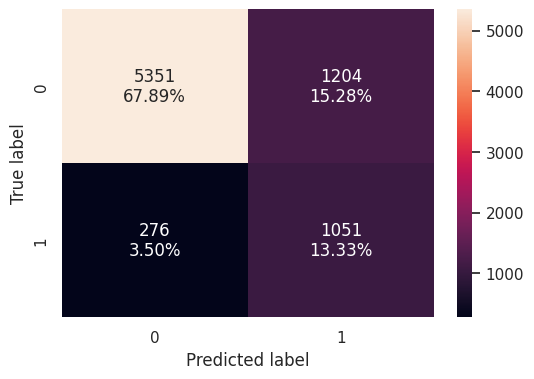

In [219]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [220]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0   0.81223  0.792012   0.466075  0.586823

### Observations

- Model is not overfitting with optimal ROC-AUC threshold of 0.5389 and training recall is 0.7920

### Investigate Precision-Recall curve for improved threshold

In [221]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

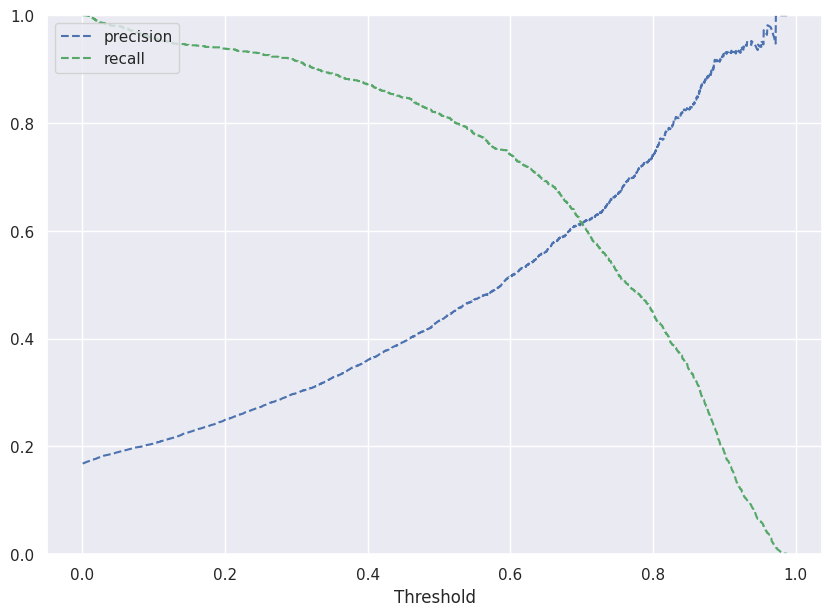

In [222]:
# Plot recall precision curve
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [223]:
# Set the threshold slightly to left of intersection to increase recall
optimal_threshold_curve = 0.6000

### Checking model performance on training set with precision recall optimal threshold

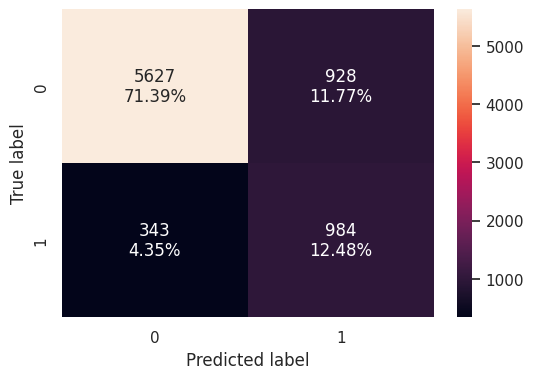

In [224]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [225]:
# Training Performance With Precision Recall Optimal Threshold
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.838747  0.741522   0.514644  0.607595

### Observations

- Model with optimal Precision-Recall threshold of 0.6000 is not overfitting training data and training recall is 0.7415.

### Check model performance on test data with default threshold

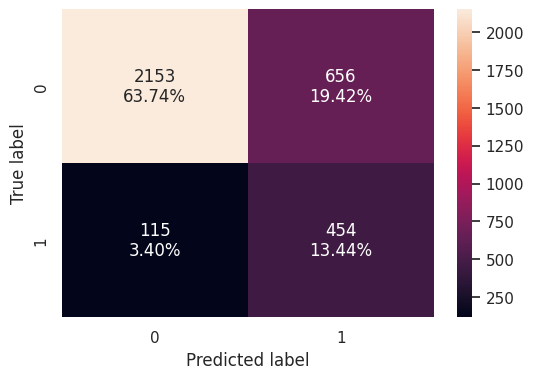

In [226]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [227]:
# Model testing performance with default threshold
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.771758  0.797891   0.409009  0.540798

### Observations

- Model does not overfit testing data using default threshold and recall is 0.7979

### Check model performance on test data with optimum threshold for ROC-AUC

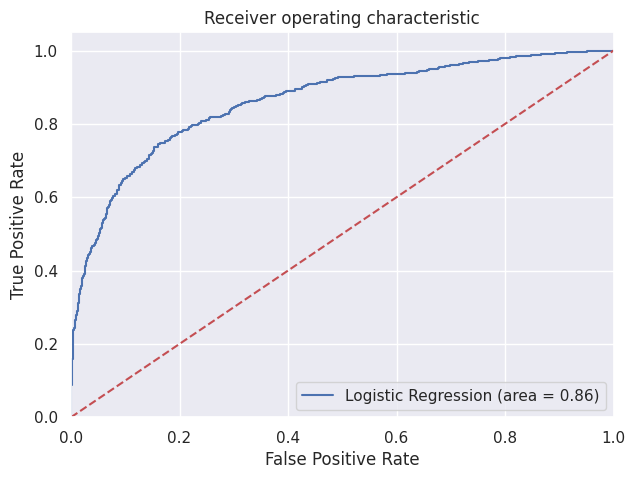

In [228]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

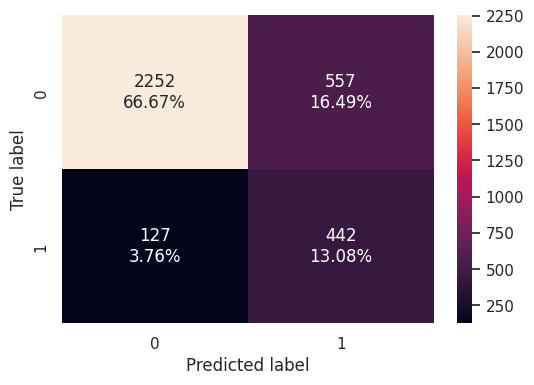

In [229]:
# creating confusion matrix for tesing data with optimal ROC AUC threshold
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [230]:
# checking model performance for test data and ROC AUC optimal threshold
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.797513  0.776801   0.442442  0.563776

### Observations

- Model is not overfitting test data and recall is 0.7768

### Evaluate model with test data and optimal Precision Recall threshold

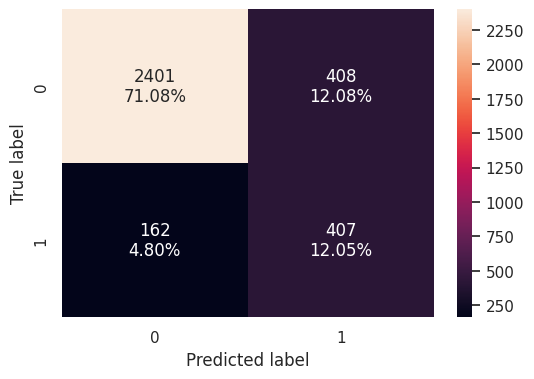

In [231]:
# creating confusion matrix for test data with Precision Recall optimal threshold
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [232]:
# Print model performance for testing data with Precision Recall optimal threshold
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy   Recall  Precision       F1
0  0.831261  0.71529   0.499387  0.58815

### Observations

- Model is not overfitting test data and recall is 0.7153

### Logistic Regression Feature Coefficients  

In [233]:
#Predict on test
y_predict = model.predict(X_test)

In [234]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.143449  0.348564  0.021133  0.026841  0.261408 -0.023294  0.358956   

          7         8         9       10        11        12        13  \
0 -0.881998  0.284191 -0.500352  0.11489  1.493492 -0.037359  0.189962   

         14        15        16        17  intercept  
0 -0.090209 -0.010951 -0.267552 -0.000366   1.952283  


In [235]:
# Calculate log odds
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

Tenure City_Tier CC_Contacted_LY   Payment    Gender Service_Score  \
coef -0.143449  0.348564        0.021133  0.026841  0.261408     -0.023294   

     Account_user_count account_segment CC_Agent_Score Marital_Status  \
coef           0.358956       -0.881998       0.284191      -0.500352   

     rev_per_month Complain_ly rev_growth_yoy coupon_used_for_payment  \
coef       0.11489    1.493492      -0.037359                0.189962   

     Day_Since_CC_connect  cashback Login_device Avg_Mnth_cashback_per_rev  
coef            -0.090209 -0.010951    -0.267552                 -0.000366

In [236]:
# Converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Tenure  City_Tier CC_Contacted_LY   Payment     Gender  \
Odds          0.866365   1.417031        1.021357  1.027204   1.298758   
Change_odd% -13.363503  41.703057        2.135744  2.720443  29.875752   

            Service_Score Account_user_count account_segment CC_Agent_Score  \
Odds             0.976975           1.431833        0.413955       1.328687   
Change_odd%     -2.302457          43.183340      -58.604507      32.868663   

            Marital_Status rev_per_month Complain_ly rev_growth_yoy  \
Odds              0.606317      1.121750    4.452615       0.963330   
Change_odd%     -39.368305     12.175037  345.261538      -3.667009   

            coupon_used_for_payment Day_Since_CC_connect  cashback  \
Odds                       1.209204             0.913740  0.989109   
Change_odd%               20.920365            -8.625974 -1.089130   

            Login_device Avg_Mnth_cashback_per_rev  
Odds            0.765251                  0.999634  
Change_odd%   -23.474943                 -0.036641

### Observations:

- An increase in positive coefficients leads to an increase in probablity of churning.
- More negative coefficient decreases chance.
- Coefficients of logistic regression in terms of log(odds) to finds odds exponentiate the coefficients odds = exp(b) % change
  in odds given as odds = (exp(b) -1) * 100

In [237]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Default",
    "Logistic Regression-0.5389 Threshold",
    "Logistic Regression-0.6000 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression Default  Logistic Regression-0.5389 Threshold  \
Accuracy                      0.789140                              0.812230   
Recall                        0.818387                              0.792012   
Precision                     0.433187                              0.466075   
F1                            0.566510                              0.586823   

           Logistic Regression-0.6000 Threshold  
Accuracy                               0.838747  
Recall                                 0.741522  
Precision                              0.514644  
F1                                     0.607595

In [238]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.5389 Threshold",
    "Logistic Regression-0.6000 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.5389 Threshold  \
Accuracy                      0.771758                              0.797513   
Recall                        0.797891                              0.776801   
Precision                     0.409009                              0.442442   
F1                            0.540798                              0.563776   

           Logistic Regression-0.6000 Threshold  
Accuracy                               0.831261  
Recall                                 0.715290  
Precision                              0.499387  
F1                                     0.588150

### Final Observations On Logistic Regression With Base Dataset

- The default threshold of 0.5000 resulted in a 0.7979 recall for the test data and a 0.8184 recall for the training data.
- Using the default threshold results in 115 false negatives.
- This is the threshold which should be used for the Logistic Regression model with the base data set.

In [239]:
#### Clear Backend
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

### XGBoost with Hyper-parameter tuning

In [240]:
%%time

# Calculate the scale_pos_weight for balanced class weights
positive_class_count = sum(y_train)  # Assuming y_train is your binary target variable
negative_class_count = len(y_train) - positive_class_count
scale_pos_weight = negative_class_count / positive_class_count


# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state =  SEED, eval_metric='logloss', scale_pos_weight = scale_pos_weight)

# Grid of parameters to choose from
parameters = {
    'n_estimators': np.arange(20,70,10),
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,1],
    "learning_rate":[0.1,0.2],
    "colsample_bytree":[0.7,1],
    "colsample_bylevel":[0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

CPU times: user 15min, sys: 1.54 s, total: 15min 2s
Wall time: 1min 18s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=12345, ...)

Accuracy on training set :  0.968535904592743
Accuracy on test set :  0.9404973357015985
Recall on training set :  0.9894498869630746
Recall on test set :  0.9050966608084359
Precision on training set :  0.8487394957983193
Precision on test set :  0.7779456193353474
F1-Score on training set :  0.9137091162143354
F1-Score on test set :  0.8367181153533713


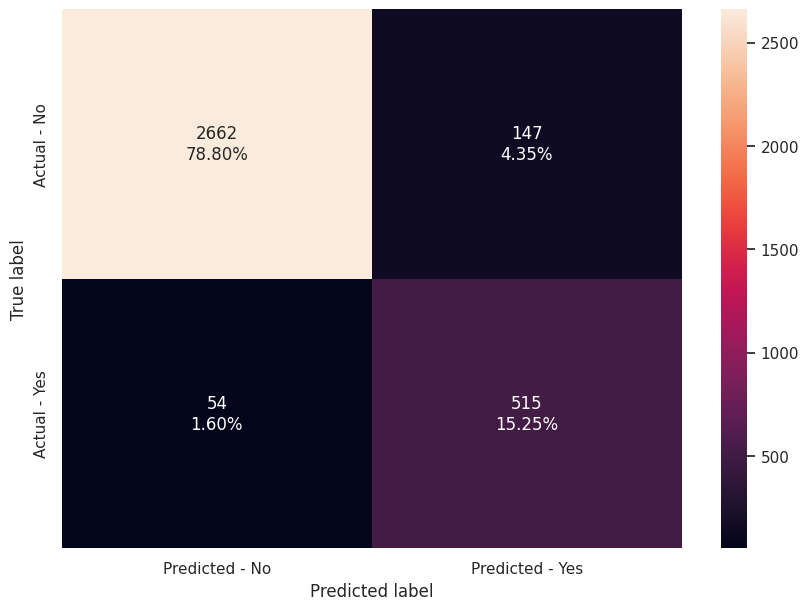

In [241]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

Observations:

- The model is not overfit on the training set.

- The test set recall is 0.9051

- This model is effective at predicting false negatives, allowing a slip through of only 54 churners incorrectly predicted as
  'not going to churn'.
  
- The test recall is the best compared to all the other earlier tested models.

In [242]:
# lets view the set of possible available parameters for tuning in XGBoost algorithm.
xgb_tuned.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

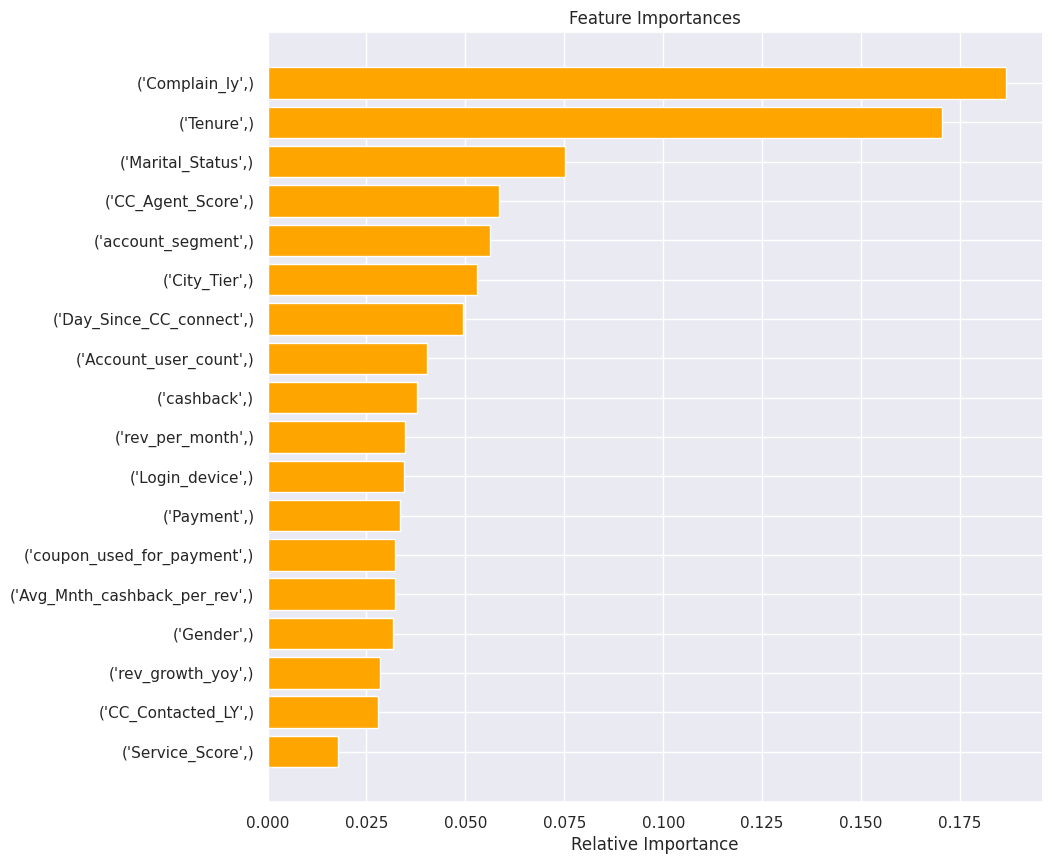

In [243]:
importances_4 = xgb_tuned.feature_importances_
indices = np.argsort(importances_4)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_4[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations

- The four most important features are:

- Complain_ly
- Tenure
- Marital_Status
- CC_Agent_Score

### Comparison of Model performance (Table and Confusion Matrix analysis)

In [244]:
# defining list of models
models = [dtree_estimator,rf_tuned, gbc_tuned, model,xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for algorithm in models:

    j = get_metrics_score(algorithm,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

#### Compare Models Developed Using Base Dataset and Hyperparameter Tuning (Models Sorted In Descending Test Recall Order)

In [245]:
comparison_frame = pd.DataFrame({'Model_Algorithm':['Tuned Decision Tree','Tuned Random Forest','Tuned Gradient Boosting Classifier',
                                                     'Logistic Regression','Tuned XGBoost'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test,
                                         'False_Negatives_FN':[137,85,105,115,54]})

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model_Algorithm  Train_Accuracy  Test_Accuracy  \
4                       Tuned XGBoost        0.968536       0.940497   
1                 Tuned Random Forest        0.958006       0.930136   
2  Tuned Gradient Boosting Classifier        0.868181       0.860568   
3                 Logistic Regression        0.789140       0.771758   
0                 Tuned Decision Tree        0.829866       0.828597   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  \
4      0.989450     0.905097         0.848739        0.777946        0.913709   
1      0.956292     0.850615         0.822957        0.762205        0.884629   
2      0.850038     0.815466         0.573171        0.559036        0.684674   
3      0.818387     0.797891         0.433187        0.409009        0.566510   
0      0.778448     0.759227         0.496635        0.494279        0.606399   

   Test_F1-Score  False_Negatives_FN  
4       0.836718                  54  
1       0.803987                  85  
2       0.663331                 105  
3       0.540798                 115  
0       0.598753                 137

### Observations

- The Tuned XGBoost model provides the greatest testing recall (0.9051).

- The Tuned XGBoost model does not overfit the training data.

### Apply SMOTE And Execute Models With Oversampled Data

Oversampling is applied as the churn positive class is only 16.84% of the target variable.

In [246]:
#### Clear Backend
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [247]:
sm  = SMOTE(random_state = SEED)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of X_train: {}'.format(X_train.shape))
print('After UpSampling, the shape of y_train: {} \n'.format(y_train.shape))

After UpSampling, the shape of X_train: (13110, 18)
After UpSampling, the shape of y_train: (13110,) 



In [248]:
#Verify training data is balanced after applying SMOTE
print(y_train.value_counts())

0    6555
1    6555
Name: Churn, dtype: int64


#### Decision Tree Classifier with SMOTE and Hyper-Parameter tuning

Accuracy on training set :  0.8576659038901602
Accuracy on test set :  0.8265245707519242
Recall on training set :  0.8683447749809305
Recall on test set :  0.7451669595782073
Precision on training set :  0.8501867064973861
Precision on test set :  0.49017341040462425
F1-Score on training set :  0.8591698113207547
F1-Score on test set :  0.5913528591352859
CPU times: user 21.1 s, sys: 2.29 s, total: 23.4 s
Wall time: 1min 6s


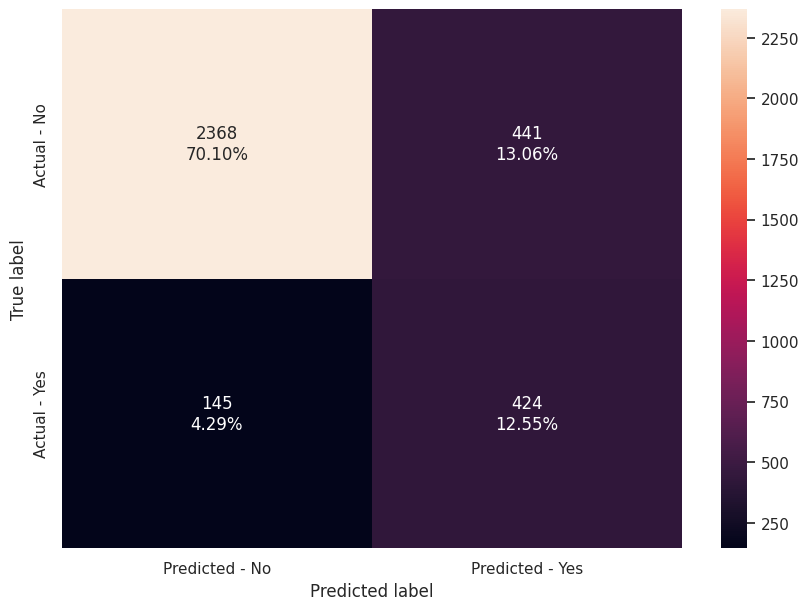

In [249]:
%%time
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(criterion = 'gini',class_weight = 'balanced', random_state = SEED)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. (Actual modeling)
dtree_estimator.fit(X_train, y_train)

# Comparing with test data (the Validation)
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

Observations:

- The model is not overfit on the training data.

- From the validation against the test data using the get_metrics_score() function earlier defined, we can see that the recall
  on the test data is 0.7452.

- This model allows slip through of 145 churners incorrectly predicted as 'not going to churn.

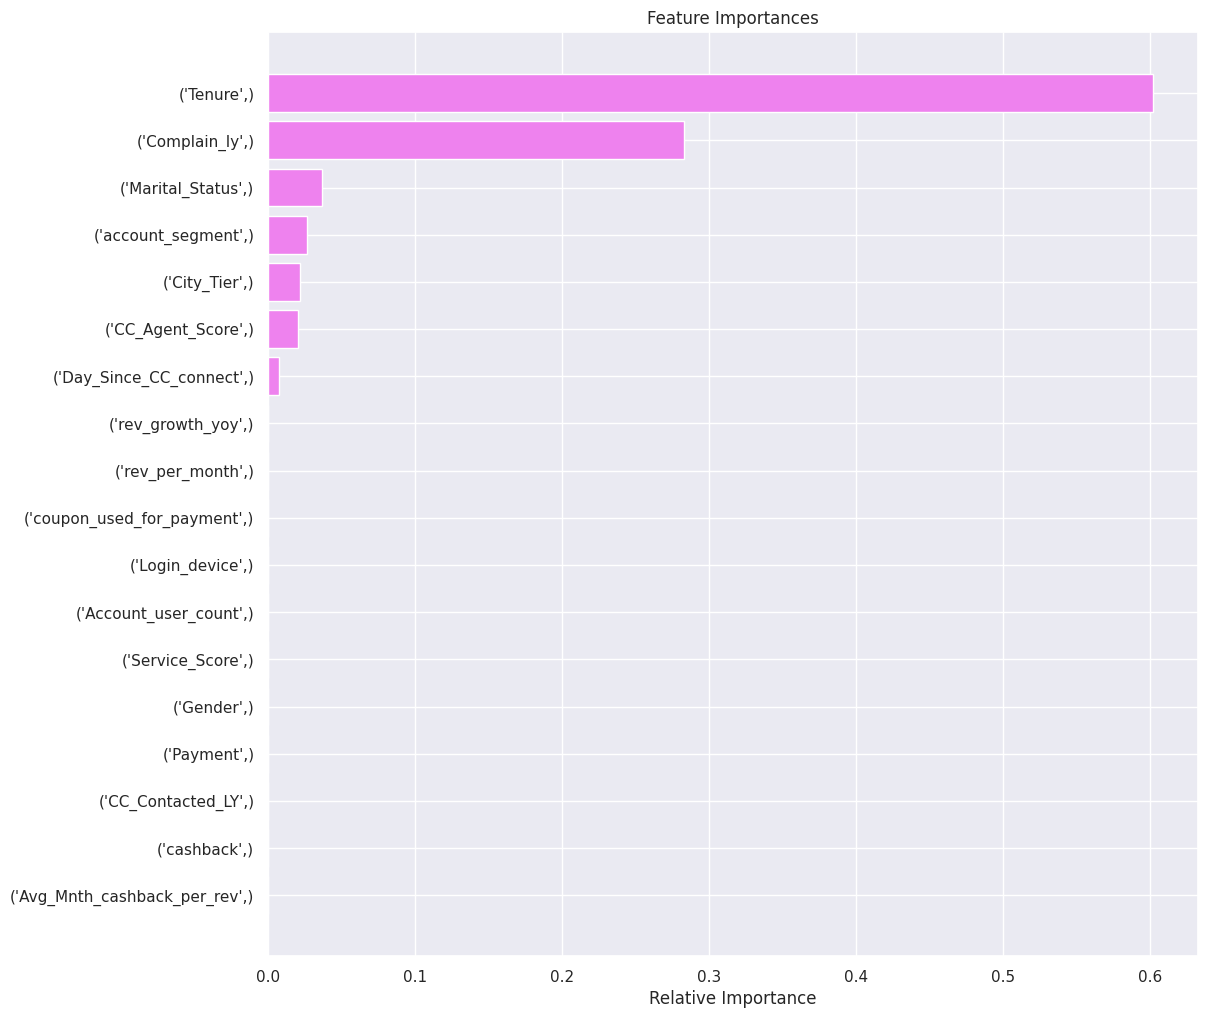

In [250]:
# Display feature importances for decision tree
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations

- The four most important features are:

- Tenure
- Complain_ly
- Marital_Status
- account_segment

In [251]:
## Important Variables

print (pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Tenure                     0.602137
Complain_ly                0.282929
Marital_Status             0.037095
account_segment            0.026844
City_Tier                  0.022087
CC_Agent_Score             0.020829
Day_Since_CC_connect       0.008079
Payment                    0.000000
Gender                     0.000000
Service_Score              0.000000
Account_user_count         0.000000
rev_per_month              0.000000
CC_Contacted_LY            0.000000
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
cashback                   0.000000
Login_device               0.000000
Avg_Mnth_cashback_per_rev  0.000000


In [252]:
#### Clear Backend
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Random Forest with SMOTE and Hyper-parameter tuning

In [253]:
%%time
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight= 'balanced', random_state = SEED, oob_score=True, bootstrap=True)

parameters = {
                'max_depth': list(np.arange(5,25,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,10,5),
                'min_samples_split': np.arange(2, 15, 5),
                'n_estimators': np.arange(20,70,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

CPU times: user 11.3 s, sys: 650 ms, total: 11.9 s
Wall time: 4min 37s


RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=60,
                       oob_score=True, random_state=12345)

Accuracy on training set :  0.9995423340961098
Accuracy on test set :  0.9591474245115453
Recall on training set :  0.9990846681922196
Recall on test set :  0.8312829525483304
Precision on training set :  1.0
Precision on test set :  0.9184466019417475
F1-Score on training set :  0.9995421245421245
F1-Score on test set :  0.8726937269372693


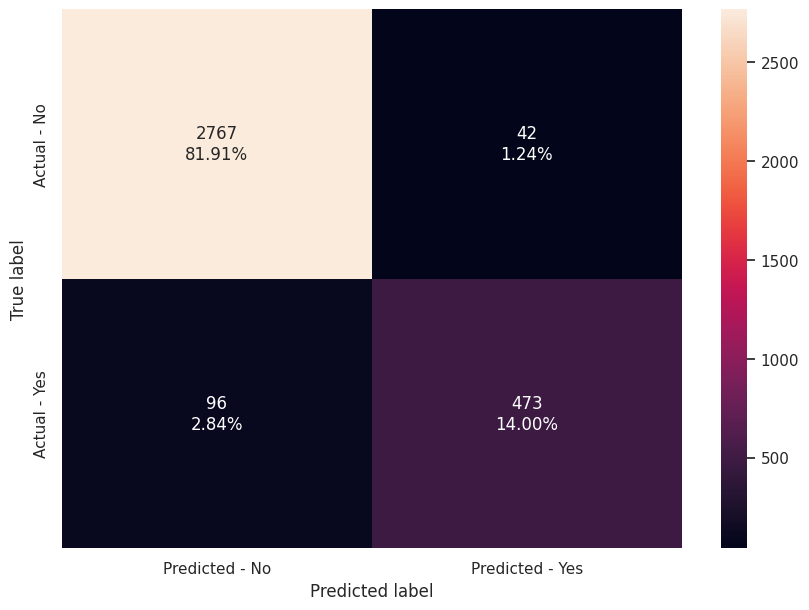

In [254]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

Observations:

- The training data has some degree of overfitting

- From the validation against the test data using the get_metrics_score() function defined earlier, we can see that the test
  data recall is 0.8313.

- The model allows slip through of 96 churners incorrectly predicted as 'not going to churn'.

In [255]:
feature_names = list(X_train.columns)
print(feature_names)

[('Tenure',), ('City_Tier',), ('CC_Contacted_LY',), ('Payment',), ('Gender',), ('Service_Score',), ('Account_user_count',), ('account_segment',), ('CC_Agent_Score',), ('Marital_Status',), ('rev_per_month',), ('Complain_ly',), ('rev_growth_yoy',), ('coupon_used_for_payment',), ('Day_Since_CC_connect',), ('cashback',), ('Login_device',), ('Avg_Mnth_cashback_per_rev',)]


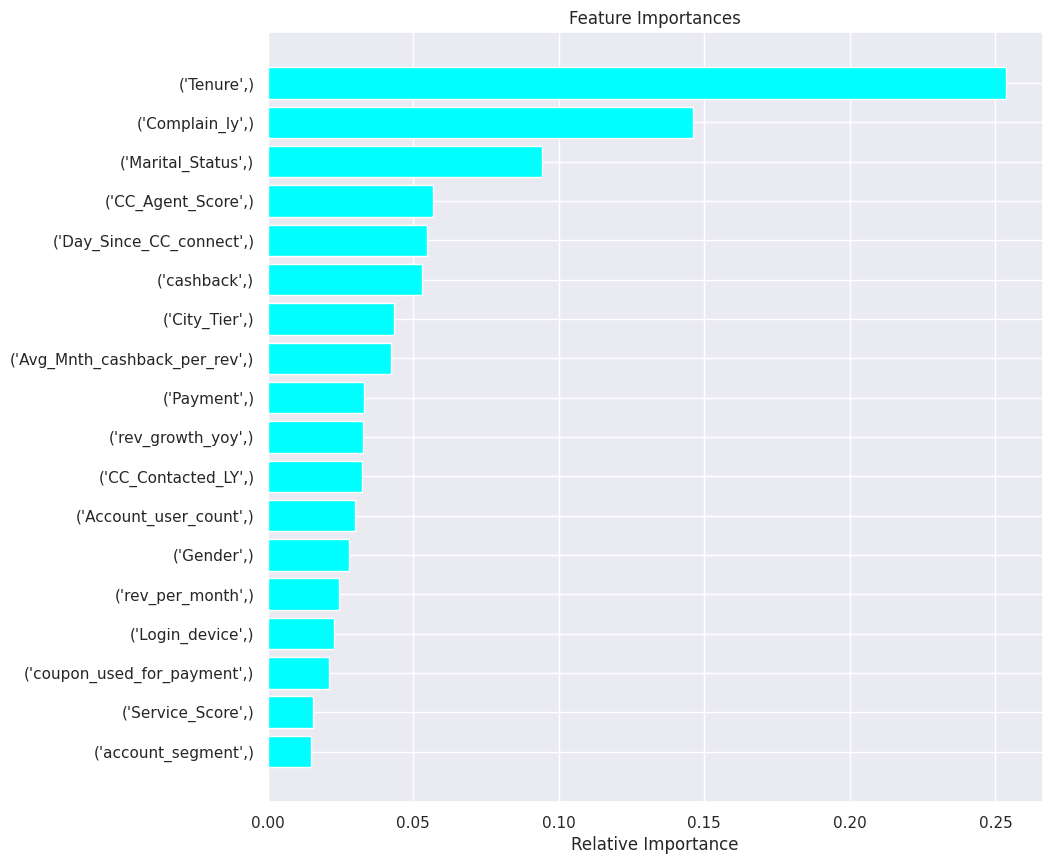

In [256]:
importances_2 = rf_tuned.feature_importances_
indices = np.argsort(importances_2)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_2[indices], color='cyan', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations

- The four most important features are:

- Tenure
- Complain_ly
- Marital_Status
- CC_Agent_Score

In [257]:
#### Clear Backend
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

#### Gradient Boosting with SMOTE and Hyper-parameter tuning

In [258]:
%%time

# Calculate Sample Weights
sample_weights = np.zeros(len(y_train))
sample_weights[y_train == 0] = 0.1684
sample_weights[y_train == 1] = 0.8316


# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state= SEED), random_state= SEED)

# Grid of parameters to choose from
parameters = {
    'n_estimators': np.arange(20,70,10),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train, sample_weight = sample_weights)

CPU times: user 7min 18s, sys: 314 ms, total: 7min 18s
Wall time: 7min 17s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=12345),
                           max_features=0.9, n_estimators=60,
                           random_state=12345, subsample=0.9)

In [259]:
# lets view the set of possible available parameters for tuning in Gradient Boosting algorithm.
gbc_tuned.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init__algorithm', 'init__base_estimator', 'init__estimator', 'init__learning_rate', 'init__n_estimators', 'init__random_state', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

Accuracy on training set :  0.8537757437070939
Accuracy on test set :  0.7421551213735939
Recall on training set :  0.9815408085430969
Recall on test set :  0.9050966608084359
Precision on training set :  0.7817739975698663
Precision on test set :  0.3866366366366366
F1-Score on training set :  0.8703415623943185
F1-Score on test set :  0.5418200946870069


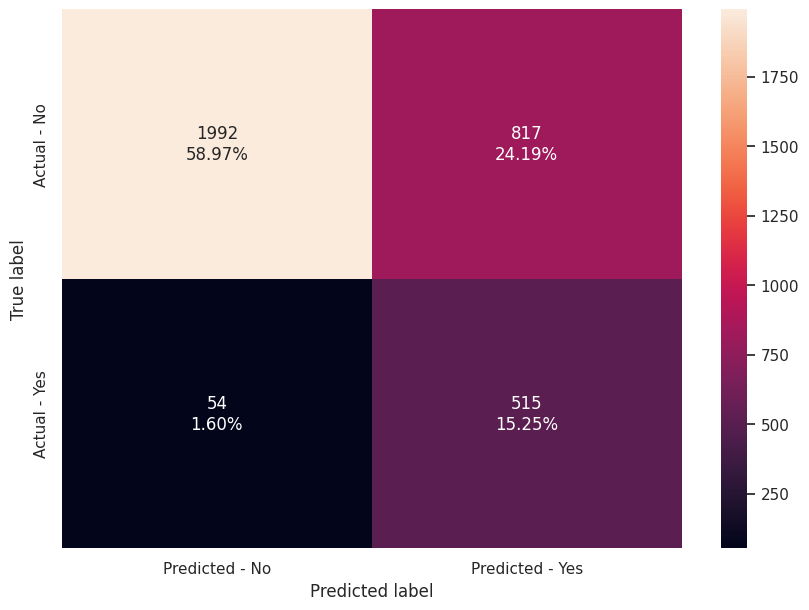

In [260]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

Observations:

- The model is not overfit on the training data.
- The recall on the test data is 0.9051
- There are 54 false negatives

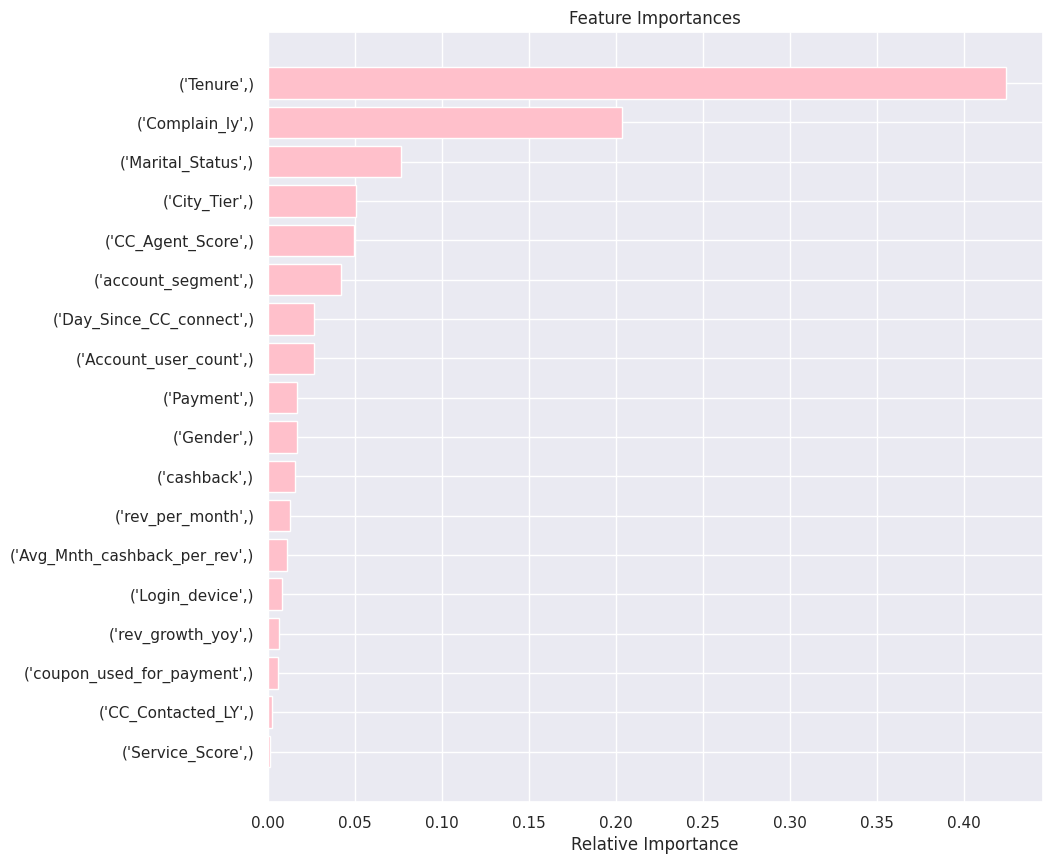

In [261]:
importances_3 = gbc_tuned.feature_importances_
indices = np.argsort(importances_3)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_3[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations

- The four most important features are:

- Tenure
- Complain_ly
- Marital_Status
- City_Tier

#### Observations





In [262]:
#### Clear Backend
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Logistic Regression with SMOTE

In [263]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
lg = LogisticRegression(solver="liblinear", class_weight = 'balanced', random_state = SEED)
model = lg.fit(X_train, y_train)


### Checking model performance on the SMOTE training set with default threshold

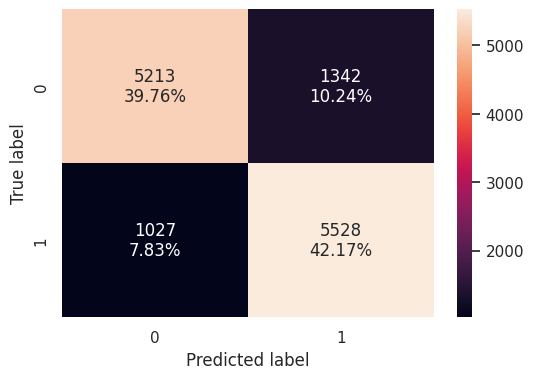

In [264]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [265]:
# Performance with SMOTE training data and default threshold
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.819298  0.843326   0.804658  0.823538

### Observations

- The model is not overfitting training data and the training recall is 0.8433

### Evaluate for optimal threshold using ROC-AUC

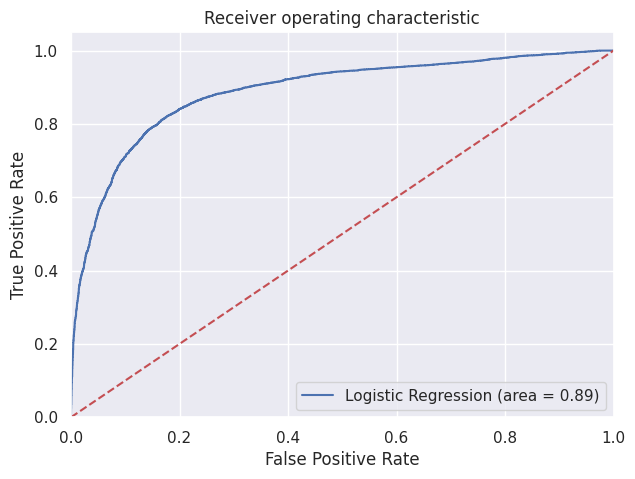

In [266]:
# Find the roc auc score for SMOTE training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Determine optimal threshold using AUC-ROC curve¶

In [267]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.552099827192511


### Checking model performance on the SMOTE training set with optimal AUC ROC threshold

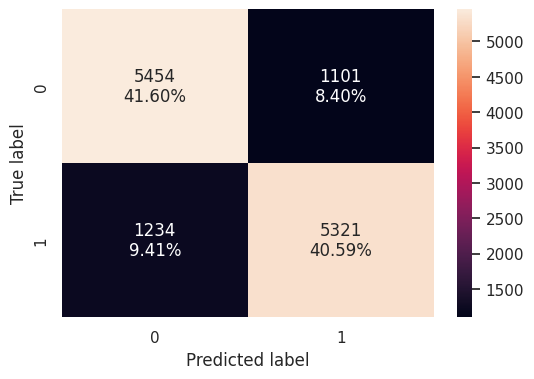

In [268]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [269]:
# Checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.821892  0.811747   0.828558  0.820066

### Observations

- The model is not overfitting training data and the training recall is 0.8117

### Use Precision-Recall curve and see if we can find a better threshold

- The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds.
  It can be used to select optimal threshold as required to improve the model improvement.

- Precision_Recall_curve() Returns the fpr, tpr and threshold values

In [270]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

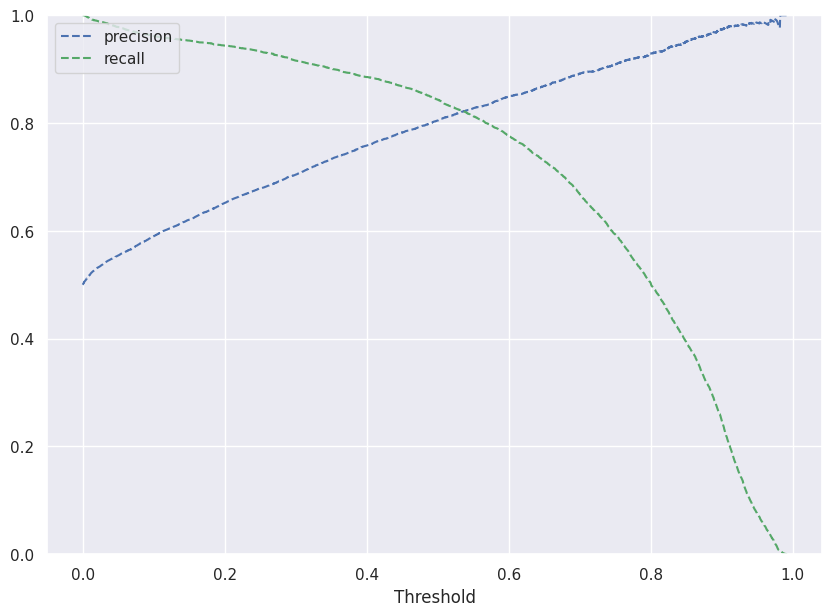

In [271]:
# Plot recall precision curve
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [272]:
# Set the threshold at the Precision Recall curve intersection.
optimal_threshold_curve = 0.5400

### Checking model performance on training set with precision recall optimal threshold

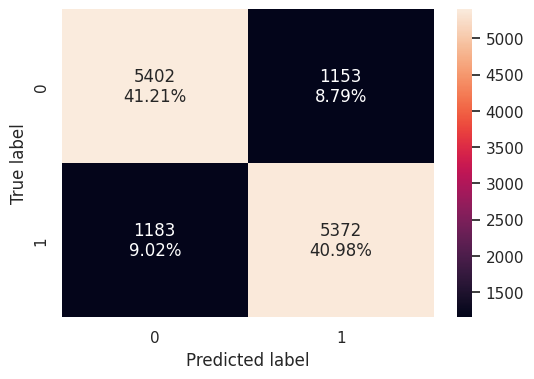

In [273]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [274]:
# Performance 0f model for SMOTE training data Precision Recall optimal threshold
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.821815  0.819527   0.823295  0.821407

### Observations

- The model is not overfitting on the training data and recall is 0.8195

### Evaluate model performance on SMOTE test data with default threshold

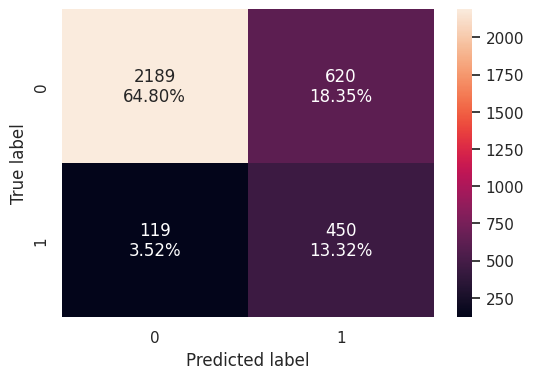

In [275]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [276]:
# Model testing performance with default threshold
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.781231  0.790861   0.420561  0.549115

### Observations

- Model with default threshold of 0.5000 is not overfitting SMOTE test data and recall is 0.7909
- There are 119 false negatives

### Evaluate SMOTE test data with optimal threshold from ROC-AUC curve

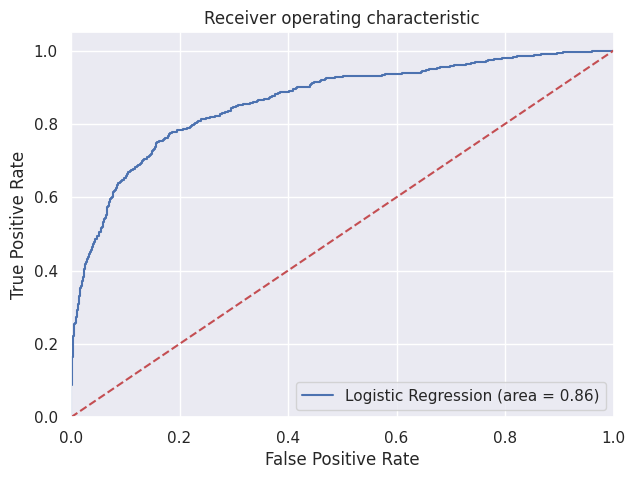

In [277]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

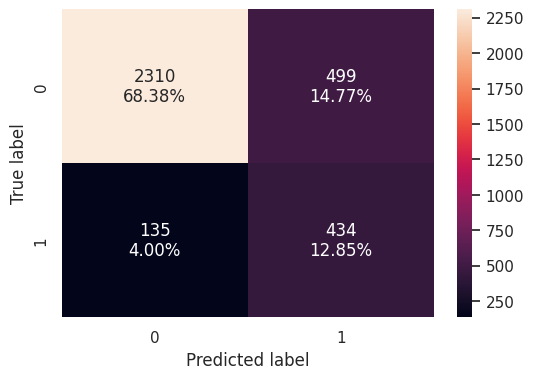

In [278]:
# Create confusion matrix for SMOTE testing data with optimal ROC AUC threshold
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [279]:
# Check model performance for SMOTE test data and ROC AUC optimal threshold
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.812315  0.762742   0.465166  0.577896

### Observations

- Model with optimal ROC-AUC threshold of 0.5521 is not overfitting SMOTE test data and recall is 0.7627.

- There are 135 false negatives

### Evaluate model with SMOTE test data and optimal Precision Recall threshold of 0.5400

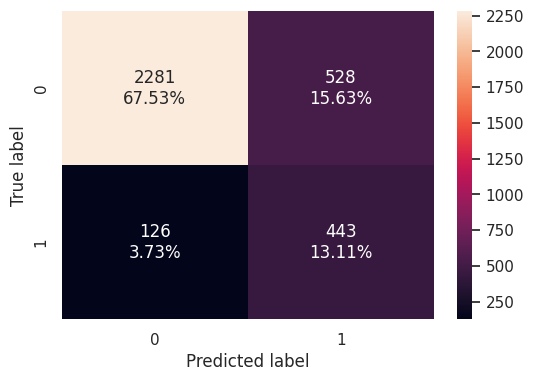

In [280]:
# creating confusion matrix for test data with Precision Recall optimal threshold
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [281]:
# Print model performance for SMOTE test data with Precision Recall optimal threshold
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.806394  0.778559   0.456231  0.575325

### Observations

- Model with optimal Precision-Recall threshold of 0.5400 is not overfitting SMOTE test data and recall is 0.7786

- There are 126 false negatives.

### Logistic Regression Feature Coefficients  With SMOTE

In [282]:
#Predict on test
y_predict = model.predict(X_test)

In [283]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.174638  0.384092  0.020517  0.040455  0.320063 -0.001917  0.404605   

          7         8         9        10        11        12        13  \
0 -1.024258  0.312656 -0.555009  0.111674  1.736285 -0.046035  0.199162   

         14        15        16        17  intercept  
0 -0.104606 -0.010481 -0.302601 -0.002223   2.194731  


In [284]:
# Calculate log odds
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

Tenure City_Tier CC_Contacted_LY   Payment    Gender Service_Score  \
coef -0.174638  0.384092        0.020517  0.040455  0.320063     -0.001917   

     Account_user_count account_segment CC_Agent_Score Marital_Status  \
coef           0.404605       -1.024258       0.312656      -0.555009   

     rev_per_month Complain_ly rev_growth_yoy coupon_used_for_payment  \
coef      0.111674    1.736285      -0.046035                0.199162   

     Day_Since_CC_connect  cashback Login_device Avg_Mnth_cashback_per_rev  
coef            -0.104606 -0.010481    -0.302601                 -0.002223

In [285]:
# Converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Tenure  City_Tier CC_Contacted_LY   Payment     Gender  \
Odds          0.839761   1.468281        1.020729  1.041284   1.377215   
Change_odd% -16.023908  46.828122        2.072922  4.128393  37.721477   

            Service_Score Account_user_count account_segment CC_Agent_Score  \
Odds             0.998085           1.498710        0.359063       1.367051   
Change_odd%     -0.191517          49.871012      -64.093730      36.705115   

            Marital_Status rev_per_month Complain_ly rev_growth_yoy  \
Odds              0.574067      1.118148    5.676216       0.955009   
Change_odd%     -42.593283     11.814794  467.621560      -4.499112   

            coupon_used_for_payment Day_Since_CC_connect  cashback  \
Odds                       1.220380             0.900679  0.989573   
Change_odd%               22.037967            -9.932098 -1.042652   

            Login_device Avg_Mnth_cashback_per_rev  
Odds            0.738894                  0.997780  
Change_odd%   -26.110603                 -0.222034

### Observations:

- An increase in positive coefficients leads to an increase in probablity of churning.
- More negative coefficient decreases chance.
- Coefficients of logistic regression in terms of log(odds) to finds odds exponentiate the coefficients odds = exp(b) % change
  in odds given as odds = (exp(b) -1) * 100

### Logistic Regression model using SMOTE training data performance summary:

In [286]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression - Default Threshold",
    "Logistic Regression - ROC-AUC Threshold",
    "Logistic Regression - Prec-Recall Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression - Default Threshold  \
Accuracy                                  0.819298   
Recall                                    0.843326   
Precision                                 0.804658   
F1                                        0.823538   

           Logistic Regression - ROC-AUC Threshold  \
Accuracy                                  0.821892   
Recall                                    0.811747   
Precision                                 0.828558   
F1                                        0.820066   

           Logistic Regression - Prec-Recall Threshold  
Accuracy                                      0.821815  
Recall                                        0.819527  
Precision                                     0.823295  
F1                                            0.821407

In [287]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression - Default Threshold",
    "Logistic Regression - ROC-AUC Threshold",
    "Logistic Regression - Prec-Recall Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression - Default Threshold  \
Accuracy                                  0.781231   
Recall                                    0.790861   
Precision                                 0.420561   
F1                                        0.549115   

           Logistic Regression - ROC-AUC Threshold  \
Accuracy                                  0.812315   
Recall                                    0.762742   
Precision                                 0.465166   
F1                                        0.577896   

           Logistic Regression - Prec-Recall Threshold  
Accuracy                                      0.806394  
Recall                                        0.778559  
Precision                                     0.456231  
F1                                            0.575325

### Observations

- The default 0.5000 threshold provided the greatest testing recall value (0.7909)
- This is the Logistic Regression model result which will be used for comparison with other methods

In [288]:
#### Clear Backend
tf.keras.backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(SEED)
tf.random.set_seed(SEED)

### XGBoost with SMOTE and Hyper-parameter tuning

In [289]:
%%time

# Calculate the scale_pos_weight for balanced class weights
positive_class_count = sum(y_train)  # Assuming y_train is your binary target variable
negative_class_count = len(y_train) - positive_class_count
scale_pos_weight = negative_class_count / positive_class_count

# Choose the type of classifier
xgb_tuned = XGBClassifier(random_state = SEED, eval_metric='logloss', scale_pos_weight = scale_pos_weight)

# Grid of parameters to choose from
parameters = {
    'n_estimators': np.arange(20,70,10),
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,1],
    "learning_rate":[0.1,0.2],
    "colsample_bytree":[0.7,1],
    "colsample_bylevel":[0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

CPU times: user 20min 58s, sys: 2.3 s, total: 21min
Wall time: 1min 50s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, random_state=12345, ...)

Accuracy on training set :  0.8750572082379863
Accuracy on test set :  0.7664298401420959
Recall on training set :  0.994508009153318
Recall on test set :  0.9420035149384886
Precision on training set :  0.8027336534909494
Precision on test set :  0.4148606811145511
F1-Score on training set :  0.8883892068683564
F1-Score on test set :  0.5760343901128425


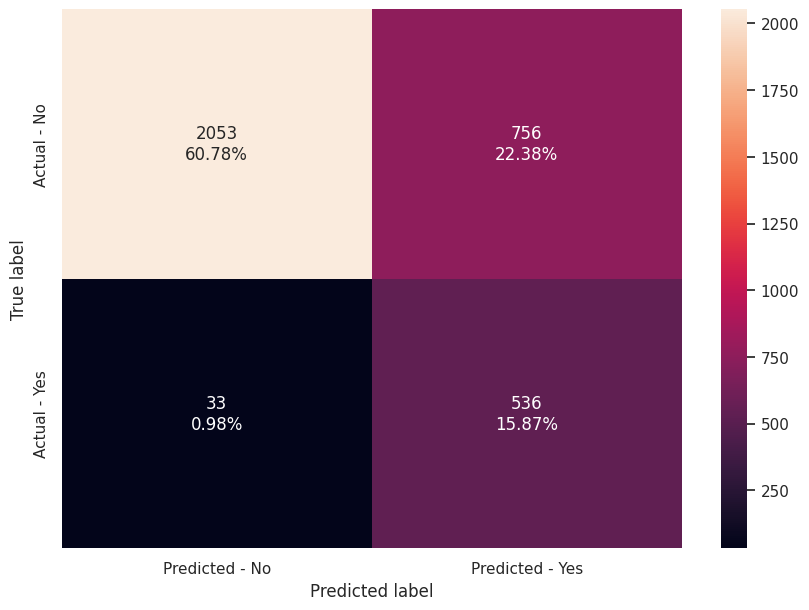

In [290]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

### Observations :

- The model is not overfitting the training data

- The recall for test data is 0.9420

- This model is effective at predicting false negatives, allowing slip through only 33 potential churners incorrectly predicted
  as 'not going to churn'.
- This performance is the best of all the models evaluated using oversampled data. The testing precision (0.4149) and F1-score
  (0.5760) are quite low, however, these parameters are of secondary importance.

In [291]:
# lets view the set of possible available parameters for tuning in XGBoost algorithm.
xgb_tuned.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

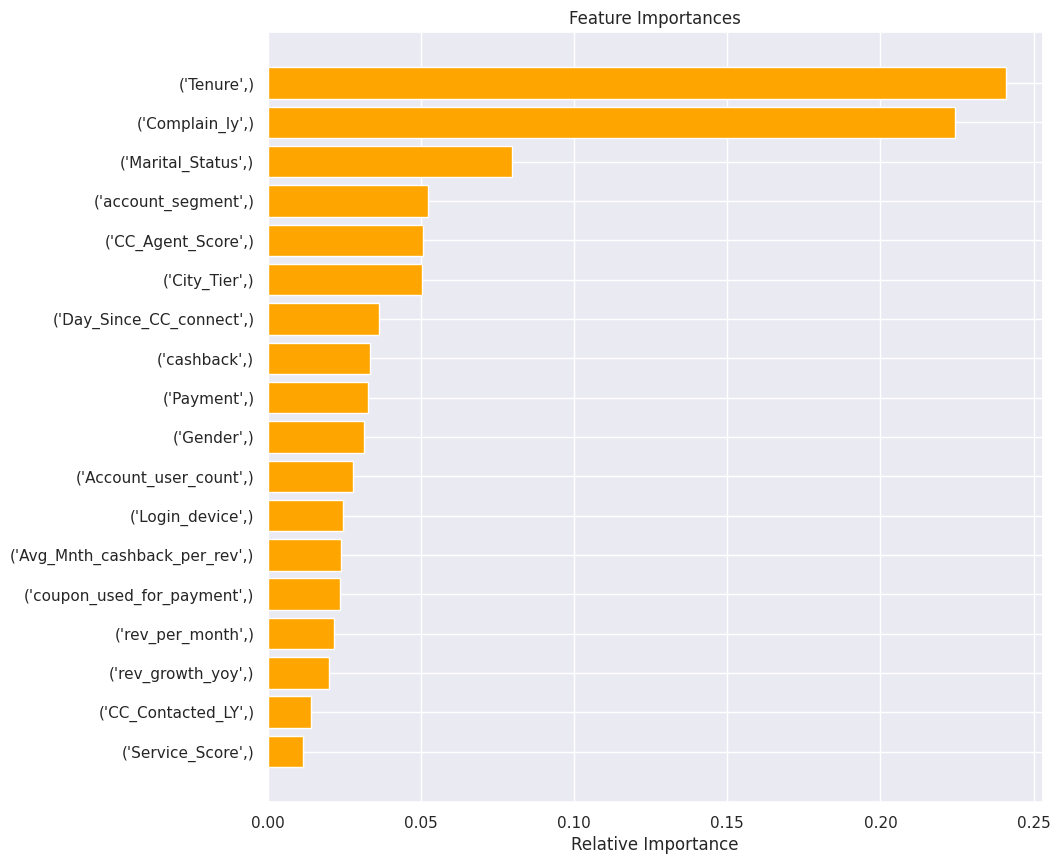

In [292]:
importances_4 = xgb_tuned.feature_importances_
indices = np.argsort(importances_4)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_4[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations

- The four most important features are:

- Tenure
- Complain_ly
- Marital_Status
- account_segment

### Comparison of Model performance (Table and Confusion Matrix analysis)

In [293]:
# defining list of models
models = [dtree_estimator,rf_tuned, gbc_tuned, model,xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for algorithm in models:

    j = get_metrics_score(algorithm,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

### Comparison Of Performance For All Models With Oversampling and Hyperparameter Tuning

In [295]:
comparison_frame = pd.DataFrame({'Model_Algorithm':['Tuned Decision Tree','Tuned Random Forest','Tuned Gradient Boosting Classifier',
                                                     'Logistic Regression','Tuned XGBoost'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test,
                                         'False_Negatives_FN':[145,96,54,119,33]})

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

Model_Algorithm  Train_Accuracy  Test_Accuracy  \
4                       Tuned XGBoost        0.875057       0.766430   
2  Tuned Gradient Boosting Classifier        0.853776       0.742155   
1                 Tuned Random Forest        0.999542       0.959147   
3                 Logistic Regression        0.819298       0.781231   
0                 Tuned Decision Tree        0.857666       0.826525   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  \
4      0.994508     0.942004         0.802734        0.414861        0.888389   
2      0.981541     0.905097         0.781774        0.386637        0.870342   
1      0.999085     0.831283         1.000000        0.918447        0.999542   
3      0.843326     0.790861         0.804658        0.420561        0.823538   
0      0.868345     0.745167         0.850187        0.490173        0.859170   

   Test_F1-Score  False_Negatives_FN  
4       0.576034                  33  
2       0.541820                  54  
1       0.872694                  96  
3       0.549115                 119  
0       0.591353                 145

###  Performance Comparison For All Models In The Study

### Comparisons

- Complete performance metrics for all models implemented in the study are in two tables shown earlier in the study.  

- The first summary table presents the performance metrics for models implemented on the base data set and there is a second
  table presenting model performance metrics for models implemented on oversampled data.

- Recall is the key perfomance metric and the test recall performance for all models is presented below in order of descending
  recall score:

- Compare Models Using Base Data:

- Model                    Test Recall
- Tuned XGBoost               0.9051
- Tuned Random Forest         0.8506
- Tuned Decision Tree         0.7592
- Tuned Gradiant Boost        0.8155
- Logistic Regression         0.7979


- Compare Models Using Oversampled Data:

- Model                    Test Recall
- Tuned XGBoost               0.9420
- Tuned Gradiant Boost        0.9051
- Tuned Random Forest         0.8313
- Logistic Regression         0.7909
- Tuned Decision Tree         0.7452

- Tuned XG Boost with SMOTE oversampling returned the greatest test recall metric.
  
- Tuned XGBoost with the SMOTE oversampled data was selected as the best model due to the 0.9420 recall and the strong
  incentive to minimize churn prediction false negatives.



### Interpretation From The Best Model And Reasons For Model Selection

- Recall is the key performance metric as it is very important to minimize false negatives. 

- The best model is Tuned XGBoost using the SMOTE oversampled dataset which has a 0.9420 recall and only 33 false negatives.

- The features listed below are in order of decreasing importance for the Tuned XGBoost model fitted using SMOTE
  oversampled data:

- Tenure
- Complain_ly
- Marital_Status
- account_segment
- CC_Agent_Score
- City_Tier
- Day_Since_CC_connect
- cashback
- Payment
- Gender
- Account_user_count
- Login_device
- Avg_Mnth_cashback_per_rev
- coupon_used_for_payment
- rev_per_month
- rev_growth_yoy
- CC_Contacted_LY
- Service_Store


### Business Insights and Recommendations

**Business Insights**

The four most important factors for prediction of account churn were:

- Tenure
- Complain_ly
- Marital_Status
- CC_Agent_score

- Accounts with tenure less than six months are much more likely to churn than accounts with tenure greater than six months.

- Most of the churn (81.28%) occurs for accounts with less than six months tenure. These short tenure accounts are 66.47%         Regular Plus account segment and 79.63% of these accounts pay with a coupon at least once before churning.

- The company appears to be expending significant resources on accounts that are using coupons to pay and are more prone to
  churn. The average customer contacts for accounts which churn in the first six months is 17.

- Accounts with primary account holder single status were more 2.34 times more likely to churn than accounts with primary
  account holder with married status.

- Accounts with a complaint in the last year are 2.91 times more likely to churn than accounts without a complaint.
  
- Accounts using a credit card or debit card automated payment system were less likely to churn than accounts paying with an
  ewallet, cash on delivery, or UPI.
  
- Accounts with account segment Super Plus and Regular were the least likely to churn.

- The median cashback for customers which did not churn was slightly greater than the median cashback for customers who
  churned.


**Business Recommendations**

- Emphasize account segments with lowest churn (Super, Super Plus and Regular) and modify Regular Plus service to reduce churn.

- Perform root cause analyses of account complaints and track complaint resolution performance metrics. Apply learnings to
  improve account satisfaction and customer care account scoring.

- Track metrics for complaint resolution. The metrics should include incidence frequency for complaints, time duration from
  receipt of complaint to completion of the resolution, and customer satisfaction with the steps taken to resolve complaints.

- Determine why accounts where the primary customer is single are much more likely to churn than accounts where the primary
  customers is married and modify services to better retain singles.
  
- Implement a program for outeach to accounts which assign a low CC_Agent_Score and address account holder concerns.

- Offer enhanced cashback for accounts to enroll in a credit card or debit card automated payment system. Accounts using these   modes of payment were less likely to churn than accounts using an ewallet, cash on delivery, or UPI.

- Apply resources to implement a customer loyalty rewards program for accounts with tenure greater than siz months rather than
  issuing coupons for free services to relatively new accounts which are more prone to churn.

- Accounts logging in with computer were slightly more prone to churn than mobile login. Computer user interface issues should
  be addressed.
  
- Increase advertising to females and Tier 2 cities.

- Audit the computer interface for user friendliness.



### Relevance and Implementation of Conclusions and Recommendations

- Improve onboarding process and customer care agent scores for accounts, particularly those with a tenure of less than 6         months. Account complaints are closely linked to churn. Most churn is in the first 6 months. Improving customer care agent     scores will reduce complaints and is relevant and viable.  Future reductions in customer care requirements offsets costs.

- Reaching out to accounts returning a low CC_Agent_Score and implementing findings is a valid measure to reduce churn.

- Mitigate factors causing Regular Plus accounts to churn more frequently. Reducing Regular Plus churn to a level comparable     to the the average of the other account segments will reduce churn. New customers can be steered to the Regular,  Super, or
  Super Plus account segments if necessary and with small cost.

- Modify account terms to achieve better retention of single customers.  Understanding and addressing causes for greater churn   for accounts with single status primary customer is a viable path forward.
  
- Issue loyalty reward coupons for accounts with tenure greater than 6 months instead of payment coupons to new accounts.         Rewarding customer loyalty after six months tenure will reduce churn. This program should cause zero net cost increase.
  
- Adjusting advertising to target females and Tier 2 cities. This is viable and relevant as shifting advertising focus should     have zero net cost increase and is relevant and viable.

- Providing enhanced cashback for enrollment in automated payment is easily achievable and is a viable measure.

- Auditing the computer interface for user friendliness and implementing any findings should be a valid measure and may be a     very low cost way to help remedy the concern with churn.
